In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9399880333021229434
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9027521741
locality {
  bus_id: 1
}
incarnation: 14182303425152587252
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.935007 , acc = 0.36 
Epoch 1 , step 100 , loss= 0.15857933 , acc = 0.94 
Epoch 1 , step 200 , loss= 0.062662125 , acc = 0.98 
Epoch 1 , step 300 , loss= 0.11422035 , acc = 0.96 
Epoch 1 , step 400 , loss= 0.12249201 , acc = 0.99 
Epoch 1 , step 500 , loss= 0.04179812 , acc = 0.99 
Epoch 1 , step 549 , loss= 0.06923531 val_loss= 0.10106407 , acc = 0.97 val acc = 0.9674 
Epoch 1 finished, loss= 0.23423249 val loss= 0.10106407 ,  acc = 0.9487092 val acc = 0.9674
*
Epoch 2 , step 50 , loss= 0.029980866 , acc = 0.99 
Epoch 2 , step 150 , loss= 0.017445626 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.023766924 , acc = 1.0

Epoch 17 , step 400 , loss= 0.0025539228 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0009626012 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.001268993 val_loss= 0.13080348 , acc = 1.0 val acc = 0.9798 
Epoch 17 finished, loss= 0.0018375141 val loss= 0.13080348 ,  acc = 0.999709 val acc = 0.9798

Epoch 18 , step 50 , loss= 0.0015495606 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0012699385 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.009762786 , acc = 0.99 
Epoch 18 , step 350 , loss= 0.00074014236 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.0006215364 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00063096127 val_loss= 0.1188722 , acc = 1.0 val acc = 0.9806 
Epoch 18 finished, loss= 0.0014249093 val loss= 0.1188722 ,  acc = 0.9998 val acc = 0.9806

Epoch 19 , step 0 , loss= 0.0021214026 , acc = 1.0 
Epoch 19 , step 100 , loss= 0.000119089185 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.0002986036 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.00063854526 , acc = 1.0 
Epoch 19 , step 400 , loss= 0.00110

Epoch 34 , step 350 , loss= 1.430511e-08 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00017408055 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0005954162 val_loss= 0.15040833 , acc = 1.0 val acc = 0.9806 
Epoch 34 finished, loss= 0.0013362046 val loss= 0.15040833 ,  acc = 0.9997999 val acc = 0.9806

Epoch 35 , step 0 , loss= 3.7996928e-05 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0004841049 , acc = 1.0 
Epoch 35 , step 200 , loss= 0.00016657467 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.00011503528 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.038233865 , acc = 0.99 
Epoch 35 , step 500 , loss= 1.5938713e-05 , acc = 1.0 
Epoch 35 , step 549 , loss= 1.8248556e-05 val_loss= 0.16304247 , acc = 1.0 val acc = 0.9828 
Epoch 35 finished, loss= 0.0006477852 val loss= 0.16304247 ,  acc = 0.9998 val acc = 0.9828

Epoch 36 , step 50 , loss= 7.869915e-05 , acc = 1.0 
Epoch 36 , step 150 , loss= 1.0148297e-05 , acc = 1.0 
Epoch 36 , step 250 , loss= 0.0009812596 , acc = 1.0 
Epoch 36 , step 350 , loss= 0

Plotting loss...


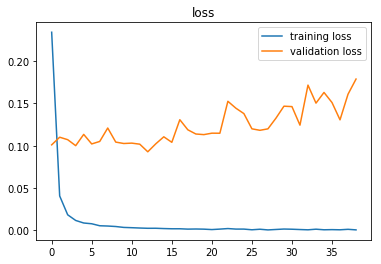

Plotting metrics...


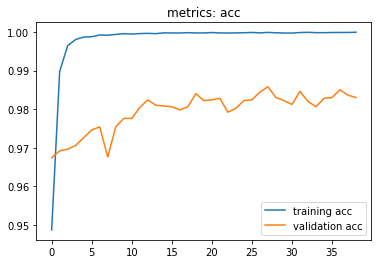

train {'acc': 0.99874544}
test {'acc': 0.981}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

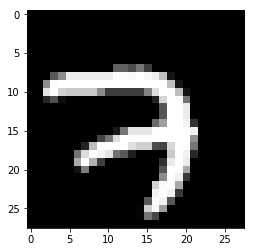

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.5153825e-31 3.0529572e-32 8.5960999e-25 3.1257844e-25 5.6256319e-22
 3.6222535e-33 0.0000000e+00 1.0000000e+00 1.6177579e-37 3.3293348e-18]


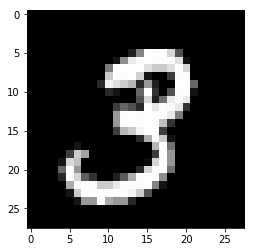

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 2.9055167e-32 1.6042535e-33 1.0000000e+00 0.0000000e+00
 2.4132117e-30 0.0000000e+00 6.1912601e-31 3.9815782e-25 6.1196686e-23]


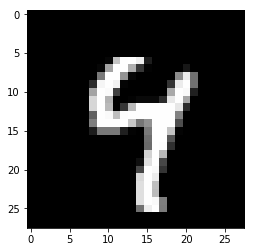

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.3477280e-24 1.3086208e-16 4.1641300e-20 3.7309669e-19 1.0000000e+00
 9.9999027e-20 7.9356671e-26 2.7542401e-15 1.0473584e-17 1.1480250e-10]


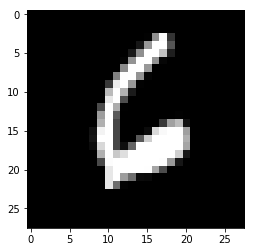

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5.8372292e-36 8.8108703e-32 1.7118580e-36 0.0000000e+00 1.5348941e-33
 7.1338935e-26 1.0000000e+00 0.0000000e+00 1.7808303e-30 3.9013207e-33]


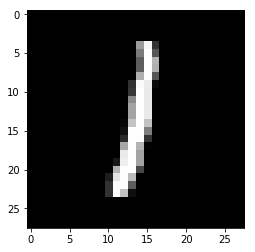

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.6990509e-33 1.0000000e+00 1.1428799e-25 7.6990208e-35 9.9325153e-24
 5.6278883e-36 7.6657897e-27 7.1594769e-23 2.1388267e-23 3.4230910e-32]


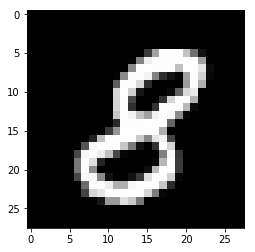

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[5.3740751e-24 5.8870960e-29 6.3375851e-20 7.0753267e-26 2.0885742e-28
 7.6601896e-24 4.5287441e-30 1.0517476e-30 1.0000000e+00 2.8074324e-19]


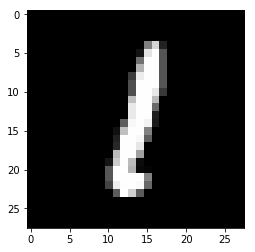

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.5000933e-30 1.0000000e+00 2.6036075e-22 3.0945820e-32 2.1118786e-22
 1.8806366e-31 1.9243183e-22 3.8369516e-20 6.7915373e-20 2.0794754e-32]


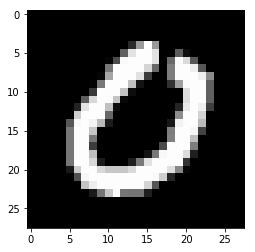

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


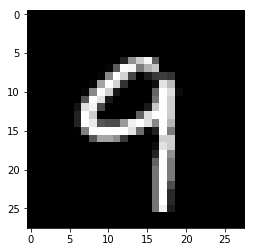

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[5.8728109e-28 2.4058243e-28 6.8612829e-25 4.2560593e-18 2.0169909e-15
 1.1812018e-19 8.2919269e-33 7.5061382e-21 3.3096962e-17 1.0000000e+00]


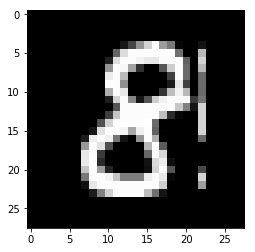

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.3933226e-26 1.5002027e-25 1.0697480e-18 4.2524391e-26 6.7716782e-25
 6.6360937e-25 8.4747148e-26 5.3676126e-27 1.0000000e+00 4.2379872e-29]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=8,activation_fn=tf.nn.relu))
#     smallmodel.add_layer(
#         FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100
        ,earlystop_params={'monitor':'val_acc', 'patience':10}
    )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7483301724996803365
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 4783310281697719183
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3280213 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.3598228 , acc = 0.69 
Epoch 1 , step 200 , loss= 0.8117258 , acc = 0.78 
Epoch 1 , step 300 , loss= 0.45038426 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.4069605 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.5461005 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.41063625 val_loss= 0.4262085 , acc = 0.9 val acc = 0.8824 
Epoch 1 finished, loss= 0.8934873 val loss= 0.4262085 ,  acc = 0.74090904 val acc = 0.8824
*
Epoch 2 , step 50 , loss= 0.42708388 , acc = 0.88 
Epoch 2 , step 150 , loss= 0.38382953 , acc = 0.9 
Epoch 2 , step 250 , loss= 0.2652749 , acc = 0.92 
Epoch 2 , s

Epoch 18 , step 50 , loss= 0.20177005 , acc = 0.94 
Epoch 18 , step 150 , loss= 0.38604492 , acc = 0.9 
Epoch 18 , step 250 , loss= 0.17625666 , acc = 0.94 
Epoch 18 , step 350 , loss= 0.29591292 , acc = 0.92 
Epoch 18 , step 450 , loss= 0.32016218 , acc = 0.91 
Epoch 18 , step 549 , loss= 0.17784348 val_loss= 0.24183384 , acc = 0.94 val acc = 0.929 
Epoch 18 finished, loss= 0.23630875 val loss= 0.24183384 ,  acc = 0.9327819 val acc = 0.929

Epoch 19 , step 0 , loss= 0.2045425 , acc = 0.94 
Epoch 19 , step 100 , loss= 0.20402566 , acc = 0.94 
Epoch 19 , step 200 , loss= 0.22041255 , acc = 0.91 
Epoch 19 , step 300 , loss= 0.33528337 , acc = 0.92 
Epoch 19 , step 400 , loss= 0.19231254 , acc = 0.96 
Epoch 19 , step 500 , loss= 0.25238428 , acc = 0.94 
Epoch 19 , step 549 , loss= 0.28960037 val_loss= 0.23933712 , acc = 0.91 val acc = 0.932 
Epoch 19 finished, loss= 0.2347957 val loss= 0.23933712 ,  acc = 0.9336182 val acc = 0.932
*
Epoch 20 , step 50 , loss= 0.2908764 , acc = 0.9 
Epoch 

Small model
Plotting loss...


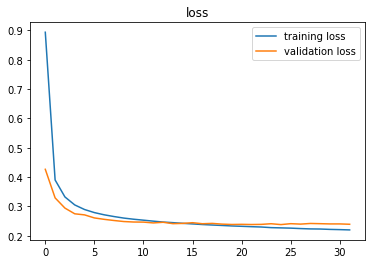

Plotting metrics...


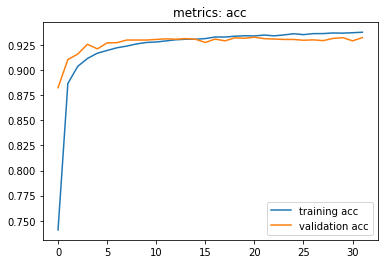

train {'acc': 0.9388}
test {'acc': 0.9289}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

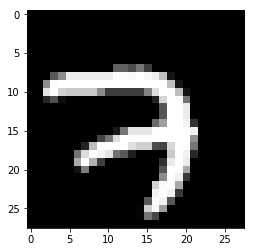

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.4845061e-08 1.2751869e-07 1.5508084e-02 7.7534951e-02 9.8352302e-07
 3.6998706e-08 4.6695525e-15 8.4560120e-01 1.3709461e-03 5.9983674e-02]


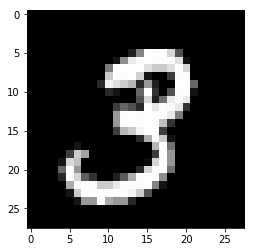

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[7.0296846e-07 3.1621573e-07 2.9963001e-06 9.9881208e-01 8.0196478e-13
 1.0168269e-04 2.7388838e-12 6.8094278e-07 1.0447151e-03 3.6720627e-05]


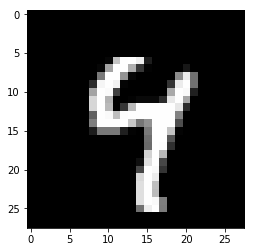

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.5202504e-09 9.5061778e-11 1.2027421e-09 2.3599078e-04 9.1318183e-02
 1.0090081e-03 3.3680780e-11 3.6071960e-05 1.2903879e-02 8.9449680e-01]


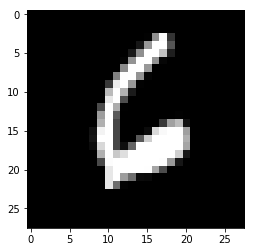

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[7.5122993e-04 1.2082652e-09 5.2531976e-03 1.2191053e-06 9.3110226e-05
 8.8316468e-05 9.9380916e-01 5.7149759e-07 2.9913965e-06 1.4894864e-07]


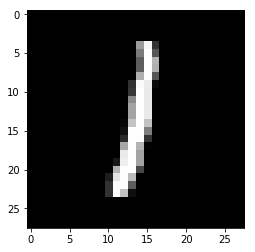

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[3.7432102e-07 9.9782407e-01 1.8622915e-04 3.0541362e-04 7.4133617e-08
 3.5754292e-05 1.9040352e-05 2.2517994e-05 1.6025451e-03 4.0307405e-06]


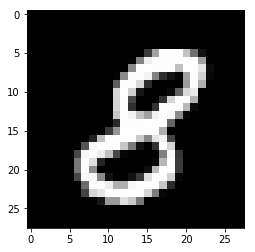

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.6536735e-05 1.0689474e-08 9.9984667e-05 9.3653071e-04 7.4552242e-10
 1.4702430e-04 1.8883722e-07 6.4286437e-10 9.9876994e-01 2.9763311e-05]


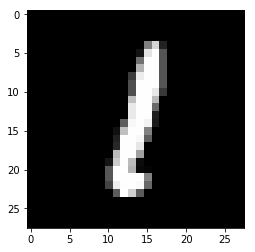

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[5.4207396e-07 9.9126536e-01 2.4212703e-04 3.8005784e-04 1.3362740e-08
 1.8194405e-05 3.2178574e-05 3.1137347e-06 8.0537936e-03 4.5002407e-06]


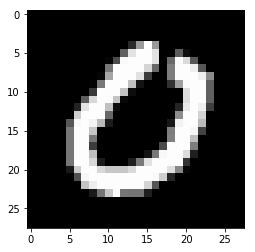

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9988353e-01 8.5748917e-18 5.4624511e-06 3.6057677e-09 1.0112291e-13
 1.1068101e-04 3.8201645e-08 3.8474432e-10 2.1765324e-07 1.4313683e-08]


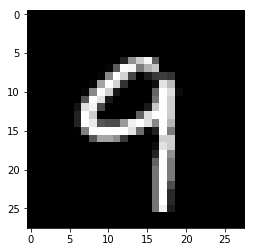

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.5842079e-05 2.4212132e-10 3.5916943e-07 1.1981043e-04 3.4470554e-02
 2.4550821e-04 4.0218758e-08 4.4055600e-04 1.8326205e-03 9.6287471e-01]


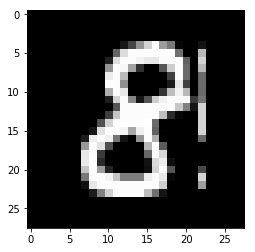

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.9060098e-05 1.5474562e-08 1.3352407e-04 7.5596059e-04 1.0156682e-07
 5.3533900e-04 2.0028781e-06 1.1299335e-09 9.9846917e-01 7.4700481e-05]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9431410407144549376
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 15509704765275772782
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2908075 , acc = 0.12 
t_cost <class 'dict'> 
train_op : 0.029413000000033662
loss_train : 0.016309999999975844
metric batch : 0.0050919999999905485
whole : 0.05121800000000576
display_whole : 0.021683999999993375
Epoch 1 , step 100 , loss= 1.6994565 , acc = 0.55 
t_cost <class 'dict'> 
train_op : 0.0032320000000254367
loss_train : 0.0021459999999819956
metric batch : 0.0009630000000129257
whole : 0.006798000000003412
display_whole : 0.00341499999996131
Epoch 1 , step 200 , loss= 1.0025432 , acc = 0.76 
t_cost <cla

Epoch 5 , step 300 , loss= 0.33929208 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004609999999956926
loss_train : 0.0049619999999777065
metric batch : 0.001052000000015596
whole : 0.011069999999961055
display_whole : 0.006298999999955868
Epoch 5 , step 400 , loss= 0.23153014 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.00359600000001592
loss_train : 0.006776999999999589
metric batch : 0.0009390000000166765
whole : 0.011943000000030679
display_whole : 0.008188000000018292
Epoch 5 , step 500 , loss= 0.27252427 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0032009999999900174
loss_train : 0.006681000000014592
metric batch : 0.001067000000034568
whole : 0.01139100000000326
display_whole : 0.00811900000002197
Epoch 5 , step 549 , loss= 0.34676915 val_loss= 0.27707753 , acc = 0.92 val acc = 0.9236 
Epoch 5 finished, loss= 0.31376845 val loss= 0.27707753 ,  acc = 0.9116727 val acc = 0.9236
*
t_cost <class 'dict'> 
train_op : 0.0032479999999850406
loss_train : 0.0074180000000296

Epoch 10 , step 50 , loss= 0.3294723 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034980000000359723
loss_train : 0.0018420000000105574
metric batch : 0.0010760000000118453
whole : 0.00698299999999108
display_whole : 0.003291999999987638
Epoch 10 , step 150 , loss= 0.24189842 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0040439999999648535
loss_train : 0.0019499999999652573
metric batch : 0.0009799999999700049
whole : 0.007497000000000753
display_whole : 0.003291999999987638
Epoch 10 , step 250 , loss= 0.1727555 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003539999999986776
loss_train : 0.0020880000000147447
metric batch : 0.0010609999999928732
whole : 0.007215999999971245
display_whole : 0.0035809999999969477
Epoch 10 , step 350 , loss= 0.28340146 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0035829999999918982
loss_train : 0.013923999999974512
metric batch : 0.0011240000000043437
whole : 0.019115999999996802
display_whole : 0.015381999999988238
Epoch 10 , step 4

Epoch 14 , step 549 , loss= 0.16745153 val_loss= 0.24845883 , acc = 0.96 val acc = 0.9294 
Epoch 14 finished, loss= 0.26669368 val loss= 0.24845883 ,  acc = 0.92547274 val acc = 0.9294
*
t_cost <class 'dict'> 
train_op : 0.0031060000000024957
loss_train : 0.0029609999999706815
metric batch : 0.0010159999999928004
loss_val : 0.034263000000009924
metric_val : 0.02000500000002603
whole : 0.0625079999999798
display_whole : 0.059257000000002336
Epoch 15 , step 0 , loss= 0.13425182 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.006094000000018696
loss_train : 0.0036309999999843967
metric batch : 0.001086999999984073
whole : 0.01132999999998674
display_whole : 0.0050190000000043256
Epoch 15 , step 100 , loss= 0.2567102 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003654999999980646
loss_train : 0.0025629999999523534
metric batch : 0.0010719999999651009
whole : 0.007813999999996213
display_whole : 0.003985999999997603
Epoch 15 , step 200 , loss= 0.22526476 , acc = 0.97 
t_cost <class 'd

Epoch 19 , step 300 , loss= 0.24835464 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0033849999999802094
loss_train : 0.002195000000028813
metric batch : 0.0008540000000039072
whole : 0.006894999999985885
display_whole : 0.003421000000003005
Epoch 19 , step 400 , loss= 0.23384137 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003419999999891843
loss_train : 0.0022450000000162618
metric batch : 0.0010059999999612046
whole : 0.007168999999976222
display_whole : 0.00367099999994025
Epoch 19 , step 500 , loss= 0.2645944 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0039539999999078645
loss_train : 0.004737999999974818
metric batch : 0.0009929999999940264
whole : 0.010131999999998698
display_whole : 0.0060869999999795255
Epoch 19 , step 549 , loss= 0.23309778 val_loss= 0.24247368 , acc = 0.93 val acc = 0.9284 
Epoch 19 finished, loss= 0.25494695 val loss= 0.24247368 ,  acc = 0.9287636 val acc = 0.9284

t_cost <class 'dict'> 
train_op : 0.0033740000000079817
loss_train : 0.0018619

Epoch 24 , step 50 , loss= 0.26179418 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003437999999960084
loss_train : 0.002010999999924934
metric batch : 0.0009780000000318978
whole : 0.006838000000016109
display_whole : 0.0033139999999320935
Epoch 24 , step 150 , loss= 0.28137589 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0038189999999076463
loss_train : 0.0026489999999057545
metric batch : 0.0009339999999156134
whole : 0.00784200000009605
display_whole : 0.003919999999993706
Epoch 24 , step 250 , loss= 0.17674038 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0034560000000283253
loss_train : 0.0020939999999427528
metric batch : 0.0009459999999990032
whole : 0.007004999999935535
display_whole : 0.00344099999995251
Epoch 24 , step 350 , loss= 0.10808273 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003495999999927335
loss_train : 0.0020059999999375577
metric batch : 0.0010310000000117725
whole : 0.006934999999998581
display_whole : 0.0033569999999372158
Epoch 24 , step 4

Epoch 28 , step 549 , loss= 0.15738359 val_loss= 0.23771182 , acc = 0.95 val acc = 0.929 
Epoch 28 finished, loss= 0.24153928 val loss= 0.23771182 ,  acc = 0.93216366 val acc = 0.929

t_cost <class 'dict'> 
train_op : 0.0038490000000592772
loss_train : 0.004042000000026746
metric batch : 0.0010429999999814754
loss_val : 0.03241200000002209
metric_val : 0.01966800000002422
whole : 0.06214399999998932
display_whole : 0.05817200000001321
Epoch 29 , step 0 , loss= 0.23596561 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.008924999999976535
loss_train : 0.0020400000000790897
metric batch : 0.001196000000049935
whole : 0.012721999999939726
display_whole : 0.0035520000000133223
Epoch 29 , step 100 , loss= 0.47268972 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003991000000041822
loss_train : 0.004317000000014559
metric batch : 0.0010989999999537758
whole : 0.009923000000071625
display_whole : 0.005762000000004264
Epoch 29 , step 200 , loss= 0.28520742 , acc = 0.92 
t_cost <class 'dict

Epoch 33 , step 300 , loss= 0.35437256 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003963999999996304
loss_train : 0.0025019999999358333
metric batch : 0.0008919999999079664
whole : 0.007847999999967215
display_whole : 0.003758999999945445
Epoch 33 , step 400 , loss= 0.17458807 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035790000000588407
loss_train : 0.01483399999995072
metric batch : 0.0011819999999715947
whole : 0.019967999999948916
display_whole : 0.016307999999980893
Epoch 33 , step 500 , loss= 0.31995797 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0036620000000766595
loss_train : 0.013887999999951717
metric batch : 0.0013329999999314168
whole : 0.019261000000028616
display_whole : 0.015497999999979584
Epoch 33 , step 549 , loss= 0.2448588 val_loss= 0.233874 , acc = 0.93 val acc = 0.929 
Epoch 33 finished, loss= 0.2358429 val loss= 0.233874 ,  acc = 0.93365455 val acc = 0.929

t_cost <class 'dict'> 
train_op : 0.003597000000013395
loss_train : 0.0020409999999628

Epoch 38 , step 50 , loss= 0.16041034 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.006713999999988118
loss_train : 0.009337000000073203
metric batch : 0.003290999999990163
whole : 0.019878000000062457
display_whole : 0.013074000000074193
Epoch 38 , step 150 , loss= 0.29497132 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003639000000021042
loss_train : 0.002513000000021748
metric batch : 0.0009709999999358843
whole : 0.007578999999964253
display_whole : 0.0038590000000340297
Epoch 38 , step 250 , loss= 0.16839428 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003843999999958214
loss_train : 0.0026410000000396394
metric batch : 0.00123000000007778
whole : 0.008220000000051186
display_whole : 0.004205000000069958
Epoch 38 , step 350 , loss= 0.16876711 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004210999999941123
loss_train : 0.018027000000074622
metric batch : 0.0018639999999550128
whole : 0.024504999999976462
display_whole : 0.020217999999999847
Epoch 38 , step 450 , 

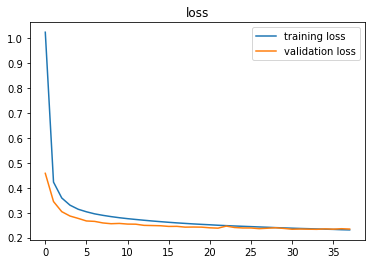

Plotting metrics...


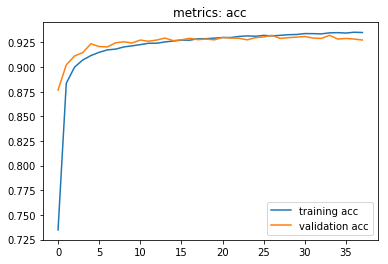

train {'acc': 0.93445456}
test {'acc': 0.9253}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7824883666182482822
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 17112404429865166696
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2843752 , acc = 0.16 
t_cost <class 'dict'> 
train_op : 0.03208299999994324
loss_train : 0.015903999999977714
metric batch : 0.006461000000058448
whole : 0.05491200000005847
display_whole : 0.022740999999996347
Epoch 1 , step 100 , loss= 1.6408256 , acc = 0.5 
t_cost <class 'dict'> 
train_op : 0.0034010000000535
loss_train : 0.002207999999995991
metric batch : 0.0010009999999738284
whole : 0.007188000000041939
display_whole : 0.0036159999999654246
Epoch 1 , step 20

Epoch 5 , step 300 , loss= 0.39812878 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.004692999999974745
loss_train : 0.015203000000042266
metric batch : 0.0011510000000498621
whole : 0.021424999999908323
display_whole : 0.01662300000009509
Epoch 5 , step 400 , loss= 0.27110144 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.004217000000039661
loss_train : 0.0057150000000092405
metric batch : 0.0012480000000323344
whole : 0.01174700000001394
display_whole : 0.007359999999948741
Epoch 5 , step 500 , loss= 0.2483815 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036860000000160653
loss_train : 0.005311000000006061
metric batch : 0.0011729999999943175
whole : 0.010611000000039894
display_whole : 0.006819000000064079
Epoch 5 , step 549 , loss= 0.47681725 val_loss= 0.29807177 , acc = 0.87 val acc = 0.9222 
Epoch 5 finished, loss= 0.3286264 val loss= 0.29807177 ,  acc = 0.9128364 val acc = 0.9222
*
t_cost <class 'dict'> 
train_op : 0.0035480000000234213
loss_train : 0.002277999999932

Epoch 10 , step 50 , loss= 0.17800088 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004570999999941705
loss_train : 0.0033389999999826614
metric batch : 0.0010730000000194195
whole : 0.009538000000020475
display_whole : 0.004736999999977343
Epoch 10 , step 150 , loss= 0.55312794 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.004096000000004096
loss_train : 0.0059330000000272776
metric batch : 0.001067000000034568
whole : 0.011868000000049506
display_whole : 0.007599000000027445
Epoch 10 , step 250 , loss= 0.3643563 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003041000000052918
loss_train : 0.008000999999921987
metric batch : 0.001004000000079941
whole : 0.012580000000070868
display_whole : 0.009377999999969688
Epoch 10 , step 350 , loss= 0.5885736 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0036590000000842338
loss_train : 0.004052999999998974
metric batch : 0.0009129999999686333
whole : 0.0090460000000121
display_whole : 0.005297999999925196
Epoch 10 , step 450 , los

Epoch 14 , step 549 , loss= 0.21949515 val_loss= 0.27718204 , acc = 0.94 val acc = 0.928 
Epoch 14 finished, loss= 0.28588986 val loss= 0.27718204 ,  acc = 0.92589086 val acc = 0.928
*
t_cost <class 'dict'> 
train_op : 0.003330000000005384
loss_train : 0.013929000000075575
metric batch : 0.001132999999981621
loss_val : 0.03015800000002855
metric_val : 0.021053000000051725
whole : 0.07084199999997054
display_whole : 0.06734700000004068
Epoch 15 , step 0 , loss= 0.35937497 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0067689999999629435
loss_train : 0.0017140000001063527
metric batch : 0.0009009999999989304
whole : 0.010181999999986147
display_whole : 0.002911000000040076
Epoch 15 , step 100 , loss= 0.35270625 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0034349999999676584
loss_train : 0.0019640000000435975
metric batch : 0.001015999999935957
whole : 0.006870999999932792
display_whole : 0.003221000000053209
Epoch 15 , step 200 , loss= 0.1844319 , acc = 0.94 
t_cost <class 'dic

Epoch 19 , step 300 , loss= 0.52891785 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0030919999999241554
loss_train : 0.0017129999999951906
metric batch : 0.000977999999918211
whole : 0.00628299999993942
display_whole : 0.0030459999999266074
Epoch 19 , step 400 , loss= 0.18477581 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003164999999967222
loss_train : 0.003570999999965352
metric batch : 0.0009570000000849177
whole : 0.008129000000053566
display_whole : 0.004868999999985135
Epoch 19 , step 500 , loss= 0.33431575 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004270000000019536
loss_train : 0.0022069999999985157
metric batch : 0.0010280000000193468
whole : 0.008003000000030625
display_whole : 0.003588000000036118
Epoch 19 , step 549 , loss= 0.23806857 val_loss= 0.27031326 , acc = 0.91 val acc = 0.9298 
Epoch 19 finished, loss= 0.27407825 val loss= 0.27031326 ,  acc = 0.9285273 val acc = 0.9298
*
t_cost <class 'dict'> 
train_op : 0.0033100000000558794
loss_train : 0.003533

Epoch 24 , step 50 , loss= 0.4200508 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034899999999424836
loss_train : 0.0033110000000533546
metric batch : 0.0009969999999839274
whole : 0.008348999999952866
display_whole : 0.0046859999999924185
Epoch 24 , step 150 , loss= 0.4605528 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003819000000021333
loss_train : 0.006562000000030821
metric batch : 0.001121000000011918
whole : 0.012158999999996922
display_whole : 0.008171999999945001
Epoch 24 , step 250 , loss= 0.2962231 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0035480000000234213
loss_train : 0.002269999999953143
metric batch : 0.0010729999999057327
whole : 0.007348999999976513
display_whole : 0.0036569999999755964
Epoch 24 , step 350 , loss= 0.26885572 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.00391300000001138
loss_train : 0.006934000000001106
metric batch : 0.0013690000000678992
whole : 0.012572999999974854
display_whole : 0.00859000000002652
Epoch 24 , step 450 , 

Epoch 28 , step 549 , loss= 0.3376461 val_loss= 0.26212555 , acc = 0.92 val acc = 0.929 
Epoch 28 finished, loss= 0.2592238 val loss= 0.26212555 ,  acc = 0.9322909 val acc = 0.929

t_cost <class 'dict'> 
train_op : 0.00336600000002818
loss_train : 0.006160000000022592
metric batch : 0.000977999999918211
loss_val : 0.03298800000004576
metric_val : 0.020940999999993437
whole : 0.06552699999997458
display_whole : 0.062007999999991625
Epoch 29 , step 0 , loss= 0.15156558 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.005613000000039392
loss_train : 0.0063760000000456785
metric batch : 0.0009839999999030624
whole : 0.013577000000054795
display_whole : 0.007738000000017564
Epoch 29 , step 100 , loss= 0.3256402 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0029970000000503205
loss_train : 0.0020299999999906504
metric batch : 0.0009820000000217988
whole : 0.0064589999999498104
display_whole : 0.003311999999937143
Epoch 29 , step 200 , loss= 0.35365447 , acc = 0.94 
t_cost <class 'dict'>

Epoch 33 , step 300 , loss= 0.3221502 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003303999999957341
loss_train : 0.002057000000036169
metric batch : 0.0012030000000322616
whole : 0.0069740000000138025
display_whole : 0.0034980000000359723
Epoch 33 , step 400 , loss= 0.253149 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0032570000000760047
loss_train : 0.0037069999999630454
metric batch : 0.0009360000000242508
whole : 0.008309999999937645
display_whole : 0.004973999999947409
Epoch 33 , step 500 , loss= 0.13662486 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036130000000866858
loss_train : 0.002704999999991742
metric batch : 0.0009079999999812571
whole : 0.007706999999982145
display_whole : 0.003926999999976033
Epoch 33 , step 549 , loss= 0.21546143 val_loss= 0.26280436 , acc = 0.94 val acc = 0.929 
Epoch 33 finished, loss= 0.25338346 val loss= 0.26280436 ,  acc = 0.93259996 val acc = 0.929

t_cost <class 'dict'> 
train_op : 0.0035309999999526553
loss_train : 0.00477499

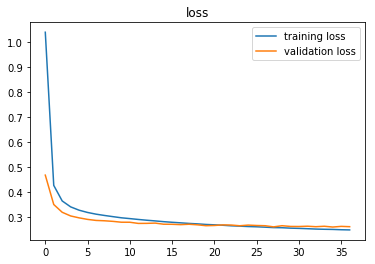

Plotting metrics...


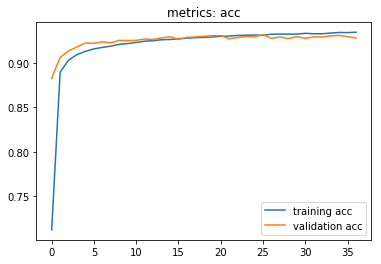

train {'acc': 0.9355091}
test {'acc': 0.9302}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15209226232726589039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 11238594436338818168
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2984781 , acc = 0.07 
t_cost <class 'dict'> 
train_op : 0.026006000000052154
loss_train : 0.013366000000019085
metric batch : 0.005193999999960397
whole : 0.04489600000010796
display_whole : 0.018807000000037988
Epoch 1 , step 100 , loss= 1.4737241 , acc = 0.66 
t_cost <class 'dict'> 
train_op : 0.003233000000022912
loss_train : 0.0017000000000280124
metric batch : 0.0010469999999713764
whole : 0.0064260000000331274
display_whole : 0.0031020000000125947
Epoch 1 , ste

Epoch 5 , step 300 , loss= 0.2843852 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003027999999972053
loss_train : 0.007252999999991516
metric batch : 0.001109000000042215
whole : 0.01188799999999901
display_whole : 0.00867700000003424
Epoch 5 , step 400 , loss= 0.29514983 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0032519999999749416
loss_train : 0.011592000000064218
metric batch : 0.0010389999999915744
whole : 0.01648800000009487
display_whole : 0.013075000000071668
Epoch 5 , step 500 , loss= 0.31053224 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0037839999999960128
loss_train : 0.014575000000036198
metric batch : 0.0009440000000040527
whole : 0.020039999999994507
display_whole : 0.016128999999978078
Epoch 5 , step 549 , loss= 0.17602095 val_loss= 0.30753642 , acc = 0.96 val acc = 0.9222 
Epoch 5 finished, loss= 0.33609682 val loss= 0.30753642 ,  acc = 0.91359997 val acc = 0.9222
*
t_cost <class 'dict'> 
train_op : 0.004013999999983753
loss_train : 0.0070030000000542

Epoch 10 , step 50 , loss= 0.17281038 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003979000000072119
loss_train : 0.0020970000000488653
metric batch : 0.0009860000000116997
whole : 0.007443999999964035
display_whole : 0.003390999999965061
Epoch 10 , step 150 , loss= 0.39322925 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0031850000000304135
loss_train : 0.004924999999957436
metric batch : 0.0009139999999661086
whole : 0.009661999999934778
display_whole : 0.006318999999962216
Epoch 10 , step 250 , loss= 0.2711628 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003086000000052991
loss_train : 0.002208999999993466
metric batch : 0.0009129999999686333
whole : 0.006678999999962798
display_whole : 0.0034139999999069914
Epoch 10 , step 350 , loss= 0.23217106 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003287000000000262
loss_train : 0.007210999999983869
metric batch : 0.0009890000000041255
whole : 0.01203099999997903
display_whole : 0.008568999999965854
Epoch 10 , step 450 

Epoch 14 , step 549 , loss= 0.2589563 val_loss= 0.28137475 , acc = 0.92 val acc = 0.9288 
Epoch 14 finished, loss= 0.28524753 val loss= 0.28137475 ,  acc = 0.92783636 val acc = 0.9288
*
t_cost <class 'dict'> 
train_op : 0.003474999999980355
loss_train : 0.007320000000049731
metric batch : 0.0008500000000140062
loss_val : 0.024829000000067936
metric_val : 0.02010599999994156
whole : 0.05786600000010367
display_whole : 0.05423500000006243
Epoch 15 , step 0 , loss= 0.6054401 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.005290999999942869
loss_train : 0.008877999999981512
metric batch : 0.001046000000087588
whole : 0.015692999999942003
display_whole : 0.010138999999981024
Epoch 15 , step 100 , loss= 0.36076286 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0030709999999771753
loss_train : 0.002505000000041946
metric batch : 0.0008880000000317523
whole : 0.006976000000008753
display_whole : 0.0037510000000793298
Epoch 15 , step 200 , loss= 0.23944959 , acc = 0.96 
t_cost <class 'dic

Epoch 19 , step 300 , loss= 0.23048612 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0031770000000506116
loss_train : 0.002584999999953652
metric batch : 0.0010900000000901855
whole : 0.007155000000011569
display_whole : 0.003908000000024003
Epoch 19 , step 400 , loss= 0.22359407 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033229999999093707
loss_train : 0.00624100000004546
metric batch : 0.000841000000036729
whole : 0.010795999999913874
display_whole : 0.007386000000110471
Epoch 19 , step 500 , loss= 0.35530093 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0038080000000491054
loss_train : 0.0065640000000257714
metric batch : 0.0010889999999790234
whole : 0.012017000000014377
display_whole : 0.008019999999987704
Epoch 19 , step 549 , loss= 0.28612965 val_loss= 0.2788117 , acc = 0.9 val acc = 0.931 
Epoch 19 finished, loss= 0.27191177 val loss= 0.2788117 ,  acc = 0.9305637 val acc = 0.931

t_cost <class 'dict'> 
train_op : 0.003442000000063672
loss_train : 0.0055619999999

Epoch 24 , step 50 , loss= 0.30322754 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003125000000068212
loss_train : 0.005541999999991276
metric batch : 0.0011259999999992942
whole : 0.010131999999998698
display_whole : 0.00692900000001373
Epoch 24 , step 150 , loss= 0.4284533 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.004262999999923522
loss_train : 0.0027209999999513457
metric batch : 0.001033000000006723
whole : 0.00857199999995828
display_whole : 0.004140000000006694
Epoch 24 , step 250 , loss= 0.25333342 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033549999999422653
loss_train : 0.001853000000096472
metric batch : 0.0011200000000144428
whole : 0.006715999999983069
display_whole : 0.003195000000005166
Epoch 24 , step 350 , loss= 0.30117634 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003242000000000189
loss_train : 0.009599000000093838
metric batch : 0.0010149999999384818
whole : 0.014317000000005464
display_whole : 0.010932000000025255
Epoch 24 , step 450 , lo

Epoch 28 , step 549 , loss= 0.41283137 val_loss= 0.2663098 , acc = 0.85 val acc = 0.9314 
Epoch 28 finished, loss= 0.2565514 val loss= 0.2663098 ,  acc = 0.935 val acc = 0.9314

t_cost <class 'dict'> 
train_op : 0.003642000000013468
loss_train : 0.0019310000000132277
metric batch : 0.000987000000009175
loss_val : 0.024232999999981075
metric_val : 0.019770999999991545
whole : 0.051606999999989966
display_whole : 0.047826999999983855
Epoch 29 , step 0 , loss= 0.46130654 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.005928000000039901
loss_train : 0.002911000000040076
metric batch : 0.0009459999999990032
whole : 0.010424000000057276
display_whole : 0.004138000000011743
Epoch 29 , step 100 , loss= 0.20944783 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003604999999993197
loss_train : 0.0018450000000029831
metric batch : 0.0009499999999889042
whole : 0.006817000000069129
display_whole : 0.003099000000020169
Epoch 29 , step 200 , loss= 0.27903336 , acc = 0.91 
t_cost <class 'dict'> 


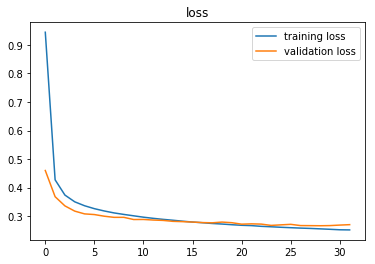

Plotting metrics...


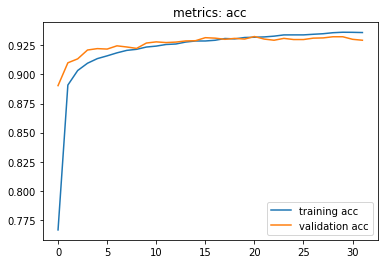

train {'acc': 0.93601817}
test {'acc': 0.9281}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1258210629130991026
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 14277148645012178382
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3203511 , acc = 0.08 
t_cost <class 'dict'> 
train_op : 0.026525999999989835
loss_train : 0.015653000000042994
metric batch : 0.004641999999989821
whole : 0.04722300000003088
display_whole : 0.020577000000002954
Epoch 1 , step 100 , loss= 1.623504 , acc = 0.62 
t_cost <class 'dict'> 
train_op : 0.003447000000051048
loss_train : 0.0033979999999473876
metric batch : 0.001071000000024469
whole : 0.008365999999909945
display_whole : 0.004815000000007785
Epoch 1 , step 

Epoch 5 , step 300 , loss= 0.50941336 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0035400000000436194
loss_train : 0.0049080000000003565
metric batch : 0.0010359999999991487
whole : 0.010012000000074295
display_whole : 0.006267999999977292
Epoch 5 , step 400 , loss= 0.41717502 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0036999999999807187
loss_train : 0.0018810000000257787
metric batch : 0.0009049999999888314
whole : 0.006992999999965832
display_whole : 0.0030890000000454165
Epoch 5 , step 500 , loss= 0.36762813 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0031690000000708096
loss_train : 0.0023830000000089058
metric batch : 0.0009179999999560096
whole : 0.006996999999955733
display_whole : 0.003639000000021042
Epoch 5 , step 549 , loss= 0.35005775 val_loss= 0.3072933 , acc = 0.91 val acc = 0.923 
Epoch 5 finished, loss= 0.32328013 val loss= 0.3072933 ,  acc = 0.91598177 val acc = 0.923
*
t_cost <class 'dict'> 
train_op : 0.0036280000000488144
loss_train : 0.0020049999

Epoch 10 , step 50 , loss= 0.3401509 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003533999999945081
loss_train : 0.00282599999991362
metric batch : 0.0011850000000777072
whole : 0.00810300000011921
display_whole : 0.0043980000000374275
Epoch 10 , step 150 , loss= 0.19874682 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003545999999914784
loss_train : 0.011016000000154236
metric batch : 0.0009549999999762804
whole : 0.01600700000017241
display_whole : 0.012365000000045256
Epoch 10 , step 250 , loss= 0.31033605 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003620999999839114
loss_train : 0.003020000000105938
metric batch : 0.0008860000000368018
whole : 0.00810900000010406
display_whole : 0.004282999999986714
Epoch 10 , step 350 , loss= 0.366239 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0034660000001167646
loss_train : 0.013598000000001775
metric batch : 0.0012389999999413703
whole : 0.018780999999989945
display_whole : 0.015161000000034619
Epoch 10 , step 450 , loss

Epoch 14 , step 549 , loss= 0.37758964 val_loss= 0.28324696 , acc = 0.91 val acc = 0.9274 
Epoch 14 finished, loss= 0.27991813 val loss= 0.28324696 ,  acc = 0.9282909 val acc = 0.9274

t_cost <class 'dict'> 
train_op : 0.003361999999924592
loss_train : 0.0037780000000111613
metric batch : 0.0010910000000876607
loss_val : 0.023083999999926164
metric_val : 0.02115600000001905
whole : 0.054086000000097556
display_whole : 0.050565000000005966
Epoch 15 , step 0 , loss= 0.19028793 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.006323000000065804
loss_train : 0.0046859999999924185
metric batch : 0.0008929999999054417
whole : 0.012812000000167245
display_whole : 0.005878999999822554
Epoch 15 , step 100 , loss= 0.18941641 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003359000000045853
loss_train : 0.0018390000000181317
metric batch : 0.0009709999999358843
whole : 0.006628000000091561
display_whole : 0.003108000000111133
Epoch 15 , step 200 , loss= 0.17527634 , acc = 0.95 
t_cost <class 

Epoch 19 , step 300 , loss= 0.24666835 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036159999999654246
loss_train : 0.007014000000026499
metric batch : 0.0009910000001127628
whole : 0.01209999999991851
display_whole : 0.008385000000089349
Epoch 19 , step 400 , loss= 0.21126574 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0031290000001718
loss_train : 0.0022229999999581196
metric batch : 0.0010859999999865977
whole : 0.006872000000157641
display_whole : 0.0036210000000664877
Epoch 19 , step 500 , loss= 0.1915338 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0036900000000059663
loss_train : 0.007385000000112996
metric batch : 0.0011540000000422879
whole : 0.01276800000005096
display_whole : 0.008906000000024505
Epoch 19 , step 549 , loss= 0.22579971 val_loss= 0.28355482 , acc = 0.92 val acc = 0.9282 
Epoch 19 finished, loss= 0.26927456 val loss= 0.28355482 ,  acc = 0.9310728 val acc = 0.9282

t_cost <class 'dict'> 
train_op : 0.003272999999808235
loss_train : 0.00186300000

Epoch 24 , step 50 , loss= 0.22209238 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003456000000142012
loss_train : 0.001642999999830863
metric batch : 0.0011190000000169675
whole : 0.006605000000035943
display_whole : 0.0029839999999694555
Epoch 24 , step 150 , loss= 0.17067552 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033809999999903084
loss_train : 0.0039999999999054126
metric batch : 0.0008960000000115542
whole : 0.008759999999938373
display_whole : 0.00521800000001349
Epoch 24 , step 250 , loss= 0.40962347 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003724999999803913
loss_train : 0.013603999999986627
metric batch : 0.0009399999999004649
whole : 0.018640000000004875
display_whole : 0.014836999999943146
Epoch 24 , step 350 , loss= 0.17174473 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.004535999999916385
loss_train : 0.0020219999998971616
metric batch : 0.0012580000000070868
whole : 0.008131000000048516
display_whole : 0.003516999999874315
Epoch 24 , step 450

Epoch 28 , step 549 , loss= 0.21706893 val_loss= 0.27480936 , acc = 0.94 val acc = 0.9286 
Epoch 28 finished, loss= 0.25696534 val loss= 0.27480936 ,  acc = 0.93465465 val acc = 0.9286

t_cost <class 'dict'> 
train_op : 0.0036769999999251013
loss_train : 0.005102000000078988
metric batch : 0.0009900000000016007
loss_val : 0.02247299999999086
metric_val : 0.020001000000092972
whole : 0.05367400000000089
display_whole : 0.049837000000025
Epoch 29 , step 0 , loss= 0.15965448 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.007691000000022541
loss_train : 0.003065999999989799
metric batch : 0.0011489999999412248
whole : 0.012791999999990367
display_whole : 0.004519999999956781
Epoch 29 , step 100 , loss= 0.2022838 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004266000000143322
loss_train : 0.0020970000000488653
metric batch : 0.0008639999998649728
whole : 0.007624000000078013
display_whole : 0.003281999999899199
Epoch 29 , step 200 , loss= 0.19310369 , acc = 0.93 
t_cost <class 'dict

Epoch 33 , step 300 , loss= 0.10161865 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0030429999999341817
loss_train : 0.0018629999999575375
metric batch : 0.0011280000001079316
whole : 0.006428000000141765
display_whole : 0.0032209999999395222
Epoch 33 , step 400 , loss= 0.38042504 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003376000000116619
loss_train : 0.001851999999871623
metric batch : 0.0010769999998956337
whole : 0.006689000000051237
display_whole : 0.0031669999998484855
Epoch 33 , step 500 , loss= 0.27138898 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.00451599999996688
loss_train : 0.0019400000001041917
metric batch : 0.0010130000000572181
whole : 0.007807000000184416
display_whole : 0.003216000000065833
Epoch 33 , step 549 , loss= 0.23883669 val_loss= 0.2766986 , acc = 0.94 val acc = 0.9318 
Epoch 33 finished, loss= 0.2511589 val loss= 0.2766986 ,  acc = 0.93554544 val acc = 0.9318

t_cost <class 'dict'> 
train_op : 0.0035940000000209693
loss_train : 0.0018690

Epoch 38 , step 50 , loss= 0.21828954 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0035570000000006985
loss_train : 0.00878099999999904
metric batch : 0.0010259999999107094
whole : 0.013790999999855558
display_whole : 0.010136000000102285
Epoch 38 , step 150 , loss= 0.15828928 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003620999999839114
loss_train : 0.00651800000014191
metric batch : 0.0011490000001685985
whole : 0.01170300000012503
display_whole : 0.007998000000043248
Epoch 38 , step 250 , loss= 0.39401695 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034179999997832056
loss_train : 0.0057189999999991414
metric batch : 0.0010709999999107822
whole : 0.010671999999885884
display_whole : 0.007097999999814419
Epoch 38 , step 350 , loss= 0.24474534 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0033009999999649153
loss_train : 0.0033410000000912987
metric batch : 0.001150000000052387
whole : 0.008201000000099157
display_whole : 0.004805000000033033
Epoch 38 , step 450 

Epoch 42 , step 549 , loss= 0.3254307 val_loss= 0.27788836 , acc = 0.94 val acc = 0.929 
Epoch 42 finished, loss= 0.24328175 val loss= 0.27788836 ,  acc = 0.9380909 val acc = 0.929

t_cost <class 'dict'> 
train_op : 0.03198700000007193
loss_train : 0.0019070000000738219
metric batch : 0.0008809999999357387
loss_val : 0.025163999999904263
metric_val : 0.019948999999996886
whole : 0.08092299999998431
display_whole : 0.04886199999987184
Epoch 43 , step 0 , loss= 0.28037047 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.006405000000086147
loss_train : 0.011664000000109809
metric batch : 0.001113000000032116
whole : 0.01989600000001701
display_whole : 0.013128000000051543
Epoch 43 , step 100 , loss= 0.10533725 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0035900000000310683
loss_train : 0.001975000000129512
metric batch : 0.0010400000001027365
whole : 0.0070180000000164
display_whole : 0.0032730000000356085
Epoch 43 , step 200 , loss= 0.21507606 , acc = 0.94 
t_cost <class 'dict'> 


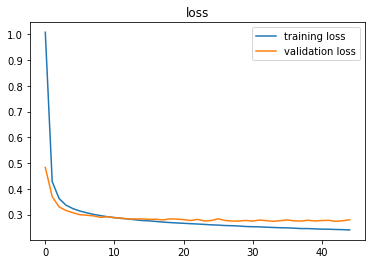

Plotting metrics...


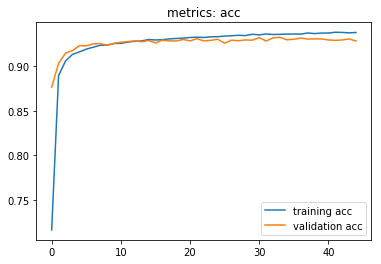

train {'acc': 0.9378}
test {'acc': 0.9294}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15154779142641552353
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 4543976852311212020
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.328514 , acc = 0.11 
t_cost <class 'dict'> 
train_op : 0.027068999999983134
loss_train : 0.025846999999885156
metric batch : 0.005237000000079206
whole : 0.05886300000020128
display_whole : 0.03132200000004559
Epoch 1 , step 100 , loss= 1.4856037 , acc = 0.6 
t_cost <class 'dict'> 
train_op : 0.0035729999999603024
loss_train : 0.00554399999987254
metric batch : 0.0009849999999005377
whole : 0.010551999999961481
display_whole : 0.006875999999920168
Epoch 1 , step 200 , lo

Epoch 5 , step 300 , loss= 0.28205937 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003157999999984895
loss_train : 0.003796999999849504
metric batch : 0.0009680000000571454
whole : 0.008406000000150016
display_whole : 0.005090999999993073
Epoch 5 , step 400 , loss= 0.33576268 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0033549999998285784
loss_train : 0.005065000000058717
metric batch : 0.0010629999999309803
whole : 0.009967000000187909
display_whole : 0.00645000000008622
Epoch 5 , step 500 , loss= 0.20707594 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003672000000051412
loss_train : 0.0023820000001251174
metric batch : 0.0011719999999968422
whole : 0.007724999999936699
display_whole : 0.003893999999945663
Epoch 5 , step 549 , loss= 0.34146768 val_loss= 0.2868735 , acc = 0.91 val acc = 0.9192 
Epoch 5 finished, loss= 0.29793757 val loss= 0.2868735 ,  acc = 0.9155273 val acc = 0.9192
*
t_cost <class 'dict'> 
train_op : 0.003224000000045635
loss_train : 0.007982999999967

Epoch 10 , step 50 , loss= 0.34370065 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003382999999985259
loss_train : 0.002604999999903157
metric batch : 0.000933000000031825
whole : 0.0073130000000674045
display_whole : 0.0038529999999354914
Epoch 10 , step 150 , loss= 0.19372268 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0037970000000768778
loss_train : 0.006125999999994747
metric batch : 0.001121000000011918
whole : 0.01157799999987219
display_whole : 0.007610000000113359
Epoch 10 , step 250 , loss= 0.2287779 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0033580000001620647
loss_train : 0.005615999999918131
metric batch : 0.0010519999998450658
whole : 0.010430000000042128
display_whole : 0.006998000000066895
Epoch 10 , step 350 , loss= 0.3154169 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035380000001623557
loss_train : 0.0031589999998686835
metric batch : 0.0010600000000522414
whole : 0.0082239999999274
display_whole : 0.00452499999983047
Epoch 10 , step 450 , lo

Epoch 14 , step 549 , loss= 0.21574922 val_loss= 0.25781688 , acc = 0.92 val acc = 0.9268 
Epoch 14 finished, loss= 0.25307333 val loss= 0.25781688 ,  acc = 0.9281818 val acc = 0.9268
*
t_cost <class 'dict'> 
train_op : 0.003856000000041604
loss_train : 0.0022250000001804437
metric batch : 0.0010030000000824657
loss_val : 0.027698000000100365
metric_val : 0.021187999999938256
whole : 0.05710799999997107
display_whole : 0.05313700000010613
Epoch 15 , step 0 , loss= 0.23708396 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.007785999999896376
loss_train : 0.0038380000000870496
metric batch : 0.001312999999981912
whole : 0.013553000000001703
display_whole : 0.005415999999968335
Epoch 15 , step 100 , loss= 0.2129882 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0033599999999296415
loss_train : 0.0038930000000618747
metric batch : 0.0010379999998804124
whole : 0.00878499999998894
display_whole : 0.005282999999963067
Epoch 15 , step 200 , loss= 0.19203518 , acc = 0.93 
t_cost <class 'd

Epoch 19 , step 300 , loss= 0.29586157 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0033980000000610744
loss_train : 0.00532799999996314
metric batch : 0.000955000000203654
whole : 0.010183999999981097
display_whole : 0.006596999999828768
Epoch 19 , step 400 , loss= 0.23399197 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035940000000209693
loss_train : 0.0020799999999780994
metric batch : 0.0012520000000222353
whole : 0.007466000000022177
display_whole : 0.0037279999999100255
Epoch 19 , step 500 , loss= 0.32641762 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003330000000005384
loss_train : 0.011942000000090047
metric batch : 0.001393000000007305
whole : 0.01704199999994671
display_whole : 0.013631000000032145
Epoch 19 , step 549 , loss= 0.16508795 val_loss= 0.25368395 , acc = 0.95 val acc = 0.928 
Epoch 19 finished, loss= 0.24156946 val loss= 0.25368395 ,  acc = 0.93130904 val acc = 0.928

t_cost <class 'dict'> 
train_op : 0.0032810000000154105
loss_train : 0.0019500000

Epoch 24 , step 50 , loss= 0.16225393 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00338000000010652
loss_train : 0.012760000000071159
metric batch : 0.0013530000001082954
whole : 0.017873000000008687
display_whole : 0.014341000000058557
Epoch 24 , step 150 , loss= 0.13583209 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004768000000012762
loss_train : 0.002563000000009197
metric batch : 0.001011999999946056
whole : 0.008763999999928274
display_whole : 0.003901999999925465
Epoch 24 , step 250 , loss= 0.08405596 , acc = 0.99 
t_cost <class 'dict'> 
train_op : 0.003561999999874388
loss_train : 0.0018039999999928114
metric batch : 0.0008829999999306892
whole : 0.006716999999980544
display_whole : 0.0029810000000907166
Epoch 24 , step 350 , loss= 0.12589906 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003780000000006112
loss_train : 0.0017800000000534055
metric batch : 0.0009789999999156862
whole : 0.007008999999925436
display_whole : 0.0031530000001112057
Epoch 24 , step 450

Epoch 28 , step 549 , loss= 0.14306986 val_loss= 0.24825889 , acc = 0.97 val acc = 0.9282 
Epoch 28 finished, loss= 0.22822145 val loss= 0.24825889 ,  acc = 0.9352 val acc = 0.9282

t_cost <class 'dict'> 
train_op : 0.003746999999975742
loss_train : 0.0023060000000896252
metric batch : 0.001142000000072585
loss_val : 0.04051600000002509
metric_val : 0.021358999999847583
whole : 0.07005600000002232
display_whole : 0.0661489999999958
Epoch 29 , step 0 , loss= 0.24750681 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0072909999998955755
loss_train : 0.003733999999894877
metric batch : 0.0010469999999713764
whole : 0.012711999999964974
display_whole : 0.005071999999927357
Epoch 29 , step 100 , loss= 0.16112266 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003877000000102271
loss_train : 0.0027489999999943393
metric batch : 0.0009359999999105639
whole : 0.008119999999962602
display_whole : 0.004097000000001572
Epoch 29 , step 200 , loss= 0.18363714 , acc = 0.93 
t_cost <class 'dict'>

Epoch 33 , step 300 , loss= 0.19416639 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0032509999998637795
loss_train : 0.012222000000065236
metric batch : 0.001113000000032116
whole : 0.017252000000098633
display_whole : 0.013864000000012311
Epoch 33 , step 400 , loss= 0.1682576 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003175000000055661
loss_train : 0.008079000000179803
metric batch : 0.0010569999999461288
whole : 0.012804999999843858
display_whole : 0.00944700000013654
Epoch 33 , step 500 , loss= 0.17572278 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003688000000011016
loss_train : 0.00189900000009402
metric batch : 0.0009780000000318978
whole : 0.006904999999960637
display_whole : 0.003100000000131331
Epoch 33 , step 549 , loss= 0.21660364 val_loss= 0.24702075 , acc = 0.93 val acc = 0.9328 
Epoch 33 finished, loss= 0.22278637 val loss= 0.24702075 ,  acc = 0.93649083 val acc = 0.9328

t_cost <class 'dict'> 
train_op : 0.003433999999970183
loss_train : 0.011606000000

Epoch 38 , step 50 , loss= 0.13955942 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0034559999999146385
loss_train : 0.0018390000000181317
metric batch : 0.001099999999951251
whole : 0.006857000000081825
display_whole : 0.003306999999949767
Epoch 38 , step 150 , loss= 0.2612686 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0037910000000920263
loss_train : 0.006536000000096465
metric batch : 0.0009800000000268483
whole : 0.011796000000003914
display_whole : 0.007837999999992462
Epoch 38 , step 250 , loss= 0.26722196 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003283000000010361
loss_train : 0.001992000000200278
metric batch : 0.000945000000001528
whole : 0.0067229999999653955
display_whole : 0.0032820000001265726
Epoch 38 , step 350 , loss= 0.32853448 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0034729999999854044
loss_train : 0.0023770000000240543
metric batch : 0.0009749999999257852
whole : 0.007247000000006665
display_whole : 0.0036999999999807187
Epoch 38 , step 4

Epoch 42 , step 549 , loss= 0.3011015 val_loss= 0.24191181 , acc = 0.92 val acc = 0.9326 
Epoch 42 finished, loss= 0.21496724 val loss= 0.24191181 ,  acc = 0.9387091 val acc = 0.9326

t_cost <class 'dict'> 
train_op : 0.0034060000000408763
loss_train : 0.002139000000170199
metric batch : 0.0012059999999110005
loss_val : 0.026927000000114276
metric_val : 0.02021300000001247
whole : 0.05491099999994731
display_whole : 0.05134599999996681
Epoch 43 , step 0 , loss= 0.20581421 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.007356999999956315
loss_train : 0.0017339999999421707
metric batch : 0.0012460000000373839
whole : 0.01082300000007308
display_whole : 0.003287000000000262
Epoch 43 , step 100 , loss= 0.1576453 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003580000000056316
loss_train : 0.005272000000104526
metric batch : 0.0009850000001279113
whole : 0.010417999999845051
display_whole : 0.00663299999996525
Epoch 43 , step 200 , loss= 0.25634375 , acc = 0.93 
t_cost <class 'dict'>

Epoch 47 , step 300 , loss= 0.2247121 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004028999999945881
loss_train : 0.0020280000001093867
metric batch : 0.0009990000000925647
whole : 0.007605000000012296
display_whole : 0.0034830000001875305
Epoch 47 , step 400 , loss= 0.0994353 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0032679999999345455
loss_train : 0.0022010000000136642
metric batch : 0.0009599999998499698
whole : 0.00684200000000601
display_whole : 0.003478999999970256
Epoch 47 , step 500 , loss= 0.12406958 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.003308000000060929
loss_train : 0.0045860000000175205
metric batch : 0.0011419999998452113
whole : 0.009496000000126514
display_whole : 0.006035999999994601
Epoch 47 , step 549 , loss= 0.14140001 val_loss= 0.24347202 , acc = 0.96 val acc = 0.9334 
Epoch 47 finished, loss= 0.21185824 val loss= 0.24347202 ,  acc = 0.94021815 val acc = 0.9334

t_cost <class 'dict'> 
train_op : 0.003290999999990163
loss_train : 0.0023609

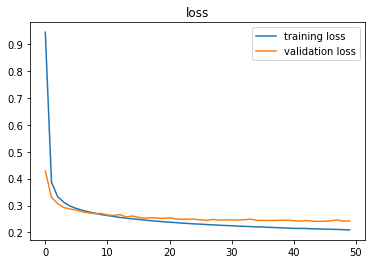

Plotting metrics...


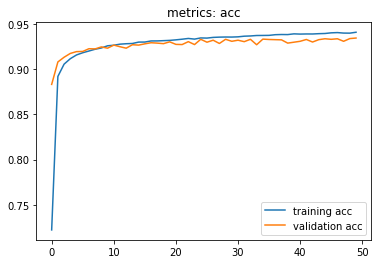

train {'acc': 0.9406}
test {'acc': 0.9304}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9308897855289846786
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 12872627088418192495
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3078039 , acc = 0.02 
t_cost <class 'dict'> 
train_op : 0.03134900000009111
loss_train : 0.01537200000007033
metric batch : 0.005112999999937529
whole : 0.05217500000003383
display_whole : 0.020720999999866763
Epoch 1 , step 100 , loss= 1.9406035 , acc = 0.5 
t_cost <class 'dict'> 
train_op : 0.003349999999954889
loss_train : 0.0018090000000938744
metric batch : 0.0009840000000167493
whole : 0.006530000000111613
display_whole : 0.003011000000014974
Epoch 1 , step 200 , l

Epoch 5 , step 300 , loss= 0.40427357 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0035210000000915898
loss_train : 0.007945999999947162
metric batch : 0.0010389999999915744
whole : 0.012889999999970314
display_whole : 0.009227000000009866
Epoch 5 , step 400 , loss= 0.3034443 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003692999999884705
loss_train : 0.0023229999999330175
metric batch : 0.0011179999999058055
whole : 0.007630999999946653
display_whole : 0.0037609999999403954
Epoch 5 , step 500 , loss= 0.38344556 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.00415700000007746
loss_train : 0.006710999999995693
metric batch : 0.0009659999998348212
whole : 0.012210999999979322
display_whole : 0.007982999999967433
Epoch 5 , step 549 , loss= 0.31122762 val_loss= 0.3197711 , acc = 0.95 val acc = 0.911 
Epoch 5 finished, loss= 0.3529862 val loss= 0.3197711 ,  acc = 0.9062182 val acc = 0.911

t_cost <class 'dict'> 
train_op : 0.00330500000018219
loss_train : 0.0016989999999168504


Epoch 10 , step 50 , loss= 0.3124245 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003163000000085958
loss_train : 0.006585999999970227
metric batch : 0.0011019999999462016
whole : 0.011148000000048341
display_whole : 0.007914999999911743
Epoch 10 , step 150 , loss= 0.16338818 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.004178000000138127
loss_train : 0.0027619999998478306
metric batch : 0.0011360000000877335
whole : 0.008536000000049171
display_whole : 0.0042049999999562715
Epoch 10 , step 250 , loss= 0.32712662 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003345999999964988
loss_train : 0.007258000000092579
metric batch : 0.0009939999999915017
whole : 0.012181999999938853
display_whole : 0.008704999999963547
Epoch 10 , step 350 , loss= 0.32346466 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003400000000056025
loss_train : 0.00793799999996736
metric batch : 0.0009909999998853891
whole : 0.01280599999995502
display_whole : 0.009242000000085682
Epoch 10 , step 450 , l

Epoch 14 , step 549 , loss= 0.6040231 val_loss= 0.28558937 , acc = 0.82 val acc = 0.9188 
Epoch 14 finished, loss= 0.30370477 val loss= 0.28558937 ,  acc = 0.92014545 val acc = 0.9188

t_cost <class 'dict'> 
train_op : 0.004182000000128028
loss_train : 0.0018489999999928841
metric batch : 0.001033000000006723
loss_val : 0.026776000000154454
metric_val : 0.01985899999999674
whole : 0.05484099999989667
display_whole : 0.05055399999992005
Epoch 15 , step 0 , loss= 0.36529976 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.005738000000064858
loss_train : 0.004716000000144049
metric batch : 0.0011920000001737208
whole : 0.012265000000070359
display_whole : 0.006202000000030239
Epoch 15 , step 100 , loss= 0.25896353 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0032599999999547435
loss_train : 0.0018299999999271677
metric batch : 0.001014999999824795
whole : 0.006613000000015745
display_whole : 0.003224999999929423
Epoch 15 , step 200 , loss= 0.2992918 , acc = 0.9 
t_cost <class 'dict'>

Epoch 19 , step 300 , loss= 0.20455006 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0035279999999602296
loss_train : 0.002598000000034517
metric batch : 0.0011819999999715947
whole : 0.008117999999967651
display_whole : 0.004435999999941487
Epoch 19 , step 400 , loss= 0.23737442 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0029709999998885905
loss_train : 0.002414000000044325
metric batch : 0.000959000000193555
whole : 0.006975000000011278
display_whole : 0.003838999999970838
Epoch 19 , step 500 , loss= 0.39482173 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0034009999999398133
loss_train : 0.0021469999999226275
metric batch : 0.0010910000000876607
whole : 0.007052999999814347
display_whole : 0.003495999999813648
Epoch 19 , step 549 , loss= 0.29023522 val_loss= 0.27835113 , acc = 0.91 val acc = 0.923 
Epoch 19 finished, loss= 0.2936173 val loss= 0.27835113 ,  acc = 0.9237273 val acc = 0.923
*
t_cost <class 'dict'> 
train_op : 0.004234999999880529
loss_train : 0.003685999

Epoch 24 , step 50 , loss= 0.32635295 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003238000000010288
loss_train : 0.003404000000045926
metric batch : 0.000941000000011627
whole : 0.0081159999999727
display_whole : 0.004710000000159198
Epoch 24 , step 150 , loss= 0.2937381 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0033100000000558794
loss_train : 0.007641000000148779
metric batch : 0.0013910000000123546
whole : 0.012789999999995416
display_whole : 0.009362000000010084
Epoch 24 , step 250 , loss= 0.25455293 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033410000000912987
loss_train : 0.007354999999961365
metric batch : 0.0010970000000725122
whole : 0.012334999999893625
display_whole : 0.008802999999943495
Epoch 24 , step 350 , loss= 0.39721847 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003727000000026237
loss_train : 0.005547000000206026
metric batch : 0.0009469999999964784
whole : 0.010842000000138796
display_whole : 0.006957000000056723
Epoch 24 , step 450 , l

Epoch 28 , step 549 , loss= 0.30039296 val_loss= 0.2725679 , acc = 0.89 val acc = 0.9238 
Epoch 28 finished, loss= 0.28144497 val loss= 0.2725679 ,  acc = 0.92736363 val acc = 0.9238

t_cost <class 'dict'> 
train_op : 0.003357999999934691
loss_train : 0.004519000000072992
metric batch : 0.0010489999999663269
loss_val : 0.024857999999994718
metric_val : 0.02105499999993299
whole : 0.05592900000010559
display_whole : 0.052396999999928084
Epoch 29 , step 0 , loss= 0.2574468 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007112999999890235
loss_train : 0.0033780000001115695
metric batch : 0.0009740000000419968
whole : 0.01224299999989853
display_whole : 0.004827000000204862
Epoch 29 , step 100 , loss= 0.4534027 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0035949999999047577
loss_train : 0.0018840000000182044
metric batch : 0.0009000000000014552
whole : 0.0069189999999252905
display_whole : 0.00317100000006576
Epoch 29 , step 200 , loss= 0.18138668 , acc = 0.96 
t_cost <class 'dict'

Epoch 33 , step 300 , loss= 0.23873563 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003517999999985477
loss_train : 0.014906000000109998
metric batch : 0.0009440000001177395
whole : 0.019781999999850086
display_whole : 0.01618400000006659
Epoch 33 , step 400 , loss= 0.2522018 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003688000000011016
loss_train : 0.004970999999841297
metric batch : 0.0009880000000066502
whole : 0.01018500000009226
display_whole : 0.006347999999888998
Epoch 33 , step 500 , loss= 0.20251125 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003440999999838823
loss_train : 0.0018930000001091685
metric batch : 0.0009499999998752173
whole : 0.006681999999955224
display_whole : 0.003163000000085958
Epoch 33 , step 549 , loss= 0.19593468 val_loss= 0.26952532 , acc = 0.94 val acc = 0.925 
Epoch 33 finished, loss= 0.2758747 val loss= 0.26952532 ,  acc = 0.9289454 val acc = 0.925

t_cost <class 'dict'> 
train_op : 0.003723000000036336
loss_train : 0.002210999999988

Epoch 38 , step 50 , loss= 0.2301467 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033129999999346182
loss_train : 0.005324999999857027
metric batch : 0.001050000000077489
whole : 0.010109999999940555
display_whole : 0.0067179999998643325
Epoch 38 , step 150 , loss= 0.19856396 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035389999998187704
loss_train : 0.0038479999998344283
metric batch : 0.0010940000001937733
whole : 0.008978999999953885
display_whole : 0.005269999999882202
Epoch 38 , step 250 , loss= 0.3151909 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0036860000000160653
loss_train : 0.007812999999941894
metric batch : 0.001343000000133543
whole : 0.013171000000056665
display_whole : 0.009407999999893946
Epoch 38 , step 350 , loss= 0.48510787 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003531000000066342
loss_train : 0.001878000000033353
metric batch : 0.0009490000002188026
whole : 0.006787999999914973
display_whole : 0.003077999999959502
Epoch 38 , step 450 

Epoch 42 , step 549 , loss= 0.27640116 val_loss= 0.2660208 , acc = 0.96 val acc = 0.9272 
Epoch 42 finished, loss= 0.26817086 val loss= 0.2660208 ,  acc = 0.93136364 val acc = 0.9272

t_cost <class 'dict'> 
train_op : 0.0031930000000102154
loss_train : 0.005225999999993292
metric batch : 0.0009880000000066502
loss_val : 0.028068999999959487
metric_val : 0.021385000000009313
whole : 0.06013200000006691
display_whole : 0.056771000000026106
Epoch 43 , step 0 , loss= 0.15998477 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0059160000000701984
loss_train : 0.004995000000008076
metric batch : 0.0011429999999563734
whole : 0.012782000000015614
display_whole : 0.006479000000126689
Epoch 43 , step 100 , loss= 0.26300895 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035439999999198335
loss_train : 0.004912999999987733
metric batch : 0.0011680000000069413
whole : 0.010042000000112239
display_whole : 0.006331999999929394
Epoch 43 , step 200 , loss= 0.23147476 , acc = 0.95 
t_cost <class '

Epoch 47 , step 300 , loss= 0.31140372 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004877999999962412
loss_train : 0.0025029999999333086
metric batch : 0.00105400000006739
whole : 0.009078000000044995
display_whole : 0.004013999999870066
Epoch 47 , step 400 , loss= 0.35813057 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0032320000000254367
loss_train : 0.0033100000000558794
metric batch : 0.0011640000000170403
whole : 0.008210999999846536
display_whole : 0.0047870000000784785
Epoch 47 , step 500 , loss= 0.35780784 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0034100000000307773
loss_train : 0.005595999999968626
metric batch : 0.001019999999925858
whole : 0.010590000000092914
display_whole : 0.007008999999925436
Epoch 47 , step 549 , loss= 0.181859 val_loss= 0.26341146 , acc = 0.95 val acc = 0.9276 
Epoch 47 finished, loss= 0.26382628 val loss= 0.26341146 ,  acc = 0.9333636 val acc = 0.9276

t_cost <class 'dict'> 
train_op : 0.003264000000172018
loss_train : 0.00172700000

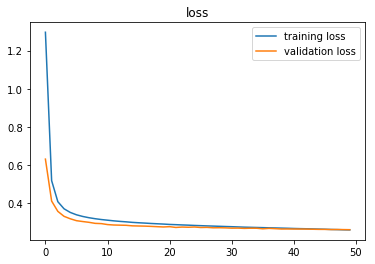

Plotting metrics...


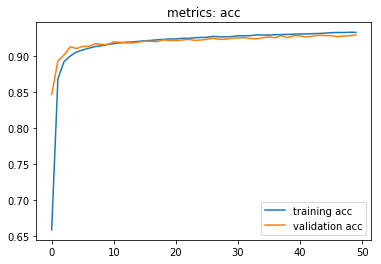

train {'acc': 0.9347818}
test {'acc': 0.9294}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5896187734639187669
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 2214007101774849101
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.307891 , acc = 0.11 
t_cost <class 'dict'> 
train_op : 0.02673499999991691
loss_train : 0.012461999999914042
metric batch : 0.004367999999885797
whole : 0.044106000000056156
display_whole : 0.01728600000001279
Epoch 1 , step 100 , loss= 1.7950921 , acc = 0.6 
t_cost <class 'dict'> 
train_op : 0.0035150000001067383
loss_train : 0.0033690000000206055
metric batch : 0.0009560000000874425
whole : 0.008339000000205488
display_whole : 0.004652999999962049
Epoch 1 , step 20

Epoch 5 , step 300 , loss= 0.3836865 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004219000000148299
loss_train : 0.002279000000044107
metric batch : 0.0010440000000926375
whole : 0.008278999999902226
display_whole : 0.003884999999854699
Epoch 5 , step 400 , loss= 0.33661512 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004423999999971784
loss_train : 0.00543799999991279
metric batch : 0.0010620000000471919
whole : 0.011481000000003405
display_whole : 0.00688399999989997
Epoch 5 , step 500 , loss= 0.5138619 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003635000000031141
loss_train : 0.0020930000000589644
metric batch : 0.0009780000000318978
whole : 0.007041000000072017
display_whole : 0.0033070000001771405
Epoch 5 , step 549 , loss= 0.34232265 val_loss= 0.3908005 , acc = 0.9 val acc = 0.9152 
Epoch 5 finished, loss= 0.4214708 val loss= 0.3908005 ,  acc = 0.9087818 val acc = 0.9152
*
t_cost <class 'dict'> 
train_op : 0.0038100000001577428
loss_train : 0.004038999999920634


Epoch 10 , step 50 , loss= 0.3630985 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0032260000000405853
loss_train : 0.0054179999999632855
metric batch : 0.001119999999900756
whole : 0.010177000000112457
display_whole : 0.00676900000007663
Epoch 10 , step 150 , loss= 0.34328258 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033740000001216686
loss_train : 0.0018640000000686996
metric batch : 0.001142000000072585
whole : 0.006783999999925072
display_whole : 0.003253999999969892
Epoch 10 , step 250 , loss= 0.46026248 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.004337000000077751
loss_train : 0.0024160000000392756
metric batch : 0.0011449999999513238
whole : 0.008456999999907566
display_whole : 0.0040390000001480075
Epoch 10 , step 350 , loss= 0.16508685 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033639999999195425
loss_train : 0.0018270000000484288
metric batch : 0.001017000000047119
whole : 0.006793000000016036
display_whole : 0.0032610000000659056
Epoch 10 , step 4

Epoch 14 , step 549 , loss= 0.5485778 val_loss= 0.35025978 , acc = 0.88 val acc = 0.9246 
Epoch 14 finished, loss= 0.35913095 val loss= 0.35025978 ,  acc = 0.92276365 val acc = 0.9246
*
t_cost <class 'dict'> 
train_op : 0.0038329999999859865
loss_train : 0.0018420000001242443
metric batch : 0.0010839999999916472
loss_val : 0.028508000000101674
metric_val : 0.0210540000000492
whole : 0.05738199999996141
display_whole : 0.05336899999997513
Epoch 15 , step 0 , loss= 0.35554767 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.005092000000104235
loss_train : 0.005690999999842461
metric batch : 0.0011150000000270666
whole : 0.012500999999929263
display_whole : 0.007124999999859938
Epoch 15 , step 100 , loss= 0.27096188 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003439000000071246
loss_train : 0.00342899999986912
metric batch : 0.00102100000003702
whole : 0.00831600000014987
display_whole : 0.0047870000000784785
Epoch 15 , step 200 , loss= 0.37762454 , acc = 0.93 
t_cost <class 'dict'

Epoch 19 , step 300 , loss= 0.3458119 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003275000000030559
loss_train : 0.0053169999998772255
metric batch : 0.0009729999999308347
whole : 0.010199000000056913
display_whole : 0.006761999999980617
Epoch 19 , step 400 , loss= 0.22021243 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0035779999998339918
loss_train : 0.0024040000000695727
metric batch : 0.0010270000000218715
whole : 0.007532000000082917
display_whole : 0.0038010000000667787
Epoch 19 , step 500 , loss= 0.30469117 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003433999999970183
loss_train : 0.0017620000000988512
metric batch : 0.0010219999999208085
whole : 0.006642000000056214
display_whole : 0.0031290000001718
Epoch 19 , step 549 , loss= 0.22821254 val_loss= 0.345471 , acc = 0.94 val acc = 0.9244 
Epoch 19 finished, loss= 0.34602222 val loss= 0.345471 ,  acc = 0.9262 val acc = 0.9244

t_cost <class 'dict'> 
train_op : 0.0035700000000815635
loss_train : 0.00387099999989

Epoch 24 , step 50 , loss= 0.2585597 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033129999999346182
loss_train : 0.0021520000000236905
metric batch : 0.0008169999998699495
whole : 0.00680000000011205
display_whole : 0.0033229999999093707
Epoch 24 , step 150 , loss= 0.3359622 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003384000000096421
loss_train : 0.002124999999978172
metric batch : 0.0009710000001632579
whole : 0.006980000000112341
display_whole : 0.003449999999929787
Epoch 24 , step 250 , loss= 0.35347736 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0033320000000003347
loss_train : 0.0018800000000283035
metric batch : 0.0009300000001530861
whole : 0.006515999999919586
display_whole : 0.0031050000000050204
Epoch 24 , step 350 , loss= 0.22910805 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003163000000085958
loss_train : 0.005832999999938693
metric batch : 0.0010190000000420696
whole : 0.010520000000042273
display_whole : 0.007190000000036889
Epoch 24 , step 45

Epoch 28 , step 549 , loss= 0.2854817 val_loss= 0.34011415 , acc = 0.93 val acc = 0.927 
Epoch 28 finished, loss= 0.32855603 val loss= 0.34011415 ,  acc = 0.92949086 val acc = 0.927

t_cost <class 'dict'> 
train_op : 0.0035809999999401043
loss_train : 0.0026760000000649597
metric batch : 0.0008550000000013824
loss_val : 0.024004999999988286
metric_val : 0.020833999999922526
whole : 0.05295499999988351
display_whole : 0.04924400000004425
Epoch 29 , step 0 , loss= 0.33146176 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0054270000000542495
loss_train : 0.004821999999876425
metric batch : 0.0008730000001833105
whole : 0.0116139999997813
display_whole : 0.006010000000060245
Epoch 29 , step 100 , loss= 0.35615018 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033100000000558794
loss_train : 0.0031860000001415756
metric batch : 0.0009030000001075678
whole : 0.0077880000001187
display_whole : 0.00439900000014859
Epoch 29 , step 200 , loss= 0.40075064 , acc = 0.89 
t_cost <class 'dict'

Epoch 33 , step 300 , loss= 0.29843152 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003539000000046144
loss_train : 0.0020370000002003508
metric batch : 0.0009660000000621949
whole : 0.007176999999956024
display_whole : 0.0035100000000056752
Epoch 33 , step 400 , loss= 0.5153674 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0032469999998738786
loss_train : 0.002275000000054206
metric batch : 0.0010620000000471919
whole : 0.007059000000026572
display_whole : 0.003656000000091808
Epoch 33 , step 500 , loss= 0.50195074 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003176999999823238
loss_train : 0.007058999999799198
metric batch : 0.0008920000000216532
whole : 0.011659999999892534
display_whole : 0.008305999999947744
Epoch 33 , step 549 , loss= 0.27258867 val_loss= 0.33885425 , acc = 0.93 val acc = 0.9252 
Epoch 33 finished, loss= 0.32181662 val loss= 0.33885425 ,  acc = 0.93154544 val acc = 0.9252

t_cost <class 'dict'> 
train_op : 0.003621999999950276
loss_train : 0.0023200

Epoch 38 , step 50 , loss= 0.34625393 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003737999999884778
loss_train : 0.002328999999917869
metric batch : 0.001014999999824795
whole : 0.0075459999998201965
display_whole : 0.0037149999998291605
Epoch 38 , step 150 , loss= 0.2962805 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0032009999999900174
loss_train : 0.002435000000104992
metric batch : 0.0008940000000166037
whole : 0.006934000000001106
display_whole : 0.003648000000112006
Epoch 38 , step 250 , loss= 0.1801455 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0035370000000511936
loss_train : 0.002099000000043816
metric batch : 0.0008960000000115542
whole : 0.006957999999940512
display_whole : 0.0033399999999801366
Epoch 38 , step 350 , loss= 0.40949154 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.00341300000013689
loss_train : 0.016301999999996042
metric batch : 0.0009979999999814027
whole : 0.021222999999963577
display_whole : 0.017610999999988053
Epoch 38 , step 450 ,

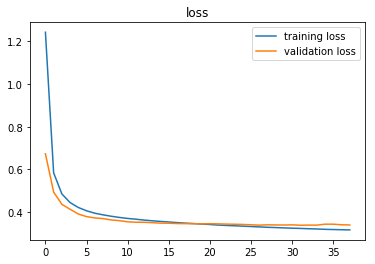

Plotting metrics...


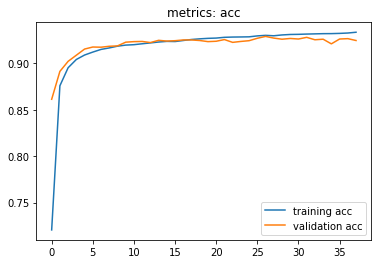

train {'acc': 0.9330364}
test {'acc': 0.9253}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5652107832967436848
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 10495096261716948953
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3042648 , acc = 0.05 
t_cost <class 'dict'> 
train_op : 0.02732800000012503
loss_train : 0.015055999999958658
metric batch : 0.0055219999999280844
whole : 0.0482360000000881
display_whole : 0.020828999999821463
Epoch 1 , step 100 , loss= 1.6785729 , acc = 0.64 
t_cost <class 'dict'> 
train_op : 0.0032889999999952124
loss_train : 0.006550000000061118
metric batch : 0.0009830000001329608
whole : 0.011316999999962718
display_whole : 0.007882999999992535
Epoch 1 , step 20

Epoch 5 , step 300 , loss= 0.67733496 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0035949999999047577
loss_train : 0.0028539999998429266
metric batch : 0.0010780000000067957
whole : 0.007914999999911743
display_whole : 0.004153999999971347
Epoch 5 , step 400 , loss= 0.25812155 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.004294999999956417
loss_train : 0.00733700000000681
metric batch : 0.0009990000000925647
whole : 0.013187999999900057
display_whole : 0.008713000000170723
Epoch 5 , step 500 , loss= 0.48239687 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003271000000040658
loss_train : 0.006231000000070708
metric batch : 0.0010819999999966967
whole : 0.011048999999957232
display_whole : 0.007612999999992098
Epoch 5 , step 549 , loss= 0.3121878 val_loss= 0.42253235 , acc = 0.94 val acc = 0.9188 
Epoch 5 finished, loss= 0.441338 val loss= 0.42253235 ,  acc = 0.9093636 val acc = 0.9188
*
t_cost <class 'dict'> 
train_op : 0.0034180000000105792
loss_train : 0.005198000000063

Epoch 10 , step 50 , loss= 0.39656928 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003944999999930587
loss_train : 0.004740999999967244
metric batch : 0.001040999999986525
whole : 0.01026200000001154
display_whole : 0.006124999999883585
Epoch 10 , step 150 , loss= 0.25952262 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003518000000212851
loss_train : 0.014041000000133863
metric batch : 0.0010270000000218715
whole : 0.019130000000131986
display_whole : 0.015454000000090673
Epoch 10 , step 250 , loss= 0.35939616 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0036370000000260916
loss_train : 0.0018720000000485015
metric batch : 0.001242000000047483
whole : 0.007080999999971027
display_whole : 0.003271000000040658
Epoch 10 , step 350 , loss= 0.38690025 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003371000000015556
loss_train : 0.014895999999907872
metric batch : 0.0009950000001026638
whole : 0.01979099999994105
display_whole : 0.016262000000097032
Epoch 10 , step 450 , l

Epoch 14 , step 549 , loss= 0.37200892 val_loss= 0.3780473 , acc = 0.9 val acc = 0.924 
Epoch 14 finished, loss= 0.37973174 val loss= 0.3780473 ,  acc = 0.9234 val acc = 0.924
*
t_cost <class 'dict'> 
train_op : 0.003719000000046435
loss_train : 0.007558000000017273
metric batch : 0.0012219999998706044
loss_val : 0.030001999999967666
metric_val : 0.02109799999993811
whole : 0.06468600000016522
display_whole : 0.06088999999997213
Epoch 15 , step 0 , loss= 0.40120167 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.007375999999794658
loss_train : 0.005603999999948428
metric batch : 0.0012460000000373839
whole : 0.014723000000003594
display_whole : 0.007147000000031767
Epoch 15 , step 100 , loss= 0.17658895 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0038950000000568252
loss_train : 0.0024399999999786814
metric batch : 0.0010609999999360298
whole : 0.007802000000083353
display_whole : 0.0037649999999302963
Epoch 15 , step 200 , loss= 0.47266114 , acc = 0.9 
t_cost <class 'dict'> 
t

Epoch 19 , step 300 , loss= 0.30052322 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003629999999930078
loss_train : 0.0020959999999377033
metric batch : 0.001033000000006723
whole : 0.007246000000122876
display_whole : 0.003429999999980282
Epoch 19 , step 400 , loss= 0.31640905 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0032309999999142747
loss_train : 0.00609800000006544
metric batch : 0.0010950000000775617
whole : 0.010939000000007582
display_whole : 0.007538999999951557
Epoch 19 , step 500 , loss= 0.24777946 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00363100000004124
loss_train : 0.001996000000190179
metric batch : 0.0008729999999559368
whole : 0.00698299999999108
display_whole : 0.0031639999999697466
Epoch 19 , step 549 , loss= 0.6111423 val_loss= 0.3721449 , acc = 0.89 val acc = 0.9252 
Epoch 19 finished, loss= 0.36537775 val loss= 0.3721449 ,  acc = 0.9265818 val acc = 0.9252

t_cost <class 'dict'> 
train_op : 0.003792999999859603
loss_train : 0.00462300000003

Epoch 24 , step 50 , loss= 0.3364833 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0037519999998494313
loss_train : 0.010216000000127679
metric batch : 0.001103999999941152
whole : 0.015609000000040396
display_whole : 0.01167000000009466
Epoch 24 , step 150 , loss= 0.3069509 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00451599999996688
loss_train : 0.003253999999969892
metric batch : 0.0010030000000824657
whole : 0.009199999999964348
display_whole : 0.004583000000138782
Epoch 24 , step 250 , loss= 0.6050294 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0034589999997933774
loss_train : 0.0026899999998022395
metric batch : 0.0009190000000671716
whole : 0.0075679999999920256
display_whole : 0.003917000000001281
Epoch 24 , step 350 , loss= 0.30028152 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0036950000001070293
loss_train : 0.0039300000000821456
metric batch : 0.0011110000000371656
whole : 0.009563000000071042
display_whole : 0.005787000000054832
Epoch 24 , step 450 ,

Epoch 28 , step 549 , loss= 0.27766448 val_loss= 0.36242425 , acc = 0.93 val acc = 0.9314 
Epoch 28 finished, loss= 0.3467526 val loss= 0.36242425 ,  acc = 0.93054545 val acc = 0.9314
*
t_cost <class 'dict'> 
train_op : 0.003201999999873806
loss_train : 0.002749000000221713
metric batch : 0.000931999999920663
loss_val : 0.024218999999902735
metric_val : 0.021252000000004045
whole : 0.053593999999975495
display_whole : 0.05020100000001548
Epoch 29 , step 0 , loss= 0.25608787 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.008394999999836728
loss_train : 0.003917000000001281
metric batch : 0.0009260000001631852
whole : 0.013749000000188971
display_whole : 0.005142999999861786
Epoch 29 , step 100 , loss= 0.3071394 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034450000002834713
loss_train : 0.004973999999947409
metric batch : 0.0010689999999158317
whole : 0.009888999999930093
display_whole : 0.006368999999722291
Epoch 29 , step 200 , loss= 0.25548583 , acc = 0.96 
t_cost <class 'di

Epoch 33 , step 300 , loss= 0.38054729 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004210999999941123
loss_train : 0.004926000000068598
metric batch : 0.0010740000002442684
whole : 0.010937000000012631
display_whole : 0.006581000000096537
Epoch 33 , step 400 , loss= 0.22289053 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0035889999999199063
loss_train : 0.0075839999999516294
metric batch : 0.0009380000001328881
whole : 0.012597000000369007
display_whole : 0.00884600000017599
Epoch 33 , step 500 , loss= 0.2591567 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0039329999999608845
loss_train : 0.005024999999932334
metric batch : 0.0011160000003656023
whole : 0.010557000000062544
display_whole : 0.006452000000081171
Epoch 33 , step 549 , loss= 0.33218008 val_loss= 0.35801828 , acc = 0.91 val acc = 0.9292 
Epoch 33 finished, loss= 0.33906618 val loss= 0.35801828 ,  acc = 0.9323636 val acc = 0.9292

t_cost <class 'dict'> 
train_op : 0.0038779999999860593
loss_train : 0.00242200

Epoch 38 , step 50 , loss= 0.25245458 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003461000000243075
loss_train : 0.013238000000001193
metric batch : 0.0011309999999866704
whole : 0.018387999999958993
display_whole : 0.014760000000023865
Epoch 38 , step 150 , loss= 0.25263017 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0034509999995862017
loss_train : 0.00181399999974019
metric batch : 0.0010229999998045969
whole : 0.00677399999995032
display_whole : 0.0031589999998686835
Epoch 38 , step 250 , loss= 0.22922754 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0037990000000718283
loss_train : 0.005039000000124361
metric batch : 0.0011329999997542473
whole : 0.010353000000122847
display_whole : 0.006480000000010477
Epoch 38 , step 350 , loss= 0.2551714 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003495000000384607
loss_train : 0.0035100000000056752
metric batch : 0.0009509999999863794
whole : 0.008440999999947962
display_whole : 0.0047700000000077125
Epoch 38 , step 450

Epoch 42 , step 549 , loss= 0.3437485 val_loss= 0.36012518 , acc = 0.95 val acc = 0.9262 
Epoch 42 finished, loss= 0.32681012 val loss= 0.36012518 ,  acc = 0.9350728 val acc = 0.9262

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with temperature = 4 , coef_softloss = 0.5 ,tmp_effi = 1 . 
Plotting loss...


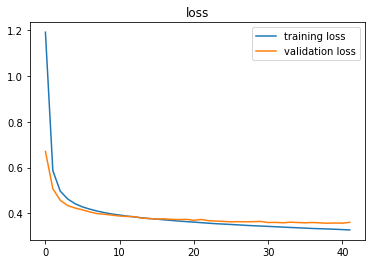

Plotting metrics...


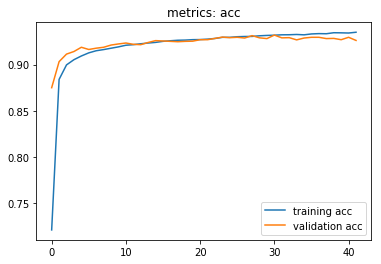

train {'acc': 0.93576366}
test {'acc': 0.9249}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 107518943135625250
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 2102547544385615448
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2864685 , acc = 0.17 
t_cost <class 'dict'> 
train_op : 0.026965000000018335
loss_train : 0.01396999999997206
metric batch : 0.004989000000023225
whole : 0.04624499999999898
display_whole : 0.01919499999985419
Epoch 1 , step 100 , loss= 1.5155551 , acc = 0.65 
t_cost <class 'dict'> 
train_op : 0.004053999999996449
loss_train : 0.0022330000001602457
metric batch : 0.0011269999999967695
whole : 0.007904000000053202
display_whole : 0.0036949999998796557
Epoch 1 , step 2

Epoch 5 , step 300 , loss= 0.30880725 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003881000000092172
loss_train : 0.0076730000000679865
metric batch : 0.001119999999900756
whole : 0.01313399999980902
display_whole : 0.00915400000030786
Epoch 5 , step 400 , loss= 0.41809046 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0035370000000511936
loss_train : 0.006296999999904074
metric batch : 0.0011330000002089946
whole : 0.011449000000084197
display_whole : 0.0077519999999822176
Epoch 5 , step 500 , loss= 0.32856604 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0035000000002582965
loss_train : 0.005351000000246131
metric batch : 0.001006999999844993
whole : 0.010390999999799533
display_whole : 0.006730000000061409
Epoch 5 , step 549 , loss= 0.37395585 val_loss= 0.39374456 , acc = 0.91 val acc = 0.9172 
Epoch 5 finished, loss= 0.4172301 val loss= 0.39374456 ,  acc = 0.90965456 val acc = 0.9172
*
t_cost <class 'dict'> 
train_op : 0.0034090000003743626
loss_train : 0.002206999999998

Epoch 10 , step 50 , loss= 0.353452 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003208000000086031
loss_train : 0.009436000000278
metric batch : 0.0011760000002141169
whole : 0.014377999999851454
display_whole : 0.010944999999992433
Epoch 10 , step 150 , loss= 0.36512488 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.005902000000332919
loss_train : 0.01210399999990841
metric batch : 0.0024200000002565503
whole : 0.020895999999993364
display_whole : 0.01488599999993312
Epoch 10 , step 250 , loss= 0.23904297 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.00405799999998635
loss_train : 0.0031780000003891473
metric batch : 0.0012689999998656276
whole : 0.008976000000075146
display_whole : 0.004833000000417087
Epoch 10 , step 350 , loss= 0.41138527 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0038989999998193525
loss_train : 0.004852000000028056
metric batch : 0.0010299999999006104
whole : 0.010270000000218715
display_whole : 0.006265999999868654
Epoch 10 , step 450 , loss=

Epoch 14 , step 549 , loss= 0.43373364 val_loss= 0.36233568 , acc = 0.94 val acc = 0.9254 
Epoch 14 finished, loss= 0.36480027 val loss= 0.36233568 ,  acc = 0.9237273 val acc = 0.9254

t_cost <class 'dict'> 
train_op : 0.003311999999823456
loss_train : 0.0021339999998417625
metric batch : 0.0009850000001279113
loss_val : 0.029941000000235363
metric_val : 0.021118999999998778
whole : 0.05888700000014069
display_whole : 0.05538499999966007
Epoch 15 , step 0 , loss= 0.3175608 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.008210999999846536
loss_train : 0.004233000000112952
metric batch : 0.0011389999999664724
whole : 0.014221999999790569
display_whole : 0.005701000000044587
Epoch 15 , step 100 , loss= 0.52554727 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004440000000158761
loss_train : 0.004438999999820226
metric batch : 0.004018000000087341
whole : 0.013418000000001484
display_whole : 0.008800000000064756
Epoch 15 , step 200 , loss= 0.30180568 , acc = 0.94 
t_cost <class 'dict

Epoch 19 , step 300 , loss= 0.36927274 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004370000000108121
loss_train : 0.002043999999841617
metric batch : 0.0010989999996127153
whole : 0.007919000000129017
display_whole : 0.0034660000001167646
Epoch 19 , step 400 , loss= 0.41635436 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003434000000197557
loss_train : 0.002038000000084139
metric batch : 0.0009700000000520959
whole : 0.006973999999900116
display_whole : 0.0033990000001722365
Epoch 19 , step 500 , loss= 0.28278106 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007538000000295142
loss_train : 0.017854000000170345
metric batch : 0.0016570000002502638
whole : 0.027370000000246364
display_whole : 0.0197440000001734
Epoch 19 , step 549 , loss= 0.26385635 val_loss= 0.35665882 , acc = 0.93 val acc = 0.9248 
Epoch 19 finished, loss= 0.3522281 val loss= 0.35665882 ,  acc = 0.9264364 val acc = 0.9248

t_cost <class 'dict'> 
train_op : 0.0032439999999951397
loss_train : 0.0018300000

Epoch 24 , step 50 , loss= 0.4678133 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.005249999999705324
loss_train : 0.0057629999996606784
metric batch : 0.0013810000000376021
whole : 0.012906999999813706
display_whole : 0.007550999999693886
Epoch 24 , step 150 , loss= 0.281567 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004975000000285945
loss_train : 0.017499000000043452
metric batch : 0.0011009999998350395
whole : 0.024477999999817257
display_whole : 0.019390999999814085
Epoch 24 , step 250 , loss= 0.28679484 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004280000000107975
loss_train : 0.002213000000210741
metric batch : 0.001134000000092783
whole : 0.00818200000003344
display_whole : 0.0036949999998796557
Epoch 24 , step 350 , loss= 0.42949724 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0037120000001777953
loss_train : 0.0022599999997510167
metric batch : 0.001033000000006723
whole : 0.00744299999996656
display_whole : 0.0036059999997632985
Epoch 24 , step 450 , l

Epoch 28 , step 549 , loss= 0.40218702 val_loss= 0.352274 , acc = 0.92 val acc = 0.9268 
Epoch 28 finished, loss= 0.33537033 val loss= 0.352274 ,  acc = 0.9297636 val acc = 0.9268
*
t_cost <class 'dict'> 
train_op : 0.008000000000265572
loss_train : 0.006932000000233529
metric batch : 0.0024910000001909793
loss_val : 0.03306099999963408
metric_val : 0.0223150000001624
whole : 0.07391199999983655
display_whole : 0.06578600000011647
Epoch 29 , step 0 , loss= 0.34235358 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.009158000000297761
loss_train : 0.0045559999998658895
metric batch : 0.0020919999997204286
whole : 0.01650999999992564
display_whole : 0.006986999999753607
Epoch 29 , step 100 , loss= 0.24681936 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004076000000168278
loss_train : 0.002369999999700667
metric batch : 0.0012379999998302083
whole : 0.008190000000013242
display_whole : 0.0039029999998092535
Epoch 29 , step 200 , loss= 0.2799686 , acc = 0.92 
t_cost <class 'dict'> 
t

Epoch 33 , step 300 , loss= 0.3600088 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0043759999998655985
loss_train : 0.03174200000012206
metric batch : 0.003753999999844382
whole : 0.040283999999701336
display_whole : 0.03582700000015393
Epoch 33 , step 400 , loss= 0.21381183 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.006202999999914027
loss_train : 0.009450999999899068
metric batch : 0.0032740000001467706
whole : 0.019253999999818916
display_whole : 0.012970999999652122
Epoch 33 , step 500 , loss= 0.25981727 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004557000000204425
loss_train : 0.0024730000000090513
metric batch : 0.002985999999964406
whole : 0.010433999999804655
display_whole : 0.005763000000115426
Epoch 33 , step 549 , loss= 0.5089282 val_loss= 0.34811246 , acc = 0.87 val acc = 0.9258 
Epoch 33 finished, loss= 0.327455 val loss= 0.34811246 ,  acc = 0.9316727 val acc = 0.9258

t_cost <class 'dict'> 
train_op : 0.0036300000001574517
loss_train : 0.006390999999894

Epoch 38 , step 50 , loss= 0.35690802 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.008010000000012951
loss_train : 0.017327000000022963
metric batch : 0.003113000000212196
whole : 0.028866999999991094
display_whole : 0.020727999999962776
Epoch 38 , step 150 , loss= 0.29789287 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.005590999999640189
loss_train : 0.01845000000002983
metric batch : 0.002476000000115164
whole : 0.02710399999978108
display_whole : 0.02133400000002439
Epoch 38 , step 250 , loss= 0.23388097 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0038909999998395506
loss_train : 0.002098999999816442
metric batch : 0.0010120000001734297
whole : 0.0074629999999160646
display_whole : 0.003469999999651918
Epoch 38 , step 350 , loss= 0.4073107 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0034150000001318404
loss_train : 0.002414000000044325
metric batch : 0.0011519999998199637
whole : 0.0074789999998756684
display_whole : 0.0039779999997335835
Epoch 38 , step 450 , 

Epoch 42 , step 549 , loss= 0.26758978 val_loss= 0.34336752 , acc = 0.94 val acc = 0.9256 
Epoch 42 finished, loss= 0.31487018 val loss= 0.34336752 ,  acc = 0.9340545 val acc = 0.9256

t_cost <class 'dict'> 
train_op : 0.007067000000006374
loss_train : 0.010009000000081869
metric batch : 0.0018930000001091685
loss_val : 0.03407500000002983
metric_val : 0.025486000000000786
whole : 0.08026299999983166
display_whole : 0.07308999999986554
Epoch 43 , step 0 , loss= 0.25723517 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.011815999999726046
loss_train : 0.013257999999950698
metric batch : 0.0037779999997837876
whole : 0.02944999999999709
display_whole : 0.017346999999972468
Epoch 43 , step 100 , loss= 0.33915687 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003576000000066415
loss_train : 0.001821999999719992
metric batch : 0.0009890000001178123
whole : 0.006894000000102096
display_whole : 0.003218999999717198
Epoch 43 , step 200 , loss= 0.28332126 , acc = 0.92 
t_cost <class 'dict'

Epoch 47 , step 300 , loss= 0.18415289 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003557999999884487
loss_train : 0.0022669999998470303
metric batch : 0.0011730000001080043
whole : 0.007649999999557622
display_whole : 0.0039010000000416767
Epoch 47 , step 400 , loss= 0.48677397 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0040640000001985754
loss_train : 0.003627000000051339
metric batch : 0.001067000000148255
whole : 0.009268000000247412
display_whole : 0.005024999999932334
Epoch 47 , step 500 , loss= 0.27496755 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0041089999999712745
loss_train : 0.0022200000003067544
metric batch : 0.0010870000000977598
whole : 0.007858999999825755
display_whole : 0.003649000000223168
Epoch 47 , step 549 , loss= 0.31133127 val_loss= 0.34059498 , acc = 0.93 val acc = 0.9286 
Epoch 47 finished, loss= 0.30780286 val loss= 0.34059498 ,  acc = 0.93478185 val acc = 0.9286
*
t_cost <class 'dict'> 
train_op : 0.0035410000000410946
loss_train : 0.012

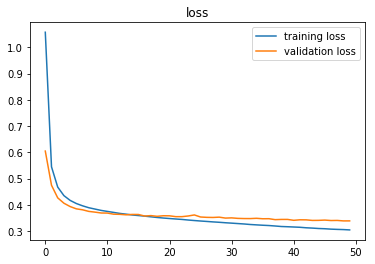

Plotting metrics...


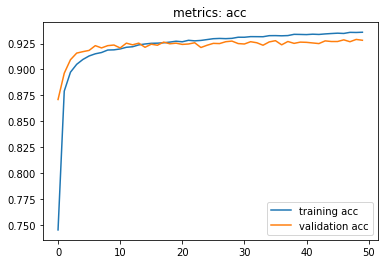

train {'acc': 0.9366}
test {'acc': 0.9272}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3429578352659615246
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 17631783253539134242
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.305596 , acc = 0.07 
t_cost <class 'dict'> 
train_op : 0.028531999999813706
loss_train : 0.018105000000105065
metric batch : 0.005597999999736203
whole : 0.05261399999972127
display_whole : 0.02397300000029645
Epoch 1 , step 100 , loss= 1.5783374 , acc = 0.44 
t_cost <class 'dict'> 
train_op : 0.0036780000000362634
loss_train : 0.0025860000000648142
metric batch : 0.0011269999999967695
whole : 0.007888999999977386
display_whole : 0.004031000000395579
Epoch 1 , step 200 ,

Epoch 5 , step 300 , loss= 0.15540439 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003220000000055734
loss_train : 0.0021459999998114654
metric batch : 0.0010839999999916472
whole : 0.006977000000006228
display_whole : 0.0035629999997581763
Epoch 5 , step 400 , loss= 0.2480597 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0037850000003345485
loss_train : 0.0031949999997777923
metric batch : 0.001010999999834894
whole : 0.008608000000094762
display_whole : 0.0046389999997700215
Epoch 5 , step 500 , loss= 0.44044805 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0037910000000920263
loss_train : 0.002100000000154978
metric batch : 0.0010509999997339037
whole : 0.007413999999698717
display_whole : 0.0034580000001369626
Epoch 5 , step 549 , loss= 0.22627498 val_loss= 0.2909873 , acc = 0.92 val acc = 0.9176 
Epoch 5 finished, loss= 0.30454314 val loss= 0.2909873 ,  acc = 0.91461813 val acc = 0.9176
*
t_cost <class 'dict'> 
train_op : 0.004163000000062311
loss_train : 0.0022859999

Epoch 10 , step 50 , loss= 0.45267147 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004066999999849941
loss_train : 0.006373999999595981
metric batch : 0.0011810000000878063
whole : 0.012267999999949097
display_whole : 0.008003999999800726
Epoch 10 , step 150 , loss= 0.25975543 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0034160000000156288
loss_train : 0.0024009999997360865
metric batch : 0.0011730000001080043
whole : 0.007368999999926018
display_whole : 0.0038689999996677216
Epoch 10 , step 250 , loss= 0.28040576 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0035330000000612927
loss_train : 0.005831999999827531
metric batch : 0.0010520000000724394
whole : 0.011031000000002678
display_whole : 0.0072609999997439445
Epoch 10 , step 350 , loss= 0.25997573 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004252000000178668
loss_train : 0.003036000000065542
metric batch : 0.0010769999998956337
whole : 0.008757999999943422
display_whole : 0.0043980000000374275
Epoch 10 , step

Epoch 14 , step 549 , loss= 0.31355622 val_loss= 0.27113402 , acc = 0.89 val acc = 0.9238 
Epoch 14 finished, loss= 0.26248807 val loss= 0.27113402 ,  acc = 0.9267454 val acc = 0.9238

t_cost <class 'dict'> 
train_op : 0.0036340000001473527
loss_train : 0.002197999999680178
metric batch : 0.0010879999999815482
loss_val : 0.04234700000006342
metric_val : 0.019737999999961175
whole : 0.06995699999970384
display_whole : 0.06622599999991508
Epoch 15 , step 0 , loss= 0.40803063 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.008070999999745254
loss_train : 0.002300999999988562
metric batch : 0.0011540000000422879
whole : 0.01212500000019645
display_whole : 0.0037350000002334127
Epoch 15 , step 100 , loss= 0.19107322 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034679999998843414
loss_train : 0.009864000000106898
metric batch : 0.0012199999996482802
whole : 0.015156999999817344
display_whole : 0.011506000000281347
Epoch 15 , step 200 , loss= 0.30632886 , acc = 0.89 
t_cost <class 'di

Epoch 19 , step 300 , loss= 0.3463407 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0036949999998796557
loss_train : 0.0022850000000289583
metric batch : 0.0010659999998097192
whole : 0.0075130000000172
display_whole : 0.003728000000137399
Epoch 19 , step 400 , loss= 0.30095315 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035530000000107975
loss_train : 0.0020409999997355044
metric batch : 0.0009430000000065775
whole : 0.007036999999854743
display_whole : 0.003306999999949767
Epoch 19 , step 500 , loss= 0.23113011 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0035250000000814907
loss_train : 0.00669099999959144
metric batch : 0.001029000000016822
whole : 0.011689999999816791
display_whole : 0.008073999999851367
Epoch 19 , step 549 , loss= 0.29335222 val_loss= 0.26001754 , acc = 0.92 val acc = 0.9302 
Epoch 19 finished, loss= 0.25030395 val loss= 0.26001754 ,  acc = 0.92989093 val acc = 0.9302
*
t_cost <class 'dict'> 
train_op : 0.0033309999998891726
loss_train : 0.0094049

Epoch 24 , step 50 , loss= 0.2156018 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004585000000133732
loss_train : 0.002298999999766238
metric batch : 0.0009950000003300374
whole : 0.008478000000195607
display_whole : 0.0036609999997381237
Epoch 24 , step 150 , loss= 0.37034103 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0033360000002176093
loss_train : 0.004947999999785679
metric batch : 0.0012649999998757266
whole : 0.010119999999915308
display_whole : 0.006604999999581196
Epoch 24 , step 250 , loss= 0.28746533 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0030859999997119303
loss_train : 0.001904000000195083
metric batch : 0.0009400000003552123
whole : 0.006391000000348868
display_whole : 0.0031560000002173183
Epoch 24 , step 350 , loss= 0.24697359 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.007121999999981199
loss_train : 0.0023320000000239816
metric batch : 0.0023040000000946748
whole : 0.012131999999837717
display_whole : 0.004922999999962485
Epoch 24 , step 45

Epoch 28 , step 549 , loss= 0.21048221 val_loss= 0.25556225 , acc = 0.89 val acc = 0.9322 
Epoch 28 finished, loss= 0.23395799 val loss= 0.25556225 ,  acc = 0.9341636 val acc = 0.9322

t_cost <class 'dict'> 
train_op : 0.004333999999744265
loss_train : 0.0068139999998493295
metric batch : 0.0012600000000020373
loss_val : 0.03451100000029328
metric_val : 0.02109199999995326
whole : 0.06958199999962744
display_whole : 0.06511600000021645
Epoch 29 , step 0 , loss= 0.26902857 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.005723000000216416
loss_train : 0.003298999999969965
metric batch : 0.0023869999999988067
whole : 0.012088999999832595
display_whole : 0.00600399999984802
Epoch 29 , step 100 , loss= 0.162278 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007757999999739695
loss_train : 0.016922000000249682
metric batch : 0.0033530000000610016
whole : 0.028629999999793654
display_whole : 0.020762000000104308
Epoch 29 , step 200 , loss= 0.18772243 , acc = 0.96 
t_cost <class 'dict'> 

Epoch 33 , step 300 , loss= 0.15187715 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.004433999999946536
loss_train : 0.0036889999996674305
metric batch : 0.002992000000176631
whole : 0.011492999999973108
display_whole : 0.0069719999996777915
Epoch 33 , step 400 , loss= 0.3528727 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004644000000098458
loss_train : 0.02275599999984479
metric batch : 0.0018979999999828578
whole : 0.029858999999760272
display_whole : 0.024997999999868625
Epoch 33 , step 500 , loss= 0.22306709 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.007001000000400381
loss_train : 0.02296200000000681
metric batch : 0.002147000000150001
whole : 0.03257399999984045
display_whole : 0.025482000000010885
Epoch 33 , step 549 , loss= 0.19184732 val_loss= 0.2496354 , acc = 0.94 val acc = 0.9332 
Epoch 33 finished, loss= 0.22773992 val loss= 0.2496354 ,  acc = 0.93545455 val acc = 0.9332
*
t_cost <class 'dict'> 
train_op : 0.006620999999995547
loss_train : 0.00619300000016

Epoch 38 , step 50 , loss= 0.26930776 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.006590999999843916
loss_train : 0.006556000000273343
metric batch : 0.0037959999999657157
whole : 0.017633999999816297
display_whole : 0.010925999999926717
Epoch 38 , step 150 , loss= 0.19780046 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007865999999921769
loss_train : 0.0070989999999255815
metric batch : 0.0012589999996635015
whole : 0.01670399999966321
display_whole : 0.008730999999897904
Epoch 38 , step 250 , loss= 0.12189333 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036519999998745334
loss_train : 0.006381999999575783
metric batch : 0.0016740000000936561
whole : 0.012123000000428874
display_whole : 0.0083809999996447
Epoch 38 , step 350 , loss= 0.34857965 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003574999999727879
loss_train : 0.0018209999998362036
metric batch : 0.0009739999995872495
whole : 0.00683500000013737
display_whole : 0.003092999999807944
Epoch 38 , step 450 , l

Epoch 42 , step 549 , loss= 0.2531456 val_loss= 0.24985337 , acc = 0.94 val acc = 0.931 
Epoch 42 finished, loss= 0.21793757 val loss= 0.24985337 ,  acc = 0.9384728 val acc = 0.931

t_cost <class 'dict'> 
train_op : 0.005345000000033906
loss_train : 0.016145999999935157
metric batch : 0.0033910000001924345
loss_val : 0.027110999999877095
metric_val : 0.021917000000030384
whole : 0.07491200000004028
display_whole : 0.0694839999996475
Epoch 43 , step 0 , loss= 0.08811695 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.009555999999975029
loss_train : 0.029224999999769352
metric batch : 0.0013429999999061693
whole : 0.04068199999983335
display_whole : 0.030807000000095286
Epoch 43 , step 100 , loss= 0.27397317 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003497000000152184
loss_train : 0.00220900000022084
metric batch : 0.001107999999931053
whole : 0.007297999999991589
display_whole : 0.003707000000304106
Epoch 43 , step 200 , loss= 0.28550303 , acc = 0.93 
t_cost <class 'dict'> 
tr

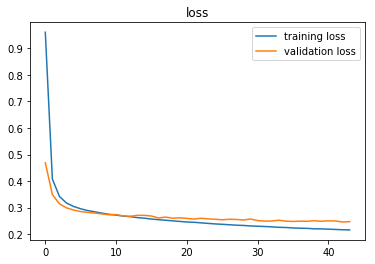

Plotting metrics...


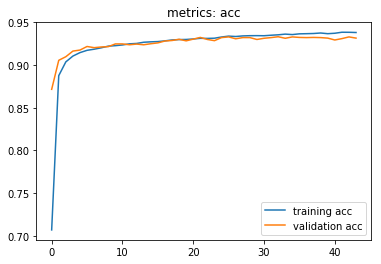

train {'acc': 0.9387636}
test {'acc': 0.931}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6269967753101933362
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 11696294589811435687
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3020077 , acc = 0.06 
t_cost <class 'dict'> 
train_op : 0.027981999999610707
loss_train : 0.026209000000108063
metric batch : 0.004824000000098749
whole : 0.059381000000030326
display_whole : 0.031313999999838416
Epoch 1 , step 100 , loss= 2.1306777 , acc = 0.51 
t_cost <class 'dict'> 
train_op : 0.005585000000337459
loss_train : 0.00488199999972494
metric batch : 0.003372000000126718
whole : 0.014176000000134081
display_whole : 0.008492999999816675
Epoch 1 , step 200 

Epoch 5 , step 300 , loss= 0.4668111 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003486999999950058
loss_train : 0.011145999999826017
metric batch : 0.002531000000089989
whole : 0.0176010000000133
display_whole : 0.013924999999744614
Epoch 5 , step 400 , loss= 0.6620525 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.005838000000039756
loss_train : 0.01241600000003018
metric batch : 0.0018239999999423162
whole : 0.020429000000149244
display_whole : 0.014510999999856722
Epoch 5 , step 500 , loss= 0.5131263 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0038960000001679873
loss_train : 0.0035360000001674052
metric batch : 0.0011479999998300627
whole : 0.009015000000090367
display_whole : 0.004922000000078697
Epoch 5 , step 549 , loss= 0.61444044 val_loss= 0.5093667 , acc = 0.89 val acc = 0.906 
Epoch 5 finished, loss= 0.5469583 val loss= 0.5093667 ,  acc = 0.89638186 val acc = 0.906
*
t_cost <class 'dict'> 
train_op : 0.0033109999999396678
loss_train : 0.002348999999867374
met

Epoch 10 , step 50 , loss= 0.48945117 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033910000001924345
loss_train : 0.00643099999979313
metric batch : 0.0011069999995925173
whole : 0.011308999999982916
display_whole : 0.007822000000032858
Epoch 10 , step 150 , loss= 0.45153368 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035809999999401043
loss_train : 0.007004000000051747
metric batch : 0.0011330000002089946
whole : 0.01220100000000457
display_whole : 0.008445999999821652
Epoch 10 , step 250 , loss= 0.41519114 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0033120000002782035
loss_train : 0.0018380000001343433
metric batch : 0.0009559999998600688
whole : 0.006574999999884312
display_whole : 0.0030940000001464796
Epoch 10 , step 350 , loss= 0.3714649 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0033490000000711007
loss_train : 0.0017320000001745939
metric batch : 0.001025000000026921
whole : 0.006567999999788299
display_whole : 0.003048999999919033
Epoch 10 , step 45

Epoch 14 , step 549 , loss= 0.517431 val_loss= 0.46809906 , acc = 0.9 val acc = 0.9176 
Epoch 14 finished, loss= 0.49484673 val loss= 0.46809906 ,  acc = 0.9116363 val acc = 0.9176
*
t_cost <class 'dict'> 
train_op : 0.004302000000279804
loss_train : 0.0017719999996188562
metric batch : 0.0009939999999915017
loss_val : 0.02337600000009843
metric_val : 0.021225999999842315
whole : 0.05266399999982241
display_whole : 0.0482849999998507
Epoch 15 , step 0 , loss= 0.5041447 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.005537999999887688
loss_train : 0.003815000000031432
metric batch : 0.0018469999999979336
whole : 0.011816000000180793
display_whole : 0.0059160000000701984
Epoch 15 , step 100 , loss= 0.5040304 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004554999999982101
loss_train : 0.0020979999999326537
metric batch : 0.001036999999996624
whole : 0.008143000000018219
display_whole : 0.0034339999997428095
Epoch 15 , step 200 , loss= 0.5925841 , acc = 0.9 
t_cost <class 'dict'> 


Epoch 19 , step 300 , loss= 0.4827475 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0034310000000914442
loss_train : 0.0037879999999859137
metric batch : 0.0011200000003555033
whole : 0.00877200000013545
display_whole : 0.0051980000002913584
Epoch 19 , step 400 , loss= 0.51872504 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0034980000000359723
loss_train : 0.012498000000050524
metric batch : 0.001119999999900756
whole : 0.017573000000083994
display_whole : 0.0139179999996486
Epoch 19 , step 500 , loss= 0.5590663 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0035380000003897294
loss_train : 0.002080999999634514
metric batch : 0.001002999999855092
whole : 0.0071390000002793386
display_whole : 0.003385999999863998
Epoch 19 , step 549 , loss= 0.49008018 val_loss= 0.46208578 , acc = 0.93 val acc = 0.9204 
Epoch 19 finished, loss= 0.4862874 val loss= 0.46208578 ,  acc = 0.9149636 val acc = 0.9204
*
t_cost <class 'dict'> 
train_op : 0.004147000000102707
loss_train : 0.00224500000

Epoch 24 , step 50 , loss= 0.47765565 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003610000000207947
loss_train : 0.0018490000002202578
metric batch : 0.0010580000002846646
whole : 0.006959999999708089
display_whole : 0.0032049999999799184
Epoch 24 , step 150 , loss= 0.6317311 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003289999999651627
loss_train : 0.0017820000002757297
metric batch : 0.00091999999995096
whole : 0.006378999999924417
display_whole : 0.003016000000116037
Epoch 24 , step 250 , loss= 0.5101623 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.0032339999997930136
loss_train : 0.001952999999957683
metric batch : 0.0009359999999105639
whole : 0.006598000000394677
display_whole : 0.0031930000000102154
Epoch 24 , step 350 , loss= 0.5608325 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0039010000000416767
loss_train : 0.005109000000175001
metric batch : 0.0013010000002395827
whole : 0.010657999999693857
display_whole : 0.006681000000298809
Epoch 24 , step 450 ,

Epoch 28 , step 549 , loss= 0.5499569 val_loss= 0.458957 , acc = 0.9 val acc = 0.9214 
Epoch 28 finished, loss= 0.4761306 val loss= 0.458957 ,  acc = 0.9187636 val acc = 0.9214

t_cost <class 'dict'> 
train_op : 0.003608999999869411
loss_train : 0.0018310000000383297
metric batch : 0.00087100000018836
loss_val : 0.024455000000216387
metric_val : 0.01972799999975905
whole : 0.051665999999841006
display_whole : 0.04797299999972893
Epoch 29 , step 0 , loss= 0.62152135 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.005576000000019121
loss_train : 0.0031750000002830348
metric batch : 0.0019090000000687724
whole : 0.011093000000073516
display_whole : 0.005288000000291504
Epoch 29 , step 100 , loss= 0.48871773 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003302999999959866
loss_train : 0.004541000000244821
metric batch : 0.0009559999998600688
whole : 0.00927799999999479
display_whole : 0.00582299999996394
Epoch 29 , step 200 , loss= 0.5782679 , acc = 0.9 
t_cost <class 'dict'> 
train_o

Epoch 33 , step 300 , loss= 0.5601694 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003497000000152184
loss_train : 0.001977000000351836
metric batch : 0.0010680000000320433
whole : 0.007172999999966123
display_whole : 0.0035000000002582965
Epoch 33 , step 400 , loss= 0.5432167 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0035280000001876033
loss_train : 0.0018689999997150153
metric batch : 0.0011379999996279366
whole : 0.007047000000056869
display_whole : 0.003365999999914493
Epoch 33 , step 500 , loss= 0.44182873 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003131000000394124
loss_train : 0.0016439999999420252
metric batch : 0.0008769999999458378
whole : 0.0061789999999746215
display_whole : 0.0028909999996358238
Epoch 33 , step 549 , loss= 0.39798382 val_loss= 0.45470294 , acc = 0.96 val acc = 0.922 
Epoch 33 finished, loss= 0.47156367 val loss= 0.45470294 ,  acc = 0.92054546 val acc = 0.922

t_cost <class 'dict'> 
train_op : 0.0032209999999395222
loss_train : 0.003138

Epoch 38 , step 50 , loss= 0.45648736 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0037120000001777953
loss_train : 0.0020110000000386208
metric batch : 0.0011399999998502608
whole : 0.007404999999835127
display_whole : 0.003513000000111788
Epoch 38 , step 150 , loss= 0.41593874 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004208999999718799
loss_train : 0.00225799999998344
metric batch : 0.001036999999996624
whole : 0.007916000000022905
display_whole : 0.003598999999667285
Epoch 38 , step 250 , loss= 0.42609006 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003452999999808526
loss_train : 0.0017640000000938016
metric batch : 0.000988000000234024
whole : 0.006586999999854015
display_whole : 0.0029760000002170273
Epoch 38 , step 350 , loss= 0.53657854 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003796000000420463
loss_train : 0.005927000000156113
metric batch : 0.0010910000000876607
whole : 0.011177999999745225
display_whole : 0.007259999999860156
Epoch 38 , step 450 ,

Epoch 42 , step 549 , loss= 0.36236 val_loss= 0.44934994 , acc = 0.95 val acc = 0.9226 
Epoch 42 finished, loss= 0.46477962 val loss= 0.44934994 ,  acc = 0.9226182 val acc = 0.9226

t_cost <class 'dict'> 
train_op : 0.003410000000258151
loss_train : 0.006919999999809079
metric batch : 0.0011830000003101304
loss_val : 0.024805000000014843
metric_val : 0.020191000000068016
whole : 0.057691999999860855
display_whole : 0.05412499999965803
Epoch 43 , step 0 , loss= 0.54104644 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.008174000000053638
loss_train : 0.002084000000195374
metric batch : 0.0009909999998853891
whole : 0.011904999999842403
display_whole : 0.0033979999998337007
Epoch 43 , step 100 , loss= 0.67235047 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.00403199999982462
loss_train : 0.004938999999922089
metric batch : 0.0010969999998451385
whole : 0.010430000000269501
display_whole : 0.006323000000065804
Epoch 43 , step 200 , loss= 0.57084835 , acc = 0.9 
t_cost <class 'dict'>

Epoch 47 , step 300 , loss= 0.52275646 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0032980000000861764
loss_train : 0.007918000000245229
metric batch : 0.0009479999998802668
whole : 0.012709999999970023
display_whole : 0.009215000000040163
Epoch 47 , step 400 , loss= 0.4261334 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033939999998437997
loss_train : 0.001959000000169908
metric batch : 0.0009669999999459833
whole : 0.006768000000192842
display_whole : 0.0032099999998536077
Epoch 47 , step 500 , loss= 0.40515745 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033969999999499123
loss_train : 0.0018329999998059066
metric batch : 0.0009910000003401365
whole : 0.006703999999899679
display_whole : 0.0031529999996564584
Epoch 47 , step 549 , loss= 0.37201485 val_loss= 0.44828844 , acc = 0.94 val acc = 0.9252 
Epoch 47 finished, loss= 0.4613082 val loss= 0.44828844 ,  acc = 0.9240727 val acc = 0.9252

t_cost <class 'dict'> 
train_op : 0.003439000000071246
loss_train : 0.004022

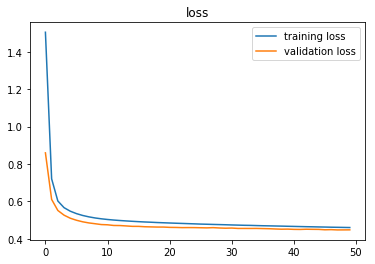

Plotting metrics...


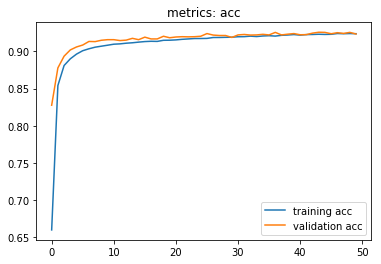

train {'acc': 0.9230545}
test {'acc': 0.9178}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15700543495843858195
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 13869197796182830119
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.299029 , acc = 0.21 
t_cost <class 'dict'> 
train_op : 0.030635000000074797
loss_train : 0.01887799999985873
metric batch : 0.004650000000310683
whole : 0.05452999999988606
display_whole : 0.023810000000139553
Epoch 1 , step 100 , loss= 1.9605176 , acc = 0.61 
t_cost <class 'dict'> 
train_op : 0.0035790000001725275
loss_train : 0.006105999999817868
metric batch : 0.0010019999999713036
whole : 0.01117999999996755
display_whole : 0.007446999999956461
Epoch 1 , step 2

Epoch 5 , step 300 , loss= 0.60247314 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0032919999998739513
loss_train : 0.0023190000001704902
metric batch : 0.001099999999951251
whole : 0.007243999999900552
display_whole : 0.0037699999998039857
Epoch 5 , step 400 , loss= 0.6799093 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0036159999999654246
loss_train : 0.0025599999999030842
metric batch : 0.0010039999997388804
whole : 0.007841000000098575
display_whole : 0.0040340000000469445
Epoch 5 , step 500 , loss= 0.632768 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003666999999950349
loss_train : 0.0028310000002420566
metric batch : 0.0010050000000774162
whole : 0.008066000000326312
display_whole : 0.004229000000123051
Epoch 5 , step 549 , loss= 0.79250824 val_loss= 0.61580354 , acc = 0.89 val acc = 0.911 
Epoch 5 finished, loss= 0.6532468 val loss= 0.61580354 ,  acc = 0.90329087 val acc = 0.911
*
t_cost <class 'dict'> 
train_op : 0.0035669999997480772
loss_train : 0.007660000000

Epoch 10 , step 50 , loss= 0.5968063 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0036050000003342575
loss_train : 0.002046000000063941
metric batch : 0.0010400000001027365
whole : 0.0070909999999457796
display_whole : 0.0033060000000659784
Epoch 10 , step 150 , loss= 0.5085871 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003661000000192871
loss_train : 0.007348999999976513
metric batch : 0.0010099999999511056
whole : 0.012510000000020227
display_whole : 0.008685999999670457
Epoch 10 , step 250 , loss= 0.51633537 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0031560000002173183
loss_train : 0.002181999999720574
metric batch : 0.0010700000002543675
whole : 0.006865000000289001
display_whole : 0.003572000000076514
Epoch 10 , step 350 , loss= 0.6555961 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003032000000075641
loss_train : 0.0017190000003211026
metric batch : 0.0009029999996528204
whole : 0.006151000000045315
display_whole : 0.002937000000201806
Epoch 10 , step 450 ,

Epoch 14 , step 549 , loss= 0.6029035 val_loss= 0.5640346 , acc = 0.9 val acc = 0.9222 
Epoch 14 finished, loss= 0.5820516 val loss= 0.5640346 ,  acc = 0.91794544 val acc = 0.9222
*
t_cost <class 'dict'> 
train_op : 0.003616999999849213
loss_train : 0.004205000000183645
metric batch : 0.0012929999998050334
loss_val : 0.024807999999666208
metric_val : 0.020802999999887106
whole : 0.055953000000044995
display_whole : 0.05216900000004898
Epoch 15 , step 0 , loss= 0.7659354 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.008393999999952939
loss_train : 0.006466999999702239
metric batch : 0.0009489999997640552
whole : 0.016425999999682972
display_whole : 0.007734999999684078
Epoch 15 , step 100 , loss= 0.6516902 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0030030000002625457
loss_train : 0.0017370000000482833
metric batch : 0.0008290000000670261
whole : 0.0059949999999844295
display_whole : 0.0029239999998935673
Epoch 15 , step 200 , loss= 0.70963943 , acc = 0.91 
t_cost <class 'dict

Epoch 19 , step 300 , loss= 0.5651555 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004204000000299857
loss_train : 0.002147000000150001
metric batch : 0.0009959999997590785
whole : 0.007788999999775115
display_whole : 0.0035029999999096617
Epoch 19 , step 400 , loss= 0.5095622 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0032169999999496213
loss_train : 0.0019969999998465937
metric batch : 0.0009549999999762804
whole : 0.006643000000167376
display_whole : 0.003275000000030559
Epoch 19 , step 500 , loss= 0.6662514 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0033750000002328306
loss_train : 0.01575200000024779
metric batch : 0.0010010000000875152
whole : 0.02058099999976548
display_whole : 0.017057999999906315
Epoch 19 , step 549 , loss= 0.53365886 val_loss= 0.559074 , acc = 0.92 val acc = 0.9204 
Epoch 19 finished, loss= 0.5678874 val loss= 0.559074 ,  acc = 0.92112726 val acc = 0.9204

t_cost <class 'dict'> 
train_op : 0.0035320000001775043
loss_train : 0.001952999999957

Epoch 24 , step 50 , loss= 0.6936481 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035330000000612927
loss_train : 0.0025689999997666746
metric batch : 0.0010419999998703133
whole : 0.007780999999795313
display_whole : 0.004039999999804422
Epoch 24 , step 150 , loss= 0.46651837 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003343999999742664
loss_train : 0.0019139999999424617
metric batch : 0.0010560000000623404
whole : 0.006712000000334228
display_whole : 0.0031970000000001164
Epoch 24 , step 250 , loss= 0.39246726 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0037330000000110886
loss_train : 0.003592000000026019
metric batch : 0.0009340000001429871
whole : 0.008898999999928492
display_whole : 0.00497799999993731
Epoch 24 , step 350 , loss= 0.6713965 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.00379800000018804
loss_train : 0.006435999999666819
metric batch : 0.0011150000000270666
whole : 0.011696999999912805
display_whole : 0.007773999999699299
Epoch 24 , step 450 ,

Epoch 28 , step 549 , loss= 0.5626239 val_loss= 0.54743034 , acc = 0.89 val acc = 0.9248 
Epoch 28 finished, loss= 0.5502524 val loss= 0.54743034 ,  acc = 0.92523634 val acc = 0.9248

t_cost <class 'dict'> 
train_op : 0.0033260000000154832
loss_train : 0.01454299999977593
metric batch : 0.0010800000000017462
loss_val : 0.026503000000047905
metric_val : 0.02104700000018056
whole : 0.06752000000005864
display_whole : 0.06402200000002267
Epoch 29 , step 0 , loss= 0.48384422 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.00526899999977104
loss_train : 0.014364000000114174
metric batch : 0.0012890000002698798
whole : 0.02142599999979211
display_whole : 0.015879000000040833
Epoch 29 , step 100 , loss= 0.44673237 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036600000003090827
loss_train : 0.007216999999855034
metric batch : 0.0010889999998653366
whole : 0.012476000000333443
display_whole : 0.008647999999993772
Epoch 29 , step 200 , loss= 0.45990363 , acc = 0.92 
t_cost <class 'dict'>

Epoch 33 , step 300 , loss= 0.6306046 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.00387300000011237
loss_train : 0.004186000000117929
metric batch : 0.003465000000232976
whole : 0.011931999999887921
display_whole : 0.007965000000240252
Epoch 33 , step 400 , loss= 0.65297747 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003040999999939231
loss_train : 0.0058779999999387655
metric batch : 0.0011129999998047424
whole : 0.010504999999739084
display_whole : 0.007289000000127999
Epoch 33 , step 500 , loss= 0.5575141 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00426500000003216
loss_train : 0.0022360000002663583
metric batch : 0.0009560000003148161
whole : 0.00783000000001266
display_whole : 0.003485000000182481
Epoch 33 , step 549 , loss= 0.70973444 val_loss= 0.54662776 , acc = 0.89 val acc = 0.9248 
Epoch 33 finished, loss= 0.54293567 val loss= 0.54662776 ,  acc = 0.92689085 val acc = 0.9248

t_cost <class 'dict'> 
train_op : 0.003226999999697
loss_train : 0.0017420000003767

Epoch 38 , step 50 , loss= 0.4073774 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003619000000071537
loss_train : 0.002528999999867665
metric batch : 0.001033000000006723
whole : 0.007678000000396423
display_whole : 0.003964999999880092
Epoch 38 , step 150 , loss= 0.36346507 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003515999999763153
loss_train : 0.006176999999752297
metric batch : 0.0009839999997893756
whole : 0.011194000000159576
display_whole : 0.007506999999804975
Epoch 38 , step 250 , loss= 0.3592282 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033100000000558794
loss_train : 0.014682999999877211
metric batch : 0.0011389999999664724
whole : 0.019624999999905413
display_whole : 0.016145000000051368
Epoch 38 , step 350 , loss= 0.4788395 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033149999999295687
loss_train : 0.016275999999834312
metric batch : 0.0010360000001128356
whole : 0.02102100000001883
display_whole : 0.017629999999826396
Epoch 38 , step 450 , lo

Epoch 42 , step 549 , loss= 0.4955706 val_loss= 0.5426087 , acc = 0.94 val acc = 0.9254 
Epoch 42 finished, loss= 0.5318717 val loss= 0.5426087 ,  acc = 0.9292 val acc = 0.9254

t_cost <class 'dict'> 
train_op : 0.004133999999794469
loss_train : 0.0020269999999982247
metric batch : 0.001093000000309985
loss_val : 0.029989999999997963
metric_val : 0.021013000000039028
whole : 0.059346999999888794
display_whole : 0.05505700000003344
Epoch 43 , step 0 , loss= 0.4034415 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.007799999999861029
loss_train : 0.0022200000003067544
metric batch : 0.0010769999998956337
whole : 0.01164599999992788
display_whole : 0.003610000000207947
Epoch 43 , step 100 , loss= 0.42287454 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0035460000003695313
loss_train : 0.008735999999771593
metric batch : 0.0014120000000730215
whole : 0.01414199999999255
display_whole : 0.01040000000011787
Epoch 43 , step 200 , loss= 0.57586324 , acc = 0.93 
t_cost <class 'dict'> 
tra

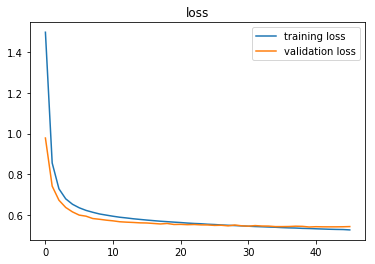

Plotting metrics...


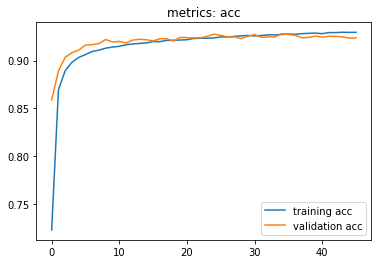

train {'acc': 0.93047273}
test {'acc': 0.9221}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7303995278972466239
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 5494509840052976882
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2861938 , acc = 0.15 
t_cost <class 'dict'> 
train_op : 0.028320999999777996
loss_train : 0.01813300000003437
metric batch : 0.005606000000170752
whole : 0.05247499999995853
display_whole : 0.02407099999982165
Epoch 1 , step 100 , loss= 1.8595216 , acc = 0.57 
t_cost <class 'dict'> 
train_op : 0.004385000000183936
loss_train : 0.002868999999918742
metric batch : 0.0009890000001178123
whole : 0.008727999999791791
display_whole : 0.0041699999997035775
Epoch 1 , step 200

Epoch 5 , step 300 , loss= 0.6859791 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003330000000005384
loss_train : 0.002519000000120286
metric batch : 0.0009860000000116997
whole : 0.007270999999946071
display_whole : 0.003853000000162865
Epoch 5 , step 400 , loss= 0.819015 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0033910000001924345
loss_train : 0.005815999999867927
metric batch : 0.001107999999931053
whole : 0.010762999999769818
display_whole : 0.007286000000021886
Epoch 5 , step 500 , loss= 0.54523355 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003377999999884196
loss_train : 0.0019310000002406014
metric batch : 0.001006999999844993
whole : 0.006636999999955151
display_whole : 0.0031770000000506116
Epoch 5 , step 549 , loss= 0.604185 val_loss= 0.63833386 , acc = 0.92 val acc = 0.9112 
Epoch 5 finished, loss= 0.6640566 val loss= 0.63833386 ,  acc = 0.9043636 val acc = 0.9112
*
t_cost <class 'dict'> 
train_op : 0.0033180000000356813
loss_train : 0.002329000000372616

Epoch 10 , step 50 , loss= 0.67776966 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0038949999998294516
loss_train : 0.0020759999997608247
metric batch : 0.0009359999999105639
whole : 0.007334999999784486
display_whole : 0.003361999999924592
Epoch 10 , step 150 , loss= 0.7089742 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.003862999999910244
loss_train : 0.005229999999755819
metric batch : 0.0010800000000017462
whole : 0.010617999999794847
display_whole : 0.006689999999707652
Epoch 10 , step 250 , loss= 0.6373888 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003412000000025728
loss_train : 0.01040000000011787
metric batch : 0.0011799999997492705
whole : 0.01554500000020198
display_whole : 0.011931999999887921
Epoch 10 , step 350 , loss= 0.64555895 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003093000000262691
loss_train : 0.0022799999997005216
metric batch : 0.0009139999997387349
whole : 0.007010999999693013
display_whole : 0.003749999999854481
Epoch 10 , step 450 , l

Epoch 14 , step 549 , loss= 0.5914279 val_loss= 0.5748006 , acc = 0.88 val acc = 0.9218 
Epoch 14 finished, loss= 0.5793485 val loss= 0.5748006 ,  acc = 0.91858184 val acc = 0.9218

t_cost <class 'dict'> 
train_op : 0.003333999999995285
loss_train : 0.0020990000002711895
metric batch : 0.0009289999998145504
loss_val : 0.040657999999893946
metric_val : 0.02117500000031214
whole : 0.06918900000027861
display_whole : 0.06577900000002046
Epoch 15 , step 0 , loss= 0.5968505 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.006930999999894993
loss_train : 0.003181999999924301
metric batch : 0.0008849999999256397
whole : 0.011981000000105269
display_whole : 0.004441999999926338
Epoch 15 , step 100 , loss= 0.5168185 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003780000000006112
loss_train : 0.0018919999997706327
metric batch : 0.0009639999998398707
whole : 0.007117999999991298
display_whole : 0.003176999999595864
Epoch 15 , step 200 , loss= 0.48339963 , acc = 0.93 
t_cost <class 'dict'> 

Epoch 19 , step 300 , loss= 0.47741526 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036860000000160653
loss_train : 0.005007000000205153
metric batch : 0.0010459999998602143
whole : 0.01012799999989511
display_whole : 0.006370000000060827
Epoch 19 , step 400 , loss= 0.5274287 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.00363100000004124
loss_train : 0.0018799999998009298
metric batch : 0.0011240000003454043
whole : 0.007081000000198401
display_whole : 0.0033389999998689746
Epoch 19 , step 500 , loss= 0.45011133 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0031750000002830348
loss_train : 0.0019069999998464482
metric batch : 0.0009449999997741543
whole : 0.006416000000172062
display_whole : 0.0031420000000252912
Epoch 19 , step 549 , loss= 0.60137844 val_loss= 0.55952096 , acc = 0.95 val acc = 0.925 
Epoch 19 finished, loss= 0.55900735 val loss= 0.55952096 ,  acc = 0.9222 val acc = 0.925
*
t_cost <class 'dict'> 
train_op : 0.0032419999997728155
loss_train : 0.0030059999

Epoch 24 , step 50 , loss= 0.5162537 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035899999998036947
loss_train : 0.004688999999871157
metric batch : 0.0011479999998300627
whole : 0.009804000000258384
display_whole : 0.00610499999993408
Epoch 24 , step 150 , loss= 0.7672741 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0036609999997381237
loss_train : 0.0026450000000295404
metric batch : 0.000950000000102591
whole : 0.007738000000244938
display_whole : 0.003905999999915366
Epoch 24 , step 250 , loss= 0.416902 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003545999999914784
loss_train : 0.001955000000180007
metric batch : 0.0009079999999812571
whole : 0.006860000000415312
display_whole : 0.0032270000001517474
Epoch 24 , step 350 , loss= 0.43614176 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003624999999829015
loss_train : 0.00213400000029651
metric batch : 0.0008960000000115542
whole : 0.00722700000005716
display_whole : 0.0034439999999449356
Epoch 24 , step 450 , lo

Epoch 28 , step 549 , loss= 0.40039095 val_loss= 0.5475495 , acc = 0.94 val acc = 0.9268 
Epoch 28 finished, loss= 0.5341532 val loss= 0.5475495 ,  acc = 0.9274727 val acc = 0.9268

t_cost <class 'dict'> 
train_op : 0.0033370000001013977
loss_train : 0.002102999999806343
metric batch : 0.0010280000001330336
loss_val : 0.02620200000001205
metric_val : 0.02021100000001752
whole : 0.05425599999989572
display_whole : 0.050842000000102416
Epoch 29 , step 0 , loss= 0.3924353 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.007471999999779655
loss_train : 0.0037839999999960128
metric batch : 0.0011670000003505265
whole : 0.0128300000001218
display_whole : 0.005177000000003318
Epoch 29 , step 100 , loss= 0.6647012 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0034860000000662694
loss_train : 0.002070000000003347
metric batch : 0.0010090000000673172
whole : 0.007048000000395405
display_whole : 0.003414000000248052
Epoch 29 , step 200 , loss= 0.37897173 , acc = 0.96 
t_cost <class 'dict'> 


Epoch 33 , step 300 , loss= 0.5852822 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003448999999818625
loss_train : 0.0060050000001865556
metric batch : 0.0009370000002490997
whole : 0.01084599999967395
display_whole : 0.007240000000365399
Epoch 33 , step 400 , loss= 0.43792737 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003412999999909516
loss_train : 0.0034420000001773587
metric batch : 0.001123999999890657
whole : 0.008620000000064465
display_whole : 0.00503500000013446
Epoch 33 , step 500 , loss= 0.47735593 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003426000000217755
loss_train : 0.002783999999792286
metric batch : 0.001069000000370579
whole : 0.007666999999855761
display_whole : 0.004083999999693333
Epoch 33 , step 549 , loss= 0.5058836 val_loss= 0.54410845 , acc = 0.9 val acc = 0.9274 
Epoch 33 finished, loss= 0.52409756 val loss= 0.54410845 ,  acc = 0.9288909 val acc = 0.9274

t_cost <class 'dict'> 
train_op : 0.0035540000003493333
loss_train : 0.00552500000003

Epoch 38 , step 50 , loss= 0.5982888 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003523999999742955
loss_train : 0.005118000000038592
metric batch : 0.0011890000000676082
whole : 0.01026899999988018
display_whole : 0.006544999999732681
Epoch 38 , step 150 , loss= 0.7228276 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033669999997982814
loss_train : 0.0018110000000888249
metric batch : 0.0010909999996329134
whole : 0.006679999999960273
display_whole : 0.0032129999999597203
Epoch 38 , step 250 , loss= 0.49855626 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0029940000003989553
loss_train : 0.0016869999999471474
metric batch : 0.0009909999998853891
whole : 0.006150000000161526
display_whole : 0.003004000000146334
Epoch 38 , step 350 , loss= 0.5722437 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0032920000003286987
loss_train : 0.003729999999904976
metric batch : 0.0009629999999560823
whole : 0.008515999999872292
display_whole : 0.005049999999755528
Epoch 38 , step 450

Epoch 42 , step 549 , loss= 0.3744829 val_loss= 0.5322811 , acc = 0.95 val acc = 0.928 
Epoch 42 finished, loss= 0.5092187 val loss= 0.5322811 ,  acc = 0.93196356 val acc = 0.928

t_cost <class 'dict'> 
train_op : 0.0032210000003942696
loss_train : 0.0020440000002963643
metric batch : 0.001146000000062486
loss_val : 0.0400990000002821
metric_val : 0.02085799999986193
whole : 0.06836400000020149
display_whole : 0.06500400000004447
Epoch 43 , step 0 , loss= 0.5202165 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007362999999713793
loss_train : 0.0035200000002078013
metric batch : 0.000976000000264321
whole : 0.012400999999954365
display_whole : 0.004798000000391767
Epoch 43 , step 100 , loss= 0.43260193 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003333999999995285
loss_train : 0.002047999999831518
metric batch : 0.0009640000002946181
whole : 0.006790999999793712
display_whole : 0.0033839999996416736
Epoch 43 , step 200 , loss= 0.40956396 , acc = 0.95 
t_cost <class 'dict'> 
tr

Epoch 47 , step 300 , loss= 0.381391 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0034370000003036694
loss_train : 0.0023519999999734864
metric batch : 0.000954000000092492
whole : 0.00716099999999642
display_whole : 0.0036199999999553256
Epoch 47 , step 400 , loss= 0.5992588 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0033589999998184794
loss_train : 0.007078999999976077
metric batch : 0.0008870000001479639
whole : 0.011726000000180647
display_whole : 0.008274999999684951
Epoch 47 , step 500 , loss= 0.4639954 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003347000000303524
loss_train : 0.0017739999998411804
metric batch : 0.0010059999999612046
whole : 0.006638000000293687
display_whole : 0.0031100000001060835
Epoch 47 , step 549 , loss= 0.38832366 val_loss= 0.53298676 , acc = 0.94 val acc = 0.9262 
Epoch 47 finished, loss= 0.5021424 val loss= 0.53298676 ,  acc = 0.9324363 val acc = 0.9262

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance wi

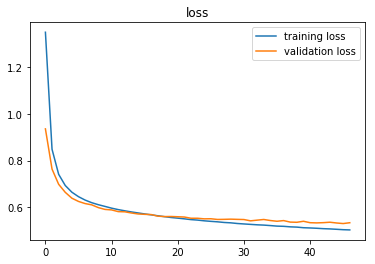

Plotting metrics...


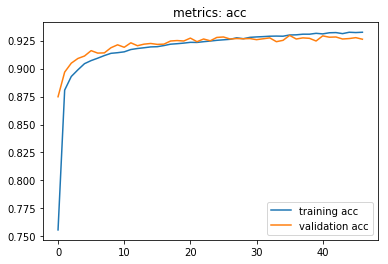

train {'acc': 0.93405455}
test {'acc': 0.9264}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6127278620652227455
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 6653830742258428538
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3081236 , acc = 0.07 
t_cost <class 'dict'> 
train_op : 0.02680400000008376
loss_train : 0.019210999999813794
metric batch : 0.005688000000191096
whole : 0.052009999999881984
display_whole : 0.025120999999671767
Epoch 1 , step 100 , loss= 1.541187 , acc = 0.7 
t_cost <class 'dict'> 
train_op : 0.0033789999997679843
loss_train : 0.0019579999998313724
metric batch : 0.0010919999999714491
whole : 0.0068660000001727894
display_whole : 0.0033929999999600113
Epoch 1 , ste

Epoch 5 , step 300 , loss= 0.58034134 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003420999999889318
loss_train : 0.0028149999998277053
metric batch : 0.001103999999941152
whole : 0.007787000000007538
display_whole : 0.004226999999900727
Epoch 5 , step 400 , loss= 0.63621676 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0031389999999191787
loss_train : 0.001649000000270462
metric batch : 0.0009479999998802668
whole : 0.006182999999964522
display_whole : 0.0029160000003685127
Epoch 5 , step 500 , loss= 0.5436964 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0034900000000561704
loss_train : 0.002155000000129803
metric batch : 0.0009530000002087036
whole : 0.0071859999998196145
display_whole : 0.0035549999997783743
Epoch 5 , step 549 , loss= 0.3898335 val_loss= 0.51832336 , acc = 0.94 val acc = 0.921 
Epoch 5 finished, loss= 0.54087555 val loss= 0.51832336 ,  acc = 0.9128364 val acc = 0.921
*
t_cost <class 'dict'> 
train_op : 0.003363999999692169
loss_train : 0.00592400000005


Epoch 10 , step 50 , loss= 0.45778996 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00308900000027279
loss_train : 0.005340000000160217
metric batch : 0.0009589999999661813
whole : 0.009875000000192813
display_whole : 0.006608000000142056
Epoch 10 , step 150 , loss= 0.6364881 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035950000001321314
loss_train : 0.0028499999998530257
metric batch : 0.0010849999998754356
whole : 0.008049999999911961
display_whole : 0.004304000000047381
Epoch 10 , step 250 , loss= 0.363932 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0031669999998484855
loss_train : 0.003313000000161992
metric batch : 0.0009340000001429871
whole : 0.007888000000093598
display_whole : 0.0045509999999922
Epoch 10 , step 350 , loss= 0.43932167 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0036039999999957217
loss_train : 0.006797999999889726
metric batch : 0.0012489999999161228
whole : 0.012134000000060041
display_whole : 0.00834099999974569
Epoch 10 , step 450 , lo

Epoch 14 , step 549 , loss= 0.43357867 val_loss= 0.47855777 , acc = 0.91 val acc = 0.9246 
Epoch 14 finished, loss= 0.47742316 val loss= 0.47855777 ,  acc = 0.9262546 val acc = 0.9246

t_cost <class 'dict'> 
train_op : 0.0033700000003591413
loss_train : 0.003674999999930151
metric batch : 0.001025000000026921
loss_val : 0.02349000000003798
metric_val : 0.021222999999736203
whole : 0.05382400000007692
display_whole : 0.050279999999929714
Epoch 15 , step 0 , loss= 0.45650214 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007376000000022032
loss_train : 0.0021539999997912673
metric batch : 0.0009660000000621949
whole : 0.011190000000169675
display_whole : 0.0034399999999550346
Epoch 15 , step 100 , loss= 0.37148649 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033999999996012775
loss_train : 0.0023139999998420535
metric batch : 0.001036999999996624
whole : 0.0071819999998297135
display_whole : 0.0035759999996116676
Epoch 15 , step 200 , loss= 0.23406395 , acc = 0.99 
t_cost <class

Epoch 19 , step 300 , loss= 0.4008094 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0030130000000099244
loss_train : 0.0018669999999474385
metric batch : 0.0010959999999613501
whole : 0.006432000000131666
display_whole : 0.0032639999999446445
Epoch 19 , step 400 , loss= 0.35762715 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034960000002683955
loss_train : 0.002531000000089989
metric batch : 0.001194999999825086
whole : 0.007683999999699154
display_whole : 0.004031000000395579
Epoch 19 , step 500 , loss= 0.43572825 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0036820000000261643
loss_train : 0.00169000000005326
metric batch : 0.0008870000001479639
whole : 0.006675999999970372
display_whole : 0.0029119999999238644
Epoch 19 , step 549 , loss= 0.35994038 val_loss= 0.4749295 , acc = 0.94 val acc = 0.9286 
Epoch 19 finished, loss= 0.46048602 val loss= 0.4749295 ,  acc = 0.92978185 val acc = 0.9286
*
t_cost <class 'dict'> 
train_op : 0.0036079999999856227
loss_train : 0.004551

Epoch 24 , step 50 , loss= 0.32449433 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033469999998487765
loss_train : 0.007209000000329979
metric batch : 0.0012590000001182489
whole : 0.012361999999939144
display_whole : 0.008855000000039581
Epoch 24 , step 150 , loss= 0.37044215 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004879999999957363
loss_train : 0.006300000000010186
metric batch : 0.0014169999999467109
whole : 0.013002000000142289
display_whole : 0.007955000000038126
Epoch 24 , step 250 , loss= 0.24607764 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0037469999997483683
loss_train : 0.0025489999998171697
metric batch : 0.001043000000208849
whole : 0.007828000000245083
display_whole : 0.003982999999607273
Epoch 24 , step 350 , loss= 0.50790596 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003281999999671825
loss_train : 0.00208199999997305
metric batch : 0.0009129999998549465
whole : 0.006889000000228407
display_whole : 0.0034499999997024133
Epoch 24 , step 450

Epoch 28 , step 549 , loss= 0.37225136 val_loss= 0.47228932 , acc = 0.94 val acc = 0.9264 
Epoch 28 finished, loss= 0.44019437 val loss= 0.47228932 ,  acc = 0.9331272 val acc = 0.9264

t_cost <class 'dict'> 
train_op : 0.003157999999984895
loss_train : 0.0018169999998463027
metric batch : 0.0010750000001280569
loss_val : 0.02636000000029526
metric_val : 0.01994299999978466
whole : 0.05337899999994988
display_whole : 0.050142999999934545
Epoch 29 , step 0 , loss= 0.4685396 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.009845000000041182
loss_train : 0.0043350000000828
metric batch : 0.0009390000000166765
whole : 0.015895000000000437
display_whole : 0.005574000000251544
Epoch 29 , step 100 , loss= 0.3005247 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0032980000000861764
loss_train : 0.0017720000000736036
metric batch : 0.0009230000000570726
whole : 0.006476999999904365
display_whole : 0.003004000000146334
Epoch 29 , step 200 , loss= 0.46914044 , acc = 0.92 
t_cost <class 'dict'

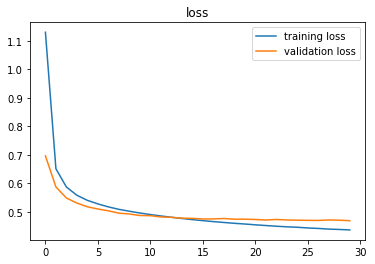

Plotting metrics...


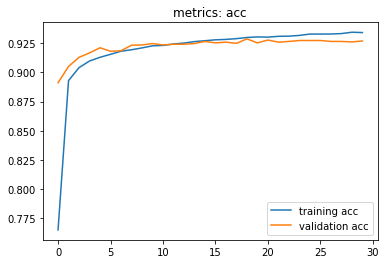

train {'acc': 0.93494546}
test {'acc': 0.9249}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12023571769561769442
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 17209017077126726118
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3097422 , acc = 0.11 
t_cost <class 'dict'> 
train_op : 0.026841999999760446
loss_train : 0.013989000000037777
metric batch : 0.005050000000210275
whole : 0.046278999999685766
display_whole : 0.019279000000096858
Epoch 1 , step 100 , loss= 1.4574977 , acc = 0.61 
t_cost <class 'dict'> 
train_op : 0.0032139999998435087
loss_train : 0.005773000000317552
metric batch : 0.0011469999999462743
whole : 0.010526000000027125
display_whole : 0.00716099999999642
Epoch 1 , step

Epoch 5 , step 300 , loss= 0.23949555 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0030820000001767767
loss_train : 0.01385500000014872
metric batch : 0.0011100000001533772
whole : 0.018491999999696418
display_whole : 0.015285999999832711
Epoch 5 , step 400 , loss= 0.28879595 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003983999999945809
loss_train : 0.004069000000072265
metric batch : 0.0010129999996024708
whole : 0.009622000000035769
display_whole : 0.005440999999791529
Epoch 5 , step 500 , loss= 0.3601205 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.003422000000227854
loss_train : 0.00228400000014517
metric batch : 0.0010259999999107094
whole : 0.00721499999963271
display_whole : 0.0037149999998291605
Epoch 5 , step 549 , loss= 0.3281927 val_loss= 0.27551776 , acc = 0.91 val acc = 0.9238 
Epoch 5 finished, loss= 0.29754964 val loss= 0.27551776 ,  acc = 0.9164 val acc = 0.9238
*
t_cost <class 'dict'> 
train_op : 0.0033149999999295687
loss_train : 0.0023080000000845757

Epoch 10 , step 50 , loss= 0.22910768 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0037449999999807915
loss_train : 0.0021059999999124557
metric batch : 0.0010310000002391462
whole : 0.007372000000032131
display_whole : 0.0034679999998843414
Epoch 10 , step 150 , loss= 0.21439381 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.00369700000010198
loss_train : 0.00482800000008865
metric batch : 0.0012189999997644918
whole : 0.010223000000223692
display_whole : 0.0063369999998030835
Epoch 10 , step 250 , loss= 0.29404137 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0037170000000514847
loss_train : 0.0018489999997655104
metric batch : 0.0010419999998703133
whole : 0.0071510000002490415
display_whole : 0.0032179999998334097
Epoch 10 , step 350 , loss= 0.33361417 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.00307699999984834
loss_train : 0.0021719999999731954
metric batch : 0.0009579999996276456
whole : 0.006722000000081607
display_whole : 0.0035739999998440908
Epoch 10 , ste

Epoch 14 , step 549 , loss= 0.27364346 val_loss= 0.2518334 , acc = 0.92 val acc = 0.9308 
Epoch 14 finished, loss= 0.2510703 val loss= 0.2518334 ,  acc = 0.93038183 val acc = 0.9308

t_cost <class 'dict'> 
train_op : 0.0038620000000264554
loss_train : 0.0019010000000889704
metric batch : 0.0009890000001178123
loss_val : 0.024193000000195752
metric_val : 0.01979799999980969
whole : 0.05179699999962395
display_whole : 0.047748999999839725
Epoch 15 , step 0 , loss= 0.35186732 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.007596999999805121
loss_train : 0.007227999999940948
metric batch : 0.0011349999999765714
whole : 0.01654899999994086
display_whole : 0.008672999999816966
Epoch 15 , step 100 , loss= 0.10422678 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003242000000227563
loss_train : 0.003038000000287866
metric batch : 0.0012950000000273576
whole : 0.007959999999911815
display_whole : 0.004564000000300439
Epoch 15 , step 200 , loss= 0.32593867 , acc = 0.92 
t_cost <class 'dict

Epoch 19 , step 300 , loss= 0.11623178 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.003218000000288157
loss_train : 0.0037670000001526205
metric batch : 0.0015520000001743028
whole : 0.009047000000009575
display_whole : 0.0056410000001960725
Epoch 19 , step 400 , loss= 0.19682708 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004409000000123342
loss_train : 0.001984999999876891
metric batch : 0.0010440000000926375
whole : 0.007761999999729596
display_whole : 0.0032539999997425184
Epoch 19 , step 500 , loss= 0.31559312 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003258999999616208
loss_train : 0.0017390000002706074
metric batch : 0.0009249999998246494
whole : 0.0063369999998030835
display_whole : 0.0030020000003787572
Epoch 19 , step 549 , loss= 0.27296117 val_loss= 0.24730565 , acc = 0.95 val acc = 0.931 
Epoch 19 finished, loss= 0.2412712 val loss= 0.24730565 ,  acc = 0.9325636 val acc = 0.931

t_cost <class 'dict'> 
train_op : 0.003351000000293425
loss_train : 0.0021310

Epoch 24 , step 50 , loss= 0.2537349 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0032599999999547435
loss_train : 0.001724000000194792
metric batch : 0.0010400000001027365
whole : 0.006321999999727268
display_whole : 0.002985999999964406
Epoch 24 , step 150 , loss= 0.3907035 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003456000000369386
loss_train : 0.003181999999924301
metric batch : 0.0009829999999055872
whole : 0.008099000000129308
display_whole : 0.004471000000194181
Epoch 24 , step 250 , loss= 0.28060317 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003444999999828724
loss_train : 0.001599000000169326
metric batch : 0.00102100000003702
whole : 0.006527000000005501
display_whole : 0.0029360000003180176
Epoch 24 , step 350 , loss= 0.30116847 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0035769999999502033
loss_train : 0.002290999999786436
metric batch : 0.0011920000001737208
whole : 0.007633000000168977
display_whole : 0.003889999999955762
Epoch 24 , step 450 , 

Epoch 28 , step 549 , loss= 0.18755764 val_loss= 0.24699038 , acc = 0.93 val acc = 0.9332 
Epoch 28 finished, loss= 0.2303892 val loss= 0.24699038 ,  acc = 0.93538177 val acc = 0.9332
*
t_cost <class 'dict'> 
train_op : 0.003439000000071246
loss_train : 0.0032089999999698193
metric batch : 0.0009990000003199384
loss_val : 0.03092300000025716
metric_val : 0.02009299999963332
whole : 0.059882999999899766
display_whole : 0.0563640000000305
Epoch 29 , step 0 , loss= 0.5073938 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.008350000000064028
loss_train : 0.0023170000004029134
metric batch : 0.0010459999998602143
whole : 0.01242999999976746
display_whole : 0.003687000000354601
Epoch 29 , step 100 , loss= 0.20777789 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004651000000194472
loss_train : 0.0024049999997259874
metric batch : 0.001146000000062486
whole : 0.00872700000036275
display_whole : 0.003992999999809399
Epoch 29 , step 200 , loss= 0.32618296 , acc = 0.89 
t_cost <class 'dict'>

Epoch 33 , step 300 , loss= 0.2547849 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003639000000021042
loss_train : 0.002369000000271626
metric batch : 0.0010870000000977598
whole : 0.007616999999754626
display_whole : 0.0038050000002840534
Epoch 33 , step 400 , loss= 0.26170203 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003386999999747786
loss_train : 0.0019600000000536966
metric batch : 0.0008279999997284904
whole : 0.006710999999995693
display_whole : 0.0031220000000757864
Epoch 33 , step 500 , loss= 0.16025844 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0032950000004348112
loss_train : 0.001776999999947293
metric batch : 0.0010070000002997403
whole : 0.006578999999874213
display_whole : 0.003123999999843363
Epoch 33 , step 549 , loss= 0.13040599 val_loss= 0.25111386 , acc = 0.96 val acc = 0.9316 
Epoch 33 finished, loss= 0.22598538 val loss= 0.25111386 ,  acc = 0.936691 val acc = 0.9316

t_cost <class 'dict'> 
train_op : 0.004271999999673426
loss_train : 0.00196899

Epoch 38 , step 50 , loss= 0.24698739 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0034290000003238674
loss_train : 0.0016699999996490078
metric batch : 0.0010230000002593442
whole : 0.0066440000000511645
display_whole : 0.0030659999997624254
Epoch 38 , step 150 , loss= 0.15209854 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0032959999998638523
loss_train : 0.0018359999999120191
metric batch : 0.0009820000000217988
whole : 0.00657500000033906
display_whole : 0.003125000000181899
Epoch 38 , step 250 , loss= 0.18462592 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003210000000308355
loss_train : 0.0036869999998998537
metric batch : 0.0010139999999410065
whole : 0.008387999999740714
display_whole : 0.005003999999644293
Epoch 38 , step 350 , loss= 0.2312428 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003361999999924592
loss_train : 0.0028760000000147556
metric batch : 0.0011779999999816937
whole : 0.007884000000103697
display_whole : 0.004433000000062748
Epoch 38 , step 

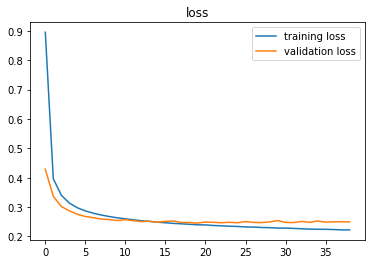

Plotting metrics...


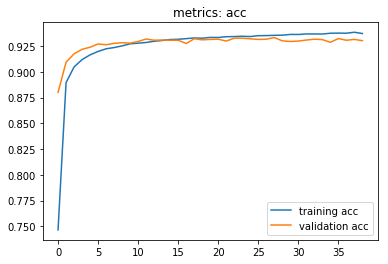

train {'acc': 0.9389091}
test {'acc': 0.9319}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2215715293786644326
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5482414080
locality {
  bus_id: 1
}
incarnation: 18376229457189114492
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3016694 , acc = 0.09 
t_cost <class 'dict'> 
train_op : 0.028368000000227767
loss_train : 0.011800000000221189
metric batch : 0.004394999999931315
whole : 0.044979000000239466
display_whole : 0.016524000000117667
Epoch 1 , step 100 , loss= 2.2201667 , acc = 0.35 
t_cost <class 'dict'> 
train_op : 0.003729999999904976
loss_train : 0.001934999999775755
metric batch : 0.0011309999999866704
whole : 0.007141000000046915
display_whole : 0.00332799999978306
Epoch 1 , step 2

Epoch 5 , step 300 , loss= 1.1032928 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004021000000193453
loss_train : 0.0020240000003468595
metric batch : 0.0010539999998400162
whole : 0.0074629999999160646
display_whole : 0.003349999999954889
Epoch 5 , step 400 , loss= 1.0738368 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003578000000288739
loss_train : 0.002919000000019878
metric batch : 0.0010480000000825385
whole : 0.007951000000048225
display_whole : 0.004290999999739142
Epoch 5 , step 500 , loss= 1.1827388 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.00345500000003085
loss_train : 0.0024509999998372223
metric batch : 0.0010390000002189481
whole : 0.007436999999754335
display_whole : 0.003823000000011234
Epoch 5 , step 549 , loss= 1.2395844 val_loss= 1.1441664 , acc = 0.84 val acc = 0.8832 
Epoch 5 finished, loss= 1.1833729 val loss= 1.1441664 ,  acc = 0.8670909 val acc = 0.8832
*
t_cost <class 'dict'> 
train_op : 0.0036300000001574517
loss_train : 0.00213400000029651


Epoch 10 , step 50 , loss= 1.1132537 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.004197999999632884
loss_train : 0.002128999999968073
metric batch : 0.0008590000002186571
whole : 0.007820999999694322
display_whole : 0.003444999999828724
Epoch 10 , step 150 , loss= 1.1673305 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.003234000000247761
loss_train : 0.014059000000088417
metric batch : 0.0015120000002752931
whole : 0.019182999999884487
display_whole : 0.01587199999994482
Epoch 10 , step 250 , loss= 1.1904238 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0032199999996009865
loss_train : 0.0028600000000551518
metric batch : 0.0011359999998603598
whole : 0.00765400000000227
display_whole : 0.004283999999643129
Epoch 10 , step 350 , loss= 1.1075354 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0029130000002624
loss_train : 0.0019179999999323627
metric batch : 0.0009399999999004649
whole : 0.006283000000166794
display_whole : 0.003202999999757594
Epoch 10 , step 450 , loss

Epoch 14 , step 549 , loss= 1.2246112 val_loss= 1.1117644 , acc = 0.86 val acc = 0.903 
Epoch 14 finished, loss= 1.1442952 val loss= 1.1117644 ,  acc = 0.8915455 val acc = 0.903
*
t_cost <class 'dict'> 
train_op : 0.0035250000000814907
loss_train : 0.0020970000000488653
metric batch : 0.0009190000000671716
loss_val : 0.023365999999896303
metric_val : 0.01992100000006758
whole : 0.051120000000082655
display_whole : 0.047510999999758496
Epoch 15 , step 0 , loss= 0.99465567 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.006150000000161526
loss_train : 0.0049809999995886756
metric batch : 0.0010219999999208085
whole : 0.012764999999944848
display_whole : 0.006296000000020285
Epoch 15 , step 100 , loss= 1.2183807 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.003464999999778229
loss_train : 0.002250000000003638
metric batch : 0.0010320000001229346
whole : 0.007206000000223867
display_whole : 0.003582999999707681
Epoch 15 , step 200 , loss= 1.0949233 , acc = 0.9 
t_cost <class 'dict'> 

Epoch 19 , step 300 , loss= 1.0247064 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004382999999961612
loss_train : 0.0038220000001274457
metric batch : 0.0010179999999309075
whole : 0.00963000000001557
display_whole : 0.005083000000013271
Epoch 19 , step 400 , loss= 1.1864702 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0032929999997577397
loss_train : 0.004947000000356638
metric batch : 0.0011249999997744453
whole : 0.009739999999965221
display_whole : 0.006372000000283151
Epoch 19 , step 500 , loss= 1.0675728 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003173999999944499
loss_train : 0.002646000000368076
metric batch : 0.0008800000000519503
whole : 0.0072040000000015425
display_whole : 0.003849000000172964
Epoch 19 , step 549 , loss= 1.152922 val_loss= 1.1055636 , acc = 0.93 val acc = 0.9014 
Epoch 19 finished, loss= 1.1370777 val loss= 1.1055636 ,  acc = 0.89505446 val acc = 0.9014

t_cost <class 'dict'> 
train_op : 0.0035550000002331217
loss_train : 0.016478000000006

Epoch 24 , step 50 , loss= 1.2366846 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.003418000000237953
loss_train : 0.0033330000001114968
metric batch : 0.001475999999911437
whole : 0.008702999999968597
display_whole : 0.005102000000078988
Epoch 24 , step 150 , loss= 1.1619885 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.003153999999994994
loss_train : 0.01279400000021269
metric batch : 0.001123999999890657
whole : 0.017515000000003056
display_whole : 0.014263000000028114
Epoch 24 , step 250 , loss= 1.0249822 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003770000000258733
loss_train : 0.006980999999996129
metric batch : 0.0013860000003660389
whole : 0.012621999999737454
display_whole : 0.008689999999660358
Epoch 24 , step 350 , loss= 1.1268294 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0038599999998041312
loss_train : 0.002134999999725551
metric batch : 0.0011319999998704589
whole : 0.0075940000001537555
display_whole : 0.003619000000071537
Epoch 24 , step 450 , los

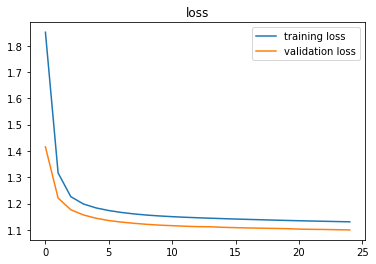

Plotting metrics...


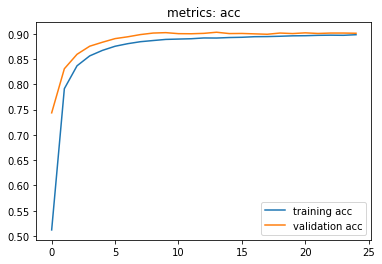

train {'acc': 0.8975818}
test {'acc': 0.8977}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17978277437536949448
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 5628379774927865661
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.305541 , acc = 0.1 
t_cost <class 'dict'> 
train_op : 0.033223999999790976
loss_train : 0.023013999999875523
metric batch : 0.006010999999944033
whole : 0.06261399999993955
display_whole : 0.029299999999693682
Epoch 1 , step 100 , loss= 2.0915947 , acc = 0.51 
t_cost <class 'dict'> 
train_op : 0.004889999999704742
loss_train : 0.005604999999832216
metric batch : 0.0019190000002708985
whole : 0.012985999999727937
display_whole : 0.00790099999994709
Epoch 1 , step 20

Epoch 5 , step 300 , loss= 1.1520598 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003527999999732856
loss_train : 0.005232999999861931
metric batch : 0.0010900000002038723
whole : 0.010267999999996391
display_whole : 0.006640999999945052
Epoch 5 , step 400 , loss= 1.0530492 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0049090000002252054
loss_train : 0.0033870000002025336
metric batch : 0.0010379999998804124
whole : 0.010411000000203785
display_whole : 0.005380000000059226
Epoch 5 , step 500 , loss= 1.2092503 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0049579999999878055
loss_train : 0.004382999999961612
metric batch : 0.0012820000001738663
whole : 0.01114400000005844
display_whole : 0.005979999999908614
Epoch 5 , step 549 , loss= 1.2010798 val_loss= 1.1750538 , acc = 0.9 val acc = 0.9046 
Epoch 5 finished, loss= 1.211869 val loss= 1.1750538 ,  acc = 0.89265454 val acc = 0.9046
*
t_cost <class 'dict'> 
train_op : 0.004201999999622785
loss_train : 0.0029060000001663866


Epoch 10 , step 50 , loss= 1.046087 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0034660000001167646
loss_train : 0.015756999999666732
metric batch : 0.0013579999999819847
whole : 0.021000000000185537
display_whole : 0.017383999999765365
Epoch 10 , step 150 , loss= 1.248904 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.003452000000379485
loss_train : 0.006288999999924272
metric batch : 0.0013720000001740118
whole : 0.01156700000001365
display_whole : 0.00796200000013414
Epoch 10 , step 250 , loss= 1.119985 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0034570000002531742
loss_train : 0.003448999999818625
metric batch : 0.001099999999951251
whole : 0.008452000000033877
display_whole : 0.004895999999916967
Epoch 10 , step 350 , loss= 1.0270231 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0035410000000410946
loss_train : 0.0018749999999272404
metric batch : 0.0010709999996834085
whole : 0.006881000000248605
display_whole : 0.0031829999998080893
Epoch 10 , step 450 , loss=

Epoch 14 , step 549 , loss= 1.003729 val_loss= 1.0912433 , acc = 0.94 val acc = 0.921 
Epoch 14 finished, loss= 1.1100456 val loss= 1.0912433 ,  acc = 0.91630906 val acc = 0.921

t_cost <class 'dict'> 
train_op : 0.004374000000098022
loss_train : 0.0027420000001256994
metric batch : 0.0011140000001432782
loss_val : 0.025399000000106753
metric_val : 0.02190199999995457
whole : 0.05656200000021272
display_whole : 0.05208500000026106
Epoch 15 , step 0 , loss= 1.0464704 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.008512000000337139
loss_train : 0.0031690000000708096
metric batch : 0.0012240000000929285
whole : 0.013680999999905907
display_whole : 0.0047700000000077125
Epoch 15 , step 100 , loss= 1.0537758 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003891999999723339
loss_train : 0.00502100000039718
metric batch : 0.0015539999999418797
whole : 0.01085300000022471
display_whole : 0.006871000000046479
Epoch 15 , step 200 , loss= 0.95166224 , acc = 0.96 
t_cost <class 'dict'> 
tra

Epoch 19 , step 300 , loss= 1.153141 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003911999999672844
loss_train : 0.0035580000003392342
metric batch : 0.0012910000000374566
whole : 0.009162999999716703
display_whole : 0.005144000000200322
Epoch 19 , step 400 , loss= 1.1225119 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004352999999809981
loss_train : 0.0031369999996968545
metric batch : 0.0011580000000321888
whole : 0.009043000000019674
display_whole : 0.0045150000000830914
Epoch 19 , step 500 , loss= 1.0138423 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0038279999998849235
loss_train : 0.010518000000047323
metric batch : 0.001461000000290369
whole : 0.01634299999977884
display_whole : 0.012430000000222208
Epoch 19 , step 549 , loss= 1.0026268 val_loss= 1.0813122 , acc = 0.94 val acc = 0.9246 
Epoch 19 finished, loss= 1.0932344 val loss= 1.0813122 ,  acc = 0.9192182 val acc = 0.9246
*
t_cost <class 'dict'> 
train_op : 0.0044289999996180995
loss_train : 0.01410499999974

Epoch 24 , step 50 , loss= 1.2702907 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.004311000000143395
loss_train : 0.003167999999732274
metric batch : 0.0011620000000220898
whole : 0.009114999999837892
display_whole : 0.00470599999971455
Epoch 24 , step 150 , loss= 1.1737045 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004061999999976251
loss_train : 0.005634999999983847
metric batch : 0.002430000000003929
whole : 0.012528000000202155
display_whole : 0.008377999999993335
Epoch 24 , step 250 , loss= 0.9904663 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0041919999998754065
loss_train : 0.010674999999991996
metric batch : 0.0012109999997846899
whole : 0.01648299999988012
display_whole : 0.012189999999918655
Epoch 24 , step 350 , loss= 1.280036 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.004415000000335567
loss_train : 0.004010999999991327
metric batch : 0.0010790000001179578
whole : 0.009970999999950436
display_whole : 0.005428999999821826
Epoch 24 , step 450 , loss= 1.

Epoch 28 , step 549 , loss= 0.8924386 val_loss= 1.071916 , acc = 0.95 val acc = 0.924 
Epoch 28 finished, loss= 1.0752202 val loss= 1.071916 ,  acc = 0.92358184 val acc = 0.924

t_cost <class 'dict'> 
train_op : 0.0040689999996175175
loss_train : 0.003210999999282649
metric batch : 0.0009130000007644412
loss_val : 0.030200000000149885
metric_val : 0.020961999999599357
whole : 0.0606259999995018
display_whole : 0.05638399999952526
Epoch 29 , step 0 , loss= 0.9596095 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.006717999999636959
loss_train : 0.002470000000357686
metric batch : 0.0010469999997440027
whole : 0.010858999999982188
display_whole : 0.0038620000004812027
Epoch 29 , step 100 , loss= 0.9522805 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.004262999999809836
loss_train : 0.002215000000433065
metric batch : 0.0010180000008404022
whole : 0.008089999999356223
display_whole : 0.0037140000004001195
Epoch 29 , step 200 , loss= 1.0099093 , acc = 0.9 
t_cost <class 'dict'> 
trai

Epoch 33 , step 300 , loss= 1.0217185 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0034399999995002872
loss_train : 0.004004000000350061
metric batch : 0.0010249999995721737
whole : 0.008898000000044703
display_whole : 0.005380999999943015
Epoch 33 , step 400 , loss= 1.0382036 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003852000000733824
loss_train : 0.0018049999998765998
metric batch : 0.0012950000000273576
whole : 0.0073829999992085504
display_whole : 0.003426999999646796
Epoch 33 , step 500 , loss= 1.2367022 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003483000000414904
loss_train : 0.002426000000014028
metric batch : 0.0011899999999513966
whole : 0.007749999999759893
display_whole : 0.004046000000016647
Epoch 33 , step 549 , loss= 0.77439946 val_loss= 1.0679197 , acc = 0.99 val acc = 0.9264 
Epoch 33 finished, loss= 1.0677675 val loss= 1.0679197 ,  acc = 0.92489094 val acc = 0.9264

t_cost <class 'dict'> 
train_op : 0.003499999999803549
loss_train : 0.0019610000008

Epoch 38 , step 50 , loss= 0.9422311 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003560000000106811
loss_train : 0.0073130000000674045
metric batch : 0.00099800000043615
whole : 0.012371000000712229
display_whole : 0.008654000000205997
Epoch 38 , step 150 , loss= 1.0557134 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0037290000000211876
loss_train : 0.0054439999994428945
metric batch : 0.0010740000006990158
whole : 0.010639999999511929
display_whole : 0.006835999999566411
Epoch 38 , step 250 , loss= 1.2349979 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0037430000002132147
loss_train : 0.006798999999773514
metric batch : 0.0010160000001633307
whole : 0.012044000000059896
display_whole : 0.008154000000104134
Epoch 38 , step 350 , loss= 1.0356286 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004340999999840278
loss_train : 0.0022189999999682186
metric batch : 0.0011619999995673425
whole : 0.008163999999851512
display_whole : 0.003665000000182772
Epoch 38 , step 450 , 

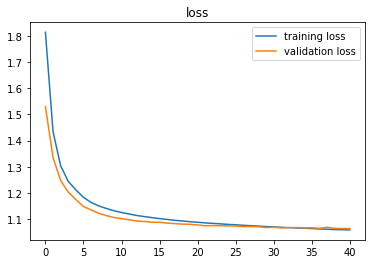

Plotting metrics...


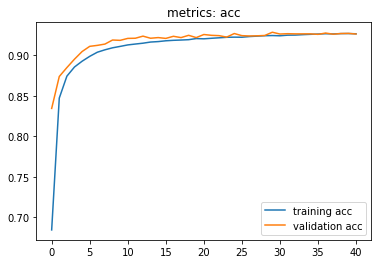

train {'acc': 0.92745453}
test {'acc': 0.9178}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13802674282113047628
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 15180551817890286821
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3250983 , acc = 0.03 
t_cost <class 'dict'> 
train_op : 0.026915000000371947
loss_train : 0.021597000000838307
metric batch : 0.004974000000402157
whole : 0.05382599999938975
display_whole : 0.026822000000720436
Epoch 1 , step 100 , loss= 1.7970021 , acc = 0.67 
t_cost <class 'dict'> 
train_op : 0.0031879999996817787
loss_train : 0.0068179999998392304
metric batch : 0.001075999999557098
whole : 0.011553999999705411
display_whole : 0.008194999999432184
Epoch 1 , ste

Epoch 5 , step 300 , loss= 1.0945451 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0031979999994291575
loss_train : 0.0017189999998663552
metric batch : 0.0009390000004714238
whole : 0.006225999999514897
display_whole : 0.0029460000005201437
Epoch 5 , step 400 , loss= 1.059699 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0031989999997676932
loss_train : 0.0024750000002313755
metric batch : 0.0008909999996831175
whole : 0.006946000000425556
display_whole : 0.003666999999950349
Epoch 5 , step 500 , loss= 0.96403086 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0034330000007685157
loss_train : 0.002923000000009779
metric batch : 0.0009369999997943523
whole : 0.007700000000113505
display_whole : 0.004197000000203843
Epoch 5 , step 549 , loss= 0.940554 val_loss= 0.97512996 , acc = 0.88 val acc = 0.9114 
Epoch 5 finished, loss= 1.0021344 val loss= 0.97512996 ,  acc = 0.9070909 val acc = 0.9114

t_cost <class 'dict'> 
train_op : 0.003349999999954889
loss_train : 0.001675000000432

Epoch 10 , step 50 , loss= 1.0072541 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.003117000000202097
loss_train : 0.007888000000093598
metric batch : 0.001006999999844993
whole : 0.012485000000197033
display_whole : 0.00923400000010588
Epoch 10 , step 150 , loss= 1.0075468 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003410000000258151
loss_train : 0.00194400000054884
metric batch : 0.0010249999995721737
whole : 0.0067700000008699135
display_whole : 0.0032690000007278286
Epoch 10 , step 250 , loss= 1.1006491 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0034650000006877235
loss_train : 0.001981000000341737
metric batch : 0.0010110000002896413
whole : 0.006924000000253727
display_whole : 0.0032940000000962755
Epoch 10 , step 350 , loss= 0.7988725 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00436600000011822
loss_train : 0.00698499999998603
metric batch : 0.0011040000008506468
whole : 0.012963999999556108
display_whole : 0.008444999999483116
Epoch 10 , step 450 , loss

Epoch 14 , step 549 , loss= 0.7975961 val_loss= 0.92970026 , acc = 0.96 val acc = 0.92 
Epoch 14 finished, loss= 0.93191516 val loss= 0.92970026 ,  acc = 0.9192 val acc = 0.92

t_cost <class 'dict'> 
train_op : 0.003311000000394415
loss_train : 0.0018449999997756095
metric batch : 0.001006000000415952
loss_val : 0.02581300000019837
metric_val : 0.019767999999203312
whole : 0.052762999999686144
display_whole : 0.0493769999993674
Epoch 15 , step 0 , loss= 0.791782 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.008372999999664898
loss_train : 0.001833000000260654
metric batch : 0.0009930000005624606
whole : 0.011752000000342377
display_whole : 0.0032049999999799184
Epoch 15 , step 100 , loss= 0.9968871 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0033999999996012775
loss_train : 0.003418999999666994
metric batch : 0.0010990000000674627
whole : 0.008417000000008557
display_whole : 0.004864999999881547
Epoch 15 , step 200 , loss= 0.7707898 , acc = 0.95 
t_cost <class 'dict'> 
train_

Epoch 19 , step 300 , loss= 0.86309826 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0036259999997128034
loss_train : 0.0035020000004806207
metric batch : 0.0011089999998148414
whole : 0.008655000000544533
display_whole : 0.004864000000452506
Epoch 19 , step 400 , loss= 0.9163186 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0036649999992732774
loss_train : 0.0022189999999682186
metric batch : 0.0012209999995320686
whole : 0.007499000000279921
display_whole : 0.003725000000486034
Epoch 19 , step 500 , loss= 0.8280027 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003932000000531843
loss_train : 0.005405999999311462
metric batch : 0.0011089999998148414
whole : 0.010805999999320193
display_whole : 0.006759999999303545
Epoch 19 , step 549 , loss= 0.67810184 val_loss= 0.9217004 , acc = 0.97 val acc = 0.9222 
Epoch 19 finished, loss= 0.9172807 val loss= 0.9217004 ,  acc = 0.9232363 val acc = 0.9222

t_cost <class 'dict'> 
train_op : 0.003364999999575957
loss_train : 0.003821000000

Epoch 24 , step 50 , loss= 0.8696528 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034130000003642635
loss_train : 0.0022330000001602457
metric batch : 0.0009130000007644412
whole : 0.007221999999273976
display_whole : 0.0037309999997887644
Epoch 24 , step 150 , loss= 0.8483807 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033140000005005277
loss_train : 0.006912000000738772
metric batch : 0.0009920000002239249
whole : 0.011634999999841966
display_whole : 0.00824300000022049
Epoch 24 , step 250 , loss= 0.9715738 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003486999999950058
loss_train : 0.002239000000372471
metric batch : 0.0010830000001078588
whole : 0.007348000000092725
display_whole : 0.003695999999763444
Epoch 24 , step 350 , loss= 0.92381144 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003290999999990163
loss_train : 0.0030779999997321283
metric batch : 0.0009079999999812571
whole : 0.007661000000553031
display_whole : 0.004275999999663327
Epoch 24 , step 450 

Epoch 28 , step 549 , loss= 0.8777876 val_loss= 0.9234879 , acc = 0.95 val acc = 0.9214 
Epoch 28 finished, loss= 0.89945406 val loss= 0.9234879 ,  acc = 0.92621815 val acc = 0.9214

t_cost <class 'dict'> 
train_op : 0.0032939999991867808
loss_train : 0.0019179999999323627
metric batch : 0.0009000000000014552
loss_val : 0.02328600000055303
metric_val : 0.021113999999215594
whole : 0.051801000000523345
display_whole : 0.048439000000144006
Epoch 29 , step 0 , loss= 0.9193629 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.00896900000043388
loss_train : 0.0020970000005036127
metric batch : 0.0012159999996583792
whole : 0.013091000000713393
display_whole : 0.0038130000002638553
Epoch 29 , step 100 , loss= 0.8963637 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003493000000162283
loss_train : 0.0032259999998132116
metric batch : 0.0009970000000976142
whole : 0.00817800000004354
display_whole : 0.0045419999996738625
Epoch 29 , step 200 , loss= 1.0190091 , acc = 0.9 
t_cost <class 'dict

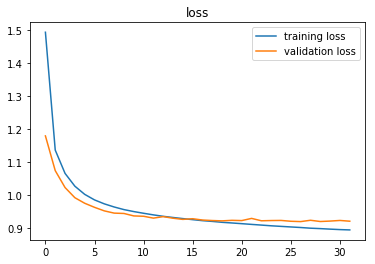

Plotting metrics...


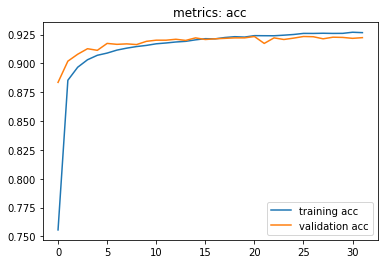

train {'acc': 0.9280364}
test {'acc': 0.9192}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18381587332628605857
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 5203818754878818224
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3006268 , acc = 0.11 
t_cost <class 'dict'> 
train_op : 0.026674000000639353
loss_train : 0.0148060000001351
metric batch : 0.004702999999608437
whole : 0.04650099999980739
display_whole : 0.019739999999728752
Epoch 1 , step 100 , loss= 1.6704378 , acc = 0.62 
t_cost <class 'dict'> 
train_op : 0.003275000000030559
loss_train : 0.0020750000003317837
metric batch : 0.0010579999998299172
whole : 0.006900999999743362
display_whole : 0.0034439999999449356
Epoch 1 , step

Epoch 5 , step 300 , loss= 0.8333018 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.004334999999628053
loss_train : 0.0023850000006859773
metric batch : 0.0012950000000273576
whole : 0.008589000000029046
display_whole : 0.004088000000592729
Epoch 5 , step 400 , loss= 0.82673466 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003493000000162283
loss_train : 0.005673999999999069
metric batch : 0.0012219999998706044
whole : 0.010880000000724976
display_whole : 0.007204999999885331
Epoch 5 , step 500 , loss= 0.55480945 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.002997999999934109
loss_train : 0.0037999999995008693
metric batch : 0.001028000000587781
whole : 0.008386000000427885
display_whole : 0.005295999999361811
Epoch 5 , step 549 , loss= 0.6581573 val_loss= 0.6725679 , acc = 0.92 val acc = 0.9176 
Epoch 5 finished, loss= 0.68761986 val loss= 0.6725679 ,  acc = 0.9148909 val acc = 0.9176
*
t_cost <class 'dict'> 
train_op : 0.003335999999762862
loss_train : 0.001935999999659543

Epoch 10 , step 50 , loss= 0.612226 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0032629999996061088
loss_train : 0.0016489999998157145
metric batch : 0.0010569999994913815
whole : 0.006437000000005355
display_whole : 0.003014999999322754
Epoch 10 , step 150 , loss= 0.6250421 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0041120000005321344
loss_train : 0.0025789999999688007
metric batch : 0.0010460000003149617
whole : 0.00805300000047282
display_whole : 0.003861999999571708
Epoch 10 , step 250 , loss= 0.7986608 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003461000000243075
loss_train : 0.010318000000552274
metric batch : 0.0009899999995468534
whole : 0.01527299999997922
display_whole : 0.011733000000276661
Epoch 10 , step 350 , loss= 0.78530264 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003687999999783642
loss_train : 0.002011999999922409
metric batch : 0.0011130000002594898
whole : 0.007218000000648317
display_whole : 0.003351000000293425
Epoch 10 , step 450 , los

Epoch 14 , step 549 , loss= 0.7429842 val_loss= 0.6439126 , acc = 0.92 val acc = 0.9224 
Epoch 14 finished, loss= 0.6441919 val loss= 0.6439126 ,  acc = 0.9252546 val acc = 0.9224

t_cost <class 'dict'> 
train_op : 0.0037140000004001195
loss_train : 0.0020530000001599547
metric batch : 0.0010039999997388804
loss_val : 0.027534999999261345
metric_val : 0.021000000000640284
whole : 0.05651800000032381
display_whole : 0.05269900000075722
Epoch 15 , step 0 , loss= 0.6589415 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.005699999999706051
loss_train : 0.006266000000323402
metric batch : 0.001029999999445863
whole : 0.014052000000447151
display_whole : 0.007663000000320608
Epoch 15 , step 100 , loss= 0.7033464 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003491999999823747
loss_train : 0.002050000000053842
metric batch : 0.0010169999995923718
whole : 0.007040999999844644
display_whole : 0.0033839999996416736
Epoch 15 , step 200 , loss= 0.63905287 , acc = 0.93 
t_cost <class 'dict'> 

Epoch 19 , step 300 , loss= 0.58761555 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003319999999803258
loss_train : 0.001878000000033353
metric batch : 0.0008289999996122788
whole : 0.006484999999884167
display_whole : 0.003080999999838241
Epoch 19 , step 400 , loss= 0.4934075 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003236999999899126
loss_train : 0.0022859999999127467
metric batch : 0.0009430000000065775
whole : 0.006975000000238651
display_whole : 0.003568000000086613
Epoch 19 , step 500 , loss= 0.70290446 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.00456800000029034
loss_train : 0.00588900000002468
metric batch : 0.0013269999999465654
whole : 0.012128000000302563
display_whole : 0.00745199999983015
Epoch 19 , step 549 , loss= 0.69425356 val_loss= 0.6380255 , acc = 0.91 val acc = 0.9246 
Epoch 19 finished, loss= 0.6332898 val loss= 0.6380255 ,  acc = 0.92741823 val acc = 0.9246

t_cost <class 'dict'> 
train_op : 0.0042860000003202
loss_train : 0.00476000000071508

Epoch 24 , step 50 , loss= 0.46142283 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.003026999999747204
loss_train : 0.0063500000005660695
metric batch : 0.0013010000002395827
whole : 0.011134000000311062
display_whole : 0.007955000000038126
Epoch 24 , step 150 , loss= 0.5141915 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004410999999890919
loss_train : 0.002110000000357104
metric batch : 0.001036999999996624
whole : 0.008060000000114087
display_whole : 0.0034740000000965665
Epoch 24 , step 250 , loss= 0.4782837 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034750000004351023
loss_train : 0.001907000000755943
metric batch : 0.0008950000001277658
whole : 0.006794999999328866
display_whole : 0.0031590000007781782
Epoch 24 , step 350 , loss= 0.6404646 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.00330500000018219
loss_train : 0.005895999999665946
metric batch : 0.0009000000000014552
whole : 0.01072199999998702
display_whole : 0.007241999999678228
Epoch 24 , step 450 , l

Epoch 28 , step 549 , loss= 0.6465933 val_loss= 0.6339783 , acc = 0.94 val acc = 0.9258 
Epoch 28 finished, loss= 0.6189272 val loss= 0.6339783 ,  acc = 0.92978185 val acc = 0.9258

t_cost <class 'dict'> 
train_op : 0.0034969999996974366
loss_train : 0.002344999999877473
metric batch : 0.0010009999996327679
loss_val : 0.026111000000128115
metric_val : 0.02091400000063004
whole : 0.055186999999932596
display_whole : 0.05153900000004796
Epoch 29 , step 0 , loss= 0.5721929 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00761400000010326
loss_train : 0.002868999999918742
metric batch : 0.0009089999994102982
whole : 0.012120999999751803
display_whole : 0.004058999999870139
Epoch 29 , step 100 , loss= 0.61723554 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003830000000561995
loss_train : 0.0037890000003244495
metric batch : 0.0010080000001835288
whole : 0.009133999999903608
display_whole : 0.0051110000003973255
Epoch 29 , step 200 , loss= 0.64957994 , acc = 0.92 
t_cost <class 'dict'

Epoch 33 , step 300 , loss= 0.45852396 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0035100000004604226
loss_train : 0.0020770000000993605
metric batch : 0.0011210000002392917
whole : 0.00719200000003184
display_whole : 0.003522999999404419
Epoch 33 , step 400 , loss= 0.7505051 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.003396000000066124
loss_train : 0.0036700000000564614
metric batch : 0.0010230000007140916
whole : 0.008577999999943131
display_whole : 0.00499500000023545
Epoch 33 , step 500 , loss= 0.6402253 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003238999999666703
loss_train : 0.0019430000002103043
metric batch : 0.0011060000006182236
whole : 0.006811000000197964
display_whole : 0.003365000000485452
Epoch 33 , step 549 , loss= 0.7111672 val_loss= 0.63406014 , acc = 0.92 val acc = 0.9272 
Epoch 33 finished, loss= 0.6121043 val loss= 0.63406014 ,  acc = 0.93081814 val acc = 0.9272

t_cost <class 'dict'> 
train_op : 0.003651999999419786
loss_train : 0.00741800000

Epoch 38 , step 50 , loss= 0.4811359 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033260000000154832
loss_train : 0.005317000000104599
metric batch : 0.000954000000092492
whole : 0.009997999999541207
display_whole : 0.006596999999601394
Epoch 38 , step 150 , loss= 0.5126953 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0032719999999244465
loss_train : 0.002215000000433065
metric batch : 0.0009570000001986045
whole : 0.00702499999988504
display_whole : 0.0036030000001119333
Epoch 38 , step 250 , loss= 0.68015337 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003491999999823747
loss_train : 0.0019120000006296323
metric batch : 0.000954999999521533
whole : 0.006750000000465661
display_whole : 0.0031710000002931338
Epoch 38 , step 350 , loss= 0.7216182 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0040389999994658865
loss_train : 0.003321000000141794
metric batch : 0.00112500000068394
whole : 0.008972999999969034
display_whole : 0.00475300000016432
Epoch 38 , step 450 , lo

Epoch 42 , step 549 , loss= 0.5664968 val_loss= 0.63254267 , acc = 0.95 val acc = 0.926 
Epoch 42 finished, loss= 0.60236937 val loss= 0.63254267 ,  acc = 0.9330909 val acc = 0.926

t_cost <class 'dict'> 
train_op : 0.003763000000617467
loss_train : 0.0021010000000387663
metric batch : 0.0011409999997340492
loss_val : 0.028637000000344415
metric_val : 0.021004000000175438
whole : 0.05771199999981036
display_whole : 0.053848999999900116
Epoch 43 , step 0 , loss= 0.5420172 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.006951999999728287
loss_train : 0.003281000000242784
metric batch : 0.0014709999995830003
whole : 0.012323000000833417
display_whole : 0.0050069999997504056
Epoch 43 , step 100 , loss= 0.5129367 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0037009999996371334
loss_train : 0.00351799999953073
metric batch : 0.0011850000000777072
whole : 0.008840999999847554
display_whole : 0.004946000000018103
Epoch 43 , step 200 , loss= 0.44959998 , acc = 0.97 
t_cost <class 'dict'

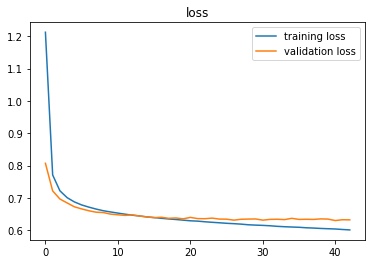

Plotting metrics...


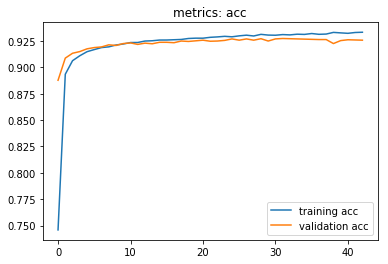

train {'acc': 0.9339455}
test {'acc': 0.9233}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4663101193503897354
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 536995136910425912
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3181996 , acc = 0.09 
t_cost <class 'dict'> 
train_op : 0.027074999999967986
loss_train : 0.018769000000247615
metric batch : 0.004820999999537889
whole : 0.05099499999960244
display_whole : 0.02383399999962421
Epoch 1 , step 100 , loss= 1.4229362 , acc = 0.68 
t_cost <class 'dict'> 
train_op : 0.004324999999880674
loss_train : 0.001916999999593827
metric batch : 0.00102100000003702
whole : 0.007797000000209664
display_whole : 0.003297999999631429
Epoch 1 , step 200 , 

Epoch 5 , step 300 , loss= 0.34114215 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004225000000587897
loss_train : 0.0021150000002307934
metric batch : 0.0009730000001582084
whole : 0.007787999999891326
display_whole : 0.003396000000066124
Epoch 5 , step 400 , loss= 0.1854122 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0031069999995452235
loss_train : 0.005818999999974039
metric batch : 0.0012539999997898121
whole : 0.010801999999785039
display_whole : 0.007510999999794876
Epoch 5 , step 500 , loss= 0.21034065 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003491000000394706
loss_train : 0.0019039999997403356
metric batch : 0.0010109999993801466
whole : 0.006916999999702966
display_whole : 0.003245999999307969
Epoch 5 , step 549 , loss= 0.33474883 val_loss= 0.27920324 , acc = 0.91 val acc = 0.918 
Epoch 5 finished, loss= 0.29489076 val loss= 0.27920324 ,  acc = 0.91689086 val acc = 0.918
*
t_cost <class 'dict'> 
train_op : 0.0035589999997682753
loss_train : 0.002411999999

Epoch 10 , step 50 , loss= 0.36884624 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003109999999651336
loss_train : 0.001825999999709893
metric batch : 0.00107300000036048
whole : 0.006476999999904365
display_whole : 0.003276999999798136
Epoch 10 , step 150 , loss= 0.29946715 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0040520000002288725
loss_train : 0.00215699999989738
metric batch : 0.0010780000002341694
whole : 0.007662999999411113
display_whole : 0.0034599999999045394
Epoch 10 , step 250 , loss= 0.26574218 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003910000000360014
loss_train : 0.0019869999996444676
metric batch : 0.0010900000006586197
whole : 0.007668999999623338
display_whole : 0.0036019999997733976
Epoch 10 , step 350 , loss= 0.28934357 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004463000000214379
loss_train : 0.002164999999877182
metric batch : 0.001133000000663742
whole : 0.008189999999558495
display_whole : 0.0035280000001876033
Epoch 10 , step 450 

Epoch 14 , step 549 , loss= 0.1062557 val_loss= 0.2579089 , acc = 0.98 val acc = 0.9284 
Epoch 14 finished, loss= 0.25180992 val loss= 0.2579089 ,  acc = 0.9294364 val acc = 0.9284
*
t_cost <class 'dict'> 
train_op : 0.00316700000075798
loss_train : 0.0018409999993309611
metric batch : 0.0009959999997590785
loss_val : 0.02418000000034226
metric_val : 0.020800999999664782
whole : 0.05200000000058935
display_whole : 0.048756000000139466
Epoch 15 , step 0 , loss= 0.22177446 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.006333999999696971
loss_train : 0.005298000000038883
metric batch : 0.0013150000004316098
whole : 0.013762999999926251
display_whole : 0.006973000000471075
Epoch 15 , step 100 , loss= 0.21544331 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004237999999531894
loss_train : 0.0023119999996197294
metric batch : 0.0011089999998148414
whole : 0.008127999999487656
display_whole : 0.003718999999364314
Epoch 15 , step 200 , loss= 0.26336965 , acc = 0.93 
t_cost <class 'dict

Epoch 19 , step 300 , loss= 0.31938565 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004997999999432068
loss_train : 0.00208199999997305
metric batch : 0.0009469999995417311
whole : 0.008495000000039
display_whole : 0.0033770000000004075
Epoch 19 , step 400 , loss= 0.16044676 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033349999994243262
loss_train : 0.0019139999994877144
metric batch : 0.0008810000008452334
whole : 0.006642999999712629
display_whole : 0.003133000000161701
Epoch 19 , step 500 , loss= 0.31444892 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003335999999762862
loss_train : 0.006769999999960419
metric batch : 0.0009320000008301577
whole : 0.011470999999801279
display_whole : 0.008037999999942258
Epoch 19 , step 549 , loss= 0.13936815 val_loss= 0.25050783 , acc = 0.98 val acc = 0.9302 
Epoch 19 finished, loss= 0.23917636 val loss= 0.25050783 ,  acc = 0.93207276 val acc = 0.9302
*
t_cost <class 'dict'> 
train_op : 0.004786999999851105
loss_train : 0.002125999

Epoch 24 , step 50 , loss= 0.23720586 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035410000000410946
loss_train : 0.0022109999999884167
metric batch : 0.0011539999995875405
whole : 0.007303000000320026
display_whole : 0.0035859999998137937
Epoch 24 , step 150 , loss= 0.46094662 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0040079999998852145
loss_train : 0.002431000000797212
metric batch : 0.0009270000000469736
whole : 0.007765999999719497
display_whole : 0.0036690000006274204
Epoch 24 , step 250 , loss= 0.24747166 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003600999999434862
loss_train : 0.00562400000035268
metric batch : 0.0010189999993599486
whole : 0.010760999999547494
display_whole : 0.006961000000046624
Epoch 24 , step 350 , loss= 0.16104664 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004130000000259315
loss_train : 0.017436999999517866
metric batch : 0.0010800000000017462
whole : 0.023122999999941385
display_whole : 0.018806000000040513
Epoch 24 , step 4

Epoch 28 , step 549 , loss= 0.117558286 val_loss= 0.24598886 , acc = 0.95 val acc = 0.9318 
Epoch 28 finished, loss= 0.22455902 val loss= 0.24598886 ,  acc = 0.93645453 val acc = 0.9318

t_cost <class 'dict'> 
train_op : 0.003327000000354019
loss_train : 0.0017210000005434267
metric batch : 0.0009810000001380104
loss_val : 0.023530000000391738
metric_val : 0.019890999999915948
whole : 0.0505829999992784
display_whole : 0.04710200000045006
Epoch 29 , step 0 , loss= 0.22329427 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.006873000000268803
loss_train : 0.006991000000198255
metric batch : 0.0009719999998196727
whole : 0.015499000000090746
display_whole : 0.008292999999866879
Epoch 29 , step 100 , loss= 0.3739194 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003193999999894004
loss_train : 0.0016869999999471474
metric batch : 0.0009959999997590785
whole : 0.0063669999999547144
display_whole : 0.003027000000656699
Epoch 29 , step 200 , loss= 0.24044624 , acc = 0.92 
t_cost <class 'd

Epoch 33 , step 300 , loss= 0.16608824 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003635000000031141
loss_train : 0.015726000000540807
metric batch : 0.0009939999999915017
whole : 0.02077099999951315
display_whole : 0.017058000000361062
Epoch 33 , step 400 , loss= 0.28983775 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003355000000738073
loss_train : 0.009703999999146617
metric batch : 0.0011969999995926628
whole : 0.014681999999993423
display_whole : 0.011230999999497726
Epoch 33 , step 500 , loss= 0.19173968 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003434000000197557
loss_train : 0.014560999999957858
metric batch : 0.0009950000003300374
whole : 0.019460000000435684
display_whole : 0.015871000000515778
Epoch 33 , step 549 , loss= 0.35773033 val_loss= 0.24496885 , acc = 0.92 val acc = 0.9302 
Epoch 33 finished, loss= 0.21823265 val loss= 0.24496885 ,  acc = 0.9377637 val acc = 0.9302

t_cost <class 'dict'> 
train_op : 0.003944000000046799
loss_train : 0.00208099999

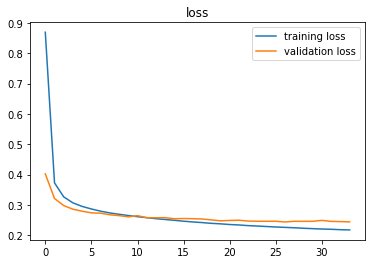

Plotting metrics...


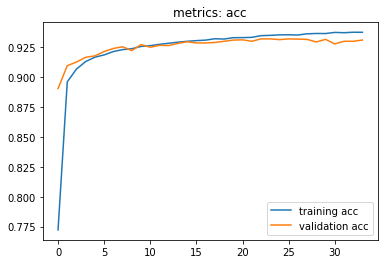

train {'acc': 0.93914545}
test {'acc': 0.9288}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9244921923823723924
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 5387292242267995621
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3024364 , acc = 0.05 
t_cost <class 'dict'> 
train_op : 0.02664699999968434
loss_train : 0.011803000000327302
metric batch : 0.004882000000179687
whole : 0.043661999999130785
display_whole : 0.016926999999668624
Epoch 1 , step 100 , loss= 2.2788916 , acc = 0.33 
t_cost <class 'dict'> 
train_op : 0.004405000000588188
loss_train : 0.006417999999939639
metric batch : 0.0009870000003502355
whole : 0.012345999999524793
display_whole : 0.007767000000058033
Epoch 1 , step 2

Epoch 5 , step 300 , loss= 1.8743641 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.003507999999783351
loss_train : 0.006953000000066822
metric batch : 0.0010070000007544877
whole : 0.0119620000004943
display_whole : 0.008372999999664898
Epoch 5 , step 400 , loss= 1.8233606 , acc = 0.82 
t_cost <class 'dict'> 
train_op : 0.0034059999998135027
loss_train : 0.0020709999998871353
metric batch : 0.0010190000002694433
whole : 0.006897000000208209
display_whole : 0.0033910000001924345
Epoch 5 , step 500 , loss= 1.869438 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.0033679999996820698
loss_train : 0.0017370000005030306
metric batch : 0.0009400000008099596
whole : 0.0064630000006218324
display_whole : 0.00300500000048487
Epoch 5 , step 549 , loss= 1.8846141 val_loss= 1.894526 , acc = 0.8 val acc = 0.8622 
Epoch 5 finished, loss= 1.914996 val loss= 1.894526 ,  acc = 0.8411273 val acc = 0.8622
*
t_cost <class 'dict'> 
train_op : 0.003543000000718166
loss_train : 0.004157999999733875
metr

Epoch 10 , step 50 , loss= 1.920603 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.003440999999838823
loss_train : 0.00211699999999837
metric batch : 0.00094600000011269
whole : 0.007106999999450636
display_whole : 0.0035269999998490675
Epoch 10 , step 150 , loss= 1.9120582 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.0039029999998092535
loss_train : 0.0022719999997207196
metric batch : 0.0009360000003653113
whole : 0.007717000000411645
display_whole : 0.0036000000000058208
Epoch 10 , step 250 , loss= 1.9277835 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0034369999993941747
loss_train : 0.0024859999994077953
metric batch : 0.0011079999994763057
whole : 0.007499000000279921
display_whole : 0.003899999999703141
Epoch 10 , step 350 , loss= 1.8798805 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0032540000001972658
loss_train : 0.0022109999999884167
metric batch : 0.0009509999999863794
whole : 0.006926000000021304
display_whole : 0.003500000000713044
Epoch 10 , step 450 ,

Epoch 14 , step 549 , loss= 1.8949564 val_loss= 1.8800434 , acc = 0.82 val acc = 0.873 
Epoch 14 finished, loss= 1.89913 val loss= 1.8800434 ,  acc = 0.86532724 val acc = 0.873
*
t_cost <class 'dict'> 
train_op : 0.0031989999997676932
loss_train : 0.004289000000426313
metric batch : 0.0008870000001479639
loss_val : 0.033158000000184984
metric_val : 0.021066999999675318
whole : 0.06366799999977957
display_whole : 0.060319000000163214
Epoch 15 , step 0 , loss= 1.9006281 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.007452999999259191
loss_train : 0.0018710000003920868
metric batch : 0.0012689999994108803
whole : 0.011062999999921885
display_whole : 0.0034219999997731065
Epoch 15 , step 100 , loss= 1.9444821 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.0034239999995406833
loss_train : 0.0024659999999130378
metric batch : 0.0011629999999058782
whole : 0.007620999999744527
display_whole : 0.00402600000052189
Epoch 15 , step 200 , loss= 1.9373397 , acc = 0.83 
t_cost <class 'dict'> 

Epoch 19 , step 300 , loss= 1.890275 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0034089999999196152
loss_train : 0.003373000000465254
metric batch : 0.001059999999597494
whole : 0.008351000000402564
display_whole : 0.004797999999937019
Epoch 19 , step 400 , loss= 1.8912064 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.003456999999798427
loss_train : 0.008163000000422471
metric batch : 0.0009610000006432529
whole : 0.01320800000030431
display_whole : 0.009584000000359083
Epoch 19 , step 500 , loss= 1.842334 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0032559999999648426
loss_train : 0.001922999999806052
metric batch : 0.0007900000000518048
whole : 0.006354000000101223
display_whole : 0.0030159999996612896
Epoch 19 , step 549 , loss= 1.9193071 val_loss= 1.8775389 , acc = 0.8 val acc = 0.8732 
Epoch 19 finished, loss= 1.8962696 val loss= 1.8775389 ,  acc = 0.8694909 val acc = 0.8732

t_cost <class 'dict'> 
train_op : 0.003909000000021479
loss_train : 0.007581000000755012


Epoch 24 , step 50 , loss= 1.8469905 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003080999999838241
loss_train : 0.0019210000000384753
metric batch : 0.001178999999865482
whole : 0.006498999999166699
display_whole : 0.003327000000354019
Epoch 24 , step 150 , loss= 1.9313246 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003596999999899708
loss_train : 0.0025730000006660703
metric batch : 0.0009089999994102982
whole : 0.007558000000244647
display_whole : 0.0037820000006831833
Epoch 24 , step 250 , loss= 1.9428618 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.003307999999378808
loss_train : 0.00531200000023091
metric batch : 0.0012549999992188532
whole : 0.01033000000006723
display_whole : 0.006844000000455708
Epoch 24 , step 350 , loss= 1.8601383 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.004262999999809836
loss_train : 0.008501999999680265
metric batch : 0.0009479999998802668
whole : 0.014202000000295811
display_whole : 0.009835999999268097
Epoch 24 , step 450 , los

Epoch 28 , step 549 , loss= 1.9172041 val_loss= 1.8754865 , acc = 0.85 val acc = 0.8756 
Epoch 28 finished, loss= 1.8936394 val loss= 1.8754865 ,  acc = 0.87216365 val acc = 0.8756

t_cost <class 'dict'> 
train_op : 0.0035200000002078013
loss_train : 0.0032490000003235764
metric batch : 0.0010049999991679215
loss_val : 0.024068000000625034
metric_val : 0.0200089999998454
whole : 0.05313600000044971
display_whole : 0.04944400000022142
Epoch 29 , step 0 , loss= 1.9172379 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.007262999999511521
loss_train : 0.0036719999998240382
metric batch : 0.0011559999993551173
whole : 0.012730000000374275
display_whole : 0.005117000000609551
Epoch 29 , step 100 , loss= 1.9437549 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0035950000001321314
loss_train : 0.006354999999530264
metric batch : 0.0011350000004313188
whole : 0.01148300000022573
display_whole : 0.0077110000001994194
Epoch 29 , step 200 , loss= 1.8909314 , acc = 0.84 
t_cost <class 'dict'> 

Epoch 33 , step 300 , loss= 1.8658252 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0032780000001366716
loss_train : 0.001734000000396918
metric batch : 0.000954000000092492
whole : 0.006365999999616179
display_whole : 0.0030029999998077983
Epoch 33 , step 400 , loss= 1.9603418 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003178999999363441
loss_train : 0.005920000000514847
metric batch : 0.0011450000001786975
whole : 0.010683000000426546
display_whole : 0.007340000000112923
Epoch 33 , step 500 , loss= 1.8687222 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.003972999999859894
loss_train : 0.0019949999996242695
metric batch : 0.001051999999617692
whole : 0.007541999999375548
display_whole : 0.0033929999999600113
Epoch 33 , step 549 , loss= 1.9255377 val_loss= 1.8747895 , acc = 0.81 val acc = 0.877 
Epoch 33 finished, loss= 1.8926667 val loss= 1.8747895 ,  acc = 0.87296367 val acc = 0.877

t_cost <class 'dict'> 
train_op : 0.0033489999996163533
loss_train : 0.005266000000119

Epoch 38 , step 50 , loss= 1.9322275 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.0035669999997480772
loss_train : 0.002502999999705935
metric batch : 0.0011549999999260763
whole : 0.00789100000019971
display_whole : 0.004180999999334745
Epoch 38 , step 150 , loss= 1.926287 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0031130000006669434
loss_train : 0.0016869999999471474
metric batch : 0.000954999999521533
whole : 0.006188000000292959
display_whole : 0.0029920000006313785
Epoch 38 , step 250 , loss= 1.7581226 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036119999995207763
loss_train : 0.00814399999944726
metric batch : 0.0010949999996228144
whole : 0.013275999999677879
display_whole : 0.00957399999970221
Epoch 38 , step 350 , loss= 1.8660275 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0043239999995421385
loss_train : 0.0024960000000646687
metric batch : 0.0009499999996478437
whole : 0.008418999999776133
display_whole : 0.003917000000001281
Epoch 38 , step 450 , l

Epoch 42 , step 549 , loss= 1.8834386 val_loss= 1.8735343 , acc = 0.82 val acc = 0.878 
Epoch 42 finished, loss= 1.8911905 val loss= 1.8735343 ,  acc = 0.8748182 val acc = 0.878

t_cost <class 'dict'> 
train_op : 0.0032110000001921435
loss_train : 0.0057940000006055925
metric batch : 0.0010480000000825385
loss_val : 0.04250599999977567
metric_val : 0.0212069999997766
whole : 0.07480500000019674
display_whole : 0.07140900000013062
Epoch 43 , step 0 , loss= 1.9168048 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.005873999999494117
loss_train : 0.016684999999597494
metric batch : 0.0010219999994660611
whole : 0.024148999999852094
display_whole : 0.018003999999564257
Epoch 43 , step 100 , loss= 1.8354745 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003606000000218046
loss_train : 0.007114999999430438
metric batch : 0.0009800000007089693
whole : 0.01218700000026729
display_whole : 0.008410999999796331
Epoch 43 , step 200 , loss= 1.9105637 , acc = 0.85 
t_cost <class 'dict'> 
train_

Epoch 47 , step 300 , loss= 1.8574809 , acc = 0.82 
t_cost <class 'dict'> 
train_op : 0.0032110000001921435
loss_train : 0.0021369999994931277
metric batch : 0.0009120000004259055
whole : 0.0066440000000511645
display_whole : 0.0033569999995961552
Epoch 47 , step 400 , loss= 1.8698949 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0031970000000001164
loss_train : 0.006092000000535336
metric batch : 0.0009780000000318978
whole : 0.010730999999395863
display_whole : 0.007374000000709202
Epoch 47 , step 500 , loss= 1.9143518 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0035939999997935956
loss_train : 0.007510999999794876
metric batch : 0.0009589999999661813
whole : 0.012518999999883818
display_whole : 0.00877299999956449
Epoch 47 , step 549 , loss= 1.8247472 val_loss= 1.8727269 , acc = 0.89 val acc = 0.8794 
Epoch 47 finished, loss= 1.8903626 val loss= 1.8727269 ,  acc = 0.8758 val acc = 0.8794

t_cost <class 'dict'> 
train_op : 0.003439000000071246
loss_train : 0.001817000000301

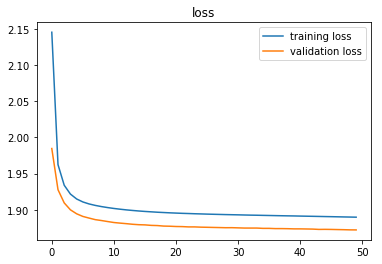

Plotting metrics...


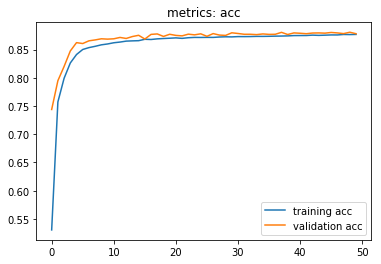

train {'acc': 0.8744}
test {'acc': 0.8704}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17711176416332050778
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 15332720901574078492
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3020356 , acc = 0.07 
t_cost <class 'dict'> 
train_op : 0.027054000000134693
loss_train : 0.014971000000514323
metric batch : 0.005323000000316824
whole : 0.0477020000007542
display_whole : 0.020537000000331318
Epoch 1 , step 100 , loss= 2.0727844 , acc = 0.69 
t_cost <class 'dict'> 
train_op : 0.0036029999992024386
loss_train : 0.0029329999997571576
metric batch : 0.0010949999996228144
whole : 0.008150999999998021
display_whole : 0.00438899999971909
Epoch 1 , step 2

Epoch 5 , step 300 , loss= 1.6140618 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036680000002888846
loss_train : 0.004514000000199303
metric batch : 0.0011020000001735752
whole : 0.009740000000419968
display_whole : 0.005971999999928812
Epoch 5 , step 400 , loss= 1.5959557 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.00359299999945506
loss_train : 0.001989000000321539
metric batch : 0.0009910000007948838
whole : 0.007004999999480788
display_whole : 0.00325299999985873
Epoch 5 , step 500 , loss= 1.7038871 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.004445999999916239
loss_train : 0.002741999999670952
metric batch : 0.0009640000007493654
whole : 0.008526999999958207
display_whole : 0.004001000000243948
Epoch 5 , step 549 , loss= 1.6828986 val_loss= 1.6502855 , acc = 0.93 val acc = 0.9116 
Epoch 5 finished, loss= 1.6629605 val loss= 1.6502855 ,  acc = 0.9075273 val acc = 0.9116
*
t_cost <class 'dict'> 
train_op : 0.003792999999859603
loss_train : 0.0026239999997414998
me

Epoch 10 , step 50 , loss= 1.548109 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004034999999930733
loss_train : 0.0023929999997562845
metric batch : 0.0011160000003656023
whole : 0.008078999999270309
display_whole : 0.00384699999995064
Epoch 10 , step 150 , loss= 1.5987923 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003628999999818916
loss_train : 0.0024020000000746222
metric batch : 0.0009939999999915017
whole : 0.007474000000001979
display_whole : 0.003689999999551219
Epoch 10 , step 250 , loss= 1.7489209 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0033770000000004075
loss_train : 0.0017539999998916755
metric batch : 0.0009960000006685732
whole : 0.006656999999904656
display_whole : 0.0031269999999494758
Epoch 10 , step 350 , loss= 1.6910567 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0032559999999648426
loss_train : 0.0024469999998473213
metric batch : 0.0008680000000822474
whole : 0.0070429999996122206
display_whole : 0.003620999999839114
Epoch 10 , step 450

Epoch 14 , step 549 , loss= 1.6103371 val_loss= 1.6221813 , acc = 0.9 val acc = 0.9158 
Epoch 14 finished, loss= 1.6233956 val loss= 1.6221813 ,  acc = 0.9169273 val acc = 0.9158

t_cost <class 'dict'> 
train_op : 0.0033920000005309703
loss_train : 0.002457999999933236
metric batch : 0.0010529999999562278
loss_val : 0.044469000000390224
metric_val : 0.021042999999735912
whole : 0.07357900000079098
display_whole : 0.07001099999979488
Epoch 15 , step 0 , loss= 1.590078 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.00687500000003638
loss_train : 0.007264999999279098
metric batch : 0.0011620000004768372
whole : 0.015776000000187196
display_whole : 0.00864000000001397
Epoch 15 , step 100 , loss= 1.6374984 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.0033849999999802094
loss_train : 0.0018540000000939472
metric batch : 0.0009120000004259055
whole : 0.006551000000399654
display_whole : 0.0030839999999443535
Epoch 15 , step 200 , loss= 1.5693834 , acc = 0.92 
t_cost <class 'dict'> 
tr

Epoch 19 , step 300 , loss= 1.5736253 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0038209999993341626
loss_train : 0.006244000000151573
metric batch : 0.0010749999992185622
whole : 0.011623999999756052
display_whole : 0.007708000000093307
Epoch 19 , step 400 , loss= 1.5699695 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0032479999999850406
loss_train : 0.002457999999933236
metric batch : 0.0010099999999511056
whole : 0.0073050000000876025
display_whole : 0.0038789999998698477
Epoch 19 , step 500 , loss= 1.6277022 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033700000003591413
loss_train : 0.0018129999998564017
metric batch : 0.0009620000000722939
whole : 0.006661000000349304
display_whole : 0.0031300000000555883
Epoch 19 , step 549 , loss= 1.7089278 val_loss= 1.6171596 , acc = 0.88 val acc = 0.9178 
Epoch 19 finished, loss= 1.6144096 val loss= 1.6171596 ,  acc = 0.91989094 val acc = 0.9178
*
t_cost <class 'dict'> 
train_op : 0.0036370000007082126
loss_train : 0.0073980

Epoch 24 , step 50 , loss= 1.49195 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.005388000000493776
loss_train : 0.0018079999999827123
metric batch : 0.0009229999996023253
whole : 0.00856599999951868
display_whole : 0.0030230000002120505
Epoch 24 , step 150 , loss= 1.5732808 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003523000000313914
loss_train : 0.005718999999771768
metric batch : 0.0009920000002239249
whole : 0.010696000000280037
display_whole : 0.007018999999672815
Epoch 24 , step 250 , loss= 1.6575675 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003501999999571126
loss_train : 0.0018849999996746192
metric batch : 0.0011669999994410318
whole : 0.006978999999773805
display_whole : 0.0033249999996769475
Epoch 24 , step 350 , loss= 1.5113723 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003905000000486325
loss_train : 0.007362999999713793
metric batch : 0.0011269999995420221
whole : 0.012827999999899475
display_whole : 0.00884200000018609
Epoch 24 , step 450 , los

Epoch 28 , step 549 , loss= 1.5845175 val_loss= 1.6149533 , acc = 0.92 val acc = 0.914 
Epoch 28 finished, loss= 1.6027814 val loss= 1.6149533 ,  acc = 0.92312723 val acc = 0.914

t_cost <class 'dict'> 
train_op : 0.0038050000002840534
loss_train : 0.0028229999998075073
metric batch : 0.000976999999693362
loss_val : 0.024808999999549997
metric_val : 0.021016000000599888
whole : 0.05497800000011921
display_whole : 0.05095900000014808
Epoch 29 , step 0 , loss= 1.5701109 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.006859000000076776
loss_train : 0.004492999999456515
metric batch : 0.0009720000007291674
whole : 0.01292600000033417
display_whole : 0.005769999999756692
Epoch 29 , step 100 , loss= 1.5883948 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0032219999993685633
loss_train : 0.002502000000276894
metric batch : 0.0009690000006230548
whole : 0.007150999999794294
display_whole : 0.0037600000005113543
Epoch 29 , step 200 , loss= 1.5420556 , acc = 0.92 
t_cost <class 'dict'> 
t

Epoch 33 , step 300 , loss= 1.5229881 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003547999999682361
loss_train : 0.001855999999861524
metric batch : 0.001097999999728927
whole : 0.007008999999925436
display_whole : 0.003275000000030559
Epoch 33 , step 400 , loss= 1.5479808 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034500000001571607
loss_train : 0.002066000000013446
metric batch : 0.0009820000004765461
whole : 0.0070640000003550085
display_whole : 0.00340299999970739
Epoch 33 , step 500 , loss= 1.5931728 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033370000001013977
loss_train : 0.0027060000002165907
metric batch : 0.000976000000264321
whole : 0.007448000000294996
display_whole : 0.004016000000774511
Epoch 33 , step 549 , loss= 1.7194501 val_loss= 1.6101682 , acc = 0.87 val acc = 0.9176 
Epoch 33 finished, loss= 1.5979475 val loss= 1.6101682 ,  acc = 0.9250364 val acc = 0.9176

t_cost <class 'dict'> 
train_op : 0.0033100000000558794
loss_train : 0.002166999999644

Epoch 38 , step 50 , loss= 1.6033472 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.00343200000042998
loss_train : 0.001984999999876891
metric batch : 0.0010130000000572181
whole : 0.006838999999672524
display_whole : 0.0033109999994849204
Epoch 38 , step 150 , loss= 1.520793 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.004453999999896041
loss_train : 0.0019259999999121646
metric batch : 0.0009870000003502355
whole : 0.0078269999994518
display_whole : 0.0032110000001921435
Epoch 38 , step 250 , loss= 1.5293386 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036090000003241585
loss_train : 0.003937999999834574
metric batch : 0.001120999999329797
whole : 0.009183000000120956
display_whole : 0.00546200000007957
Epoch 38 , step 350 , loss= 1.688755 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0038489999997182167
loss_train : 0.002432000000226253
metric batch : 0.0010869999996430124
whole : 0.007980000000316068
display_whole : 0.003935000000637956
Epoch 38 , step 450 , loss= 

Epoch 42 , step 549 , loss= 1.7709553 val_loss= 1.6086375 , acc = 0.88 val acc = 0.9172 
Epoch 42 finished, loss= 1.591579 val loss= 1.6086375 ,  acc = 0.92627275 val acc = 0.9172

t_cost <class 'dict'> 
train_op : 0.002957000000606058
loss_train : 0.0018220000001747394
metric batch : 0.0009330000002591987
loss_val : 0.02442200000041339
metric_val : 0.020986999999877298
whole : 0.05245199999990291
display_whole : 0.04933400000027177
Epoch 43 , step 0 , loss= 1.5806904 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.006296999999904074
loss_train : 0.00542200000018056
metric batch : 0.0010959999999613501
whole : 0.013504999999895517
display_whole : 0.006722999999510648
Epoch 43 , step 100 , loss= 1.6305304 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0036000000000058208
loss_train : 0.0018239999999423162
metric batch : 0.0009119999995164108
whole : 0.0068629999996119295
display_whole : 0.0030290000004242756
Epoch 43 , step 200 , loss= 1.5132145 , acc = 0.96 
t_cost <class 'dict'> 

Epoch 47 , step 300 , loss= 1.554437 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003386999999747786
loss_train : 0.0019279999996797414
metric batch : 0.0010229999998045969
whole : 0.0069679999996878905
display_whole : 0.003412000000025728
Epoch 47 , step 400 , loss= 1.632143 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0031349999999292777
loss_train : 0.0031970000000001164
metric batch : 0.0009970000000976142
whole : 0.007736000000477361
display_whole : 0.004504999999880965
Epoch 47 , step 500 , loss= 1.5067686 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003499999999803549
loss_train : 0.0024690000000191503
metric batch : 0.0009570000001986045
whole : 0.007389999999759311
display_whole : 0.0037200000006123446
Epoch 47 , step 549 , loss= 1.5091505 val_loss= 1.6087453 , acc = 0.95 val acc = 0.917 
Epoch 47 finished, loss= 1.5882473 val loss= 1.6087453 ,  acc = 0.9278909 val acc = 0.917

t_cost <class 'dict'> 
train_op : 0.003927000000658154
loss_train : 0.003897999999935

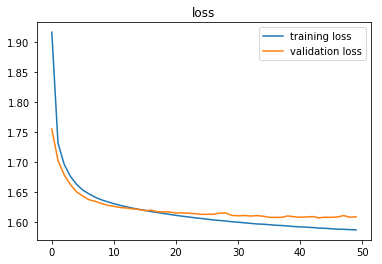

Plotting metrics...


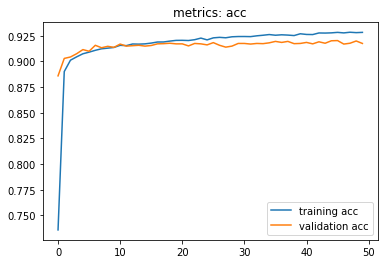

train {'acc': 0.9292727}
test {'acc': 0.9168}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12919539080283305118
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 12604198972879797701
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2976274 , acc = 0.13 
t_cost <class 'dict'> 
train_op : 0.026675000000068394
loss_train : 0.01103400000010879
metric batch : 0.005071999999927357
whole : 0.04311200000029203
display_whole : 0.01634399999966263
Epoch 1 , step 100 , loss= 1.8242993 , acc = 0.7 
t_cost <class 'dict'> 
train_op : 0.003583000000617176
loss_train : 0.011477000000013504
metric batch : 0.0009810000001380104
whole : 0.016659999999319552
display_whole : 0.012894000000414962
Epoch 1 , step 200

Epoch 5 , step 300 , loss= 1.1941656 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004498000000239699
loss_train : 0.0023400000000037835
metric batch : 0.0011309999999866704
whole : 0.008391000000301574
display_whole : 0.0037080000001878943
Epoch 5 , step 400 , loss= 1.139781 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0032639999999446445
loss_train : 0.00238199999967037
metric batch : 0.001012000000628177
whole : 0.007330000000365544
display_whole : 0.0038720000002285815
Epoch 5 , step 500 , loss= 1.2164174 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003695000000334403
loss_train : 0.005608000000393076
metric batch : 0.0011249999997744453
whole : 0.011002999999618623
display_whole : 0.00716400000055728
Epoch 5 , step 549 , loss= 1.2168449 val_loss= 1.2229042 , acc = 0.92 val acc = 0.9222 
Epoch 5 finished, loss= 1.2353766 val loss= 1.2229042 ,  acc = 0.9140727 val acc = 0.9222
*
t_cost <class 'dict'> 
train_op : 0.003380999999535561
loss_train : 0.0030750000005355105
m

Epoch 10 , step 50 , loss= 1.1720365 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.00387600000067323
loss_train : 0.006236999999600812
metric batch : 0.0011409999997340492
whole : 0.011596999999710533
display_whole : 0.007644999999683932
Epoch 10 , step 150 , loss= 1.3563949 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003831999999420077
loss_train : 0.003470000000561413
metric batch : 0.0009099999997488339
whole : 0.008820000000014261
display_whole : 0.004807000000255357
Epoch 10 , step 250 , loss= 1.3971643 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.004284999999981665
loss_train : 0.00204200000007404
metric batch : 0.0011139999996885308
whole : 0.007851999999729742
display_whole : 0.0034079999995810795
Epoch 10 , step 350 , loss= 1.1910745 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0035659999994095415
loss_train : 0.0021600000000034925
metric batch : 0.0010250000004816684
whole : 0.007206000000223867
display_whole : 0.0034970000006069313
Epoch 10 , step 450 , l

Epoch 14 , step 549 , loss= 1.25295 val_loss= 1.207425 , acc = 0.91 val acc = 0.9274 
Epoch 14 finished, loss= 1.2060657 val loss= 1.207425 ,  acc = 0.9239454 val acc = 0.9274
*
t_cost <class 'dict'> 
train_op : 0.0039040000001477893
loss_train : 0.0021270000006552436
metric batch : 0.0009860000000116997
loss_val : 0.02828999999928783
metric_val : 0.01985400000012305
whole : 0.05645199999980832
display_whole : 0.052373000000443426
Epoch 15 , step 0 , loss= 1.1737921 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.007544999999481661
loss_train : 0.007203999999546795
metric batch : 0.0010750000001280569
whole : 0.01648300000033487
display_whole : 0.008705999999619962
Epoch 15 , step 100 , loss= 1.2073969 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0036199999995005783
loss_train : 0.004832000000533299
metric batch : 0.001186999999845284
whole : 0.010108999999829393
display_whole : 0.006263000000217289
Epoch 15 , step 200 , loss= 1.2375743 , acc = 0.91 
t_cost <class 'dict'> 
train

Epoch 19 , step 300 , loss= 1.2847135 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003576000000066415
loss_train : 0.0018069999996441766
metric batch : 0.0009359999994558166
whole : 0.006723000000420143
display_whole : 0.0030630000001110602
Epoch 19 , step 400 , loss= 1.1919706 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003566000000319036
loss_train : 0.004926999999952386
metric batch : 0.0009330000002591987
whole : 0.01015099999949598
display_whole : 0.006438000000343891
Epoch 19 , step 500 , loss= 1.2332226 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003627000000051339
loss_train : 0.006097000000409025
metric batch : 0.0012620000006791088
whole : 0.011362000000190164
display_whole : 0.007660000000214495
Epoch 19 , step 549 , loss= 1.1770631 val_loss= 1.2068315 , acc = 0.91 val acc = 0.9246 
Epoch 19 finished, loss= 1.1988945 val loss= 1.2068315 ,  acc = 0.92670906 val acc = 0.9246

t_cost <class 'dict'> 
train_op : 0.003161999999974796
loss_train : 0.0051670000002559

Epoch 24 , step 50 , loss= 1.1384227 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0031579999995301478
loss_train : 0.0022349999999278225
metric batch : 0.0008920000000216532
whole : 0.007004999999480788
display_whole : 0.003687999999783642
Epoch 24 , step 150 , loss= 1.1167643 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003717000000506232
loss_train : 0.006147000000055414
metric batch : 0.0009140000001934823
whole : 0.01137899999957881
display_whole : 0.007550000000264845
Epoch 24 , step 250 , loss= 1.2373195 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003177000000505359
loss_train : 0.0024769999999989523
metric batch : 0.001067999999577296
whole : 0.007106999999450636
display_whole : 0.0038510000003952882
Epoch 24 , step 350 , loss= 1.23603 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0031779999999344
loss_train : 0.004214000000501983
metric batch : 0.0009939999999915017
whole : 0.008780999999544292
display_whole : 0.005529000000024098
Epoch 24 , step 450 , loss=

Epoch 28 , step 549 , loss= 1.1686335 val_loss= 1.2050599 , acc = 0.93 val acc = 0.9268 
Epoch 28 finished, loss= 1.1897768 val loss= 1.2050599 ,  acc = 0.92907274 val acc = 0.9268

Stop training, val_acc didn't improve more than 10 epoch. 
Student performance with temperature = 32 , coef_softloss = 0.5 ,tmp_effi = 1 . 
Plotting loss...


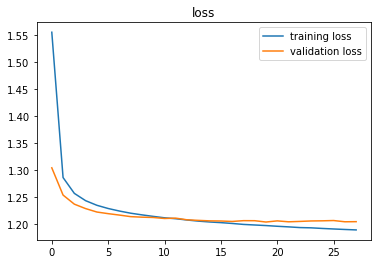

Plotting metrics...


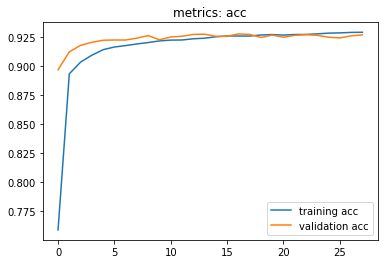

train {'acc': 0.9304909}
test {'acc': 0.9224}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17324462610116381035
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 12802523920318311536
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.290451 , acc = 0.09 
t_cost <class 'dict'> 
train_op : 0.02868800000032934
loss_train : 0.016717000000426196
metric batch : 0.005326000000422937
whole : 0.05120199999964825
display_whole : 0.022431000000324275
Epoch 1 , step 100 , loss= 1.6111673 , acc = 0.68 
t_cost <class 'dict'> 
train_op : 0.0034880000002885936
loss_train : 0.004390000000057626
metric batch : 0.0011059999997087289
whole : 0.009474999999838474
display_whole : 0.005807000000459084
Epoch 1 , step

Epoch 5 , step 300 , loss= 0.8544861 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003455999999459891
loss_train : 0.0078089999997246196
metric batch : 0.0011029999996026163
whole : 0.012831000000005588
display_whole : 0.00916999999935797
Epoch 5 , step 400 , loss= 0.78240997 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003365999999914493
loss_train : 0.002312999999958265
metric batch : 0.000984000000244123
whole : 0.007196999999905529
display_whole : 0.0036849999996775296
Epoch 5 , step 500 , loss= 0.6744604 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003921000000445929
loss_train : 0.006766999999854306
metric batch : 0.0009740000004967442
whole : 0.012247000000570551
display_whole : 0.00813899999957357
Epoch 5 , step 549 , loss= 0.7560523 val_loss= 0.7611543 , acc = 0.94 val acc = 0.9178 
Epoch 5 finished, loss= 0.76927817 val loss= 0.7611543 ,  acc = 0.9158 val acc = 0.9178
*
t_cost <class 'dict'> 
train_op : 0.003711999999723048
loss_train : 0.01215299999967101
metri

Epoch 10 , step 50 , loss= 0.67247736 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003829000000223459
loss_train : 0.0026010000001406297
metric batch : 0.0010529999999562278
whole : 0.008060000000114087
display_whole : 0.004081000000041968
Epoch 10 , step 150 , loss= 0.76534873 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0035339999994903337
loss_train : 0.0019650000003821333
metric batch : 0.0012150000002293382
whole : 0.007227999999486201
display_whole : 0.003523000000313914
Epoch 10 , step 250 , loss= 0.644699 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003201999999873806
loss_train : 0.0017900000002555316
metric batch : 0.0010439999996378901
whole : 0.006588000000192551
display_whole : 0.003303000000414613
Epoch 10 , step 350 , loss= 0.69878346 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004036000000269269
loss_train : 0.0022500000004583853
metric batch : 0.001036000000567583
whole : 0.007688000000598549
display_whole : 0.0035809999999401043
Epoch 10 , step 45

Epoch 14 , step 549 , loss= 0.73513365 val_loss= 0.74838954 , acc = 0.93 val acc = 0.9268 
Epoch 14 finished, loss= 0.7411244 val loss= 0.74838954 ,  acc = 0.92554545 val acc = 0.9268
*
t_cost <class 'dict'> 
train_op : 0.00310300000001007
loss_train : 0.01142100000015489
metric batch : 0.0009879999997792765
loss_val : 0.025986999999986438
metric_val : 0.02118700000028184
whole : 0.06368500000007771
display_whole : 0.06049499999971886
Epoch 15 , step 0 , loss= 0.7385788 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.005857000000105472
loss_train : 0.004136999999900581
metric batch : 0.0019240000001445878
whole : 0.012681999999585969
display_whole : 0.00636800000029325
Epoch 15 , step 100 , loss= 0.75359774 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036540000000968575
loss_train : 0.0021369999994931277
metric batch : 0.0011819999999715947
whole : 0.007378999999673397
display_whole : 0.0036039999995409744
Epoch 15 , step 200 , loss= 0.7292272 , acc = 0.92 
t_cost <class 'dict'

Epoch 19 , step 300 , loss= 0.7811268 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003485000000182481
loss_train : 0.0025580000001355074
metric batch : 0.0009939999999915017
whole : 0.007625999999618216
display_whole : 0.00397400000019843
Epoch 19 , step 400 , loss= 0.83708656 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0032439999995403923
loss_train : 0.0017680000000837026
metric batch : 0.000857999999425374
whole : 0.006336000000374042
display_whole : 0.0029279999998834683
Epoch 19 , step 500 , loss= 0.83358943 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0030909999995856197
loss_train : 0.002041000000644999
metric batch : 0.0011019999992640805
whole : 0.006685999999717751
display_whole : 0.0034190000005764887
Epoch 19 , step 549 , loss= 0.75178415 val_loss= 0.74539894 , acc = 0.9 val acc = 0.9264 
Epoch 19 finished, loss= 0.7345045 val loss= 0.74539894 ,  acc = 0.9286364 val acc = 0.9264

t_cost <class 'dict'> 
train_op : 0.003386000000318745
loss_train : 0.002038000

Epoch 24 , step 50 , loss= 0.61279035 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.004656999999497202
loss_train : 0.003290999999990163
metric batch : 0.0011079999994763057
whole : 0.009449000000131491
display_whole : 0.0047130000002653105
Epoch 24 , step 150 , loss= 0.6734336 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0037750000001324224
loss_train : 0.01568200000019715
metric batch : 0.0012010000000373111
whole : 0.02116799999930663
display_whole : 0.01723599999968428
Epoch 24 , step 250 , loss= 0.64864993 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0038250000006883056
loss_train : 0.005930999999691267
metric batch : 0.0010849999998754356
whole : 0.011319000000185042
display_whole : 0.007325999999920896
Epoch 24 , step 350 , loss= 0.74194753 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003507999999783351
loss_train : 0.0021809999998367857
metric batch : 0.0011469999999462743
whole : 0.00735400000030495
display_whole : 0.0036620000000766595
Epoch 24 , step 450 ,

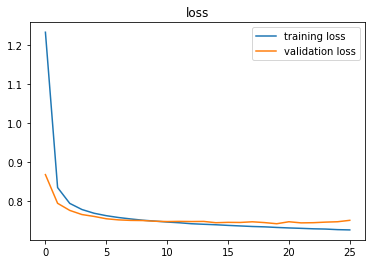

Plotting metrics...


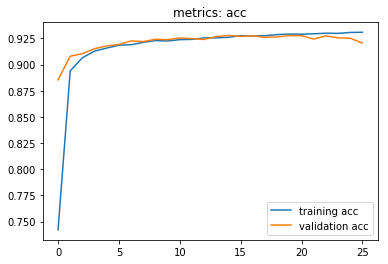

train {'acc': 0.9282182}
test {'acc': 0.92}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5149186025934564322
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 5688747553498547706
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3472717 , acc = 0.08 
t_cost <class 'dict'> 
train_op : 0.033308000000033644
loss_train : 0.019166000000041095
metric batch : 0.005933000000368338
whole : 0.05881099999987782
display_whole : 0.025409000000763626
Epoch 1 , step 100 , loss= 1.3896041 , acc = 0.68 
t_cost <class 'dict'> 
train_op : 0.004439999999704014
loss_train : 0.012697000000116532
metric batch : 0.0020260000001144363
whole : 0.01965699999982462
display_whole : 0.015113999999812222
Epoch 1 , step 200 ,

Epoch 5 , step 300 , loss= 0.3742862 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.005055999999967753
loss_train : 0.012453999999706866
metric batch : 0.0014400000000023283
whole : 0.019285999999738124
display_whole : 0.014051000000108615
Epoch 5 , step 400 , loss= 0.3525546 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003636999999798718
loss_train : 0.0027549999995244434
metric batch : 0.0011739999999917927
whole : 0.008232999999563617
display_whole : 0.004421999999976833
Epoch 5 , step 500 , loss= 0.27346683 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0032359999995605904
loss_train : 0.004003000000011525
metric batch : 0.0010440000005473848
whole : 0.00858200000038778
display_whole : 0.0052720000003319
Epoch 5 , step 549 , loss= 0.24129975 val_loss= 0.2853968 , acc = 0.94 val acc = 0.9208 
Epoch 5 finished, loss= 0.3003483 val loss= 0.2853968 ,  acc = 0.9150545 val acc = 0.9208
*
t_cost <class 'dict'> 
train_op : 0.00408400000014808
loss_train : 0.013492999999471067
me

Epoch 10 , step 50 , loss= 0.25818923 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0034740000000965665
loss_train : 0.0033020000000760774
metric batch : 0.0008899999993445817
whole : 0.008291999999528343
display_whole : 0.004642000000785629
Epoch 10 , step 150 , loss= 0.13501799 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0033770000000004075
loss_train : 0.0023649999993722304
metric batch : 0.0009689999997135601
whole : 0.007160000000112632
display_whole : 0.003635999999460182
Epoch 10 , step 250 , loss= 0.12669362 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.004160999999839987
loss_train : 0.007921999999780382
metric batch : 0.0009500000005573384
whole : 0.013512000000446278
display_whole : 0.00918900000033318
Epoch 10 , step 350 , loss= 0.26916963 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003755000000637665
loss_train : 0.0020220000005792826
metric batch : 0.000954999999521533
whole : 0.007278999999471125
display_whole : 0.003417000000808912
Epoch 10 , step 45

Epoch 14 , step 549 , loss= 0.21718779 val_loss= 0.26618743 , acc = 0.91 val acc = 0.9246 
Epoch 14 finished, loss= 0.2576299 val loss= 0.26618743 ,  acc = 0.92754537 val acc = 0.9246

t_cost <class 'dict'> 
train_op : 0.004286999999749241
loss_train : 0.00384699999995064
metric batch : 0.001111000000491913
loss_val : 0.0260920000000624
metric_val : 0.01989400000002206
whole : 0.05656900000030873
display_whole : 0.052123999999821535
Epoch 15 , step 0 , loss= 0.18916687 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.007312000000638363
loss_train : 0.005173000000468164
metric batch : 0.0009589999999661813
whole : 0.014198999999280204
display_whole : 0.006473999999798252
Epoch 15 , step 100 , loss= 0.31449035 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0028710000005958136
loss_train : 0.0017250000000785803
metric batch : 0.0009559999998600688
whole : 0.005994999999529682
display_whole : 0.0029789999998683925
Epoch 15 , step 200 , loss= 0.19969544 , acc = 0.95 
t_cost <class 'dict

Epoch 19 , step 300 , loss= 0.2589004 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003424999999879219
loss_train : 0.010581000000456697
metric batch : 0.0011830000003101304
whole : 0.015728999999737425
display_whole : 0.012139000000388478
Epoch 19 , step 400 , loss= 0.15252058 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003905000000486325
loss_train : 0.006031999999322579
metric batch : 0.0010219999994660611
whole : 0.011376999999811233
display_whole : 0.007386999999653199
Epoch 19 , step 500 , loss= 0.24952644 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003446000000622007
loss_train : 0.007143999999243533
metric batch : 0.001012000000628177
whole : 0.012085000000297441
display_whole : 0.008483999999953085
Epoch 19 , step 549 , loss= 0.29443464 val_loss= 0.2594671 , acc = 0.92 val acc = 0.9268 
Epoch 19 finished, loss= 0.24623604 val loss= 0.2594671 ,  acc = 0.9311455 val acc = 0.9268

t_cost <class 'dict'> 
train_op : 0.003959000000577362
loss_train : 0.00201199999992

Epoch 24 , step 50 , loss= 0.24646209 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004219999999804713
loss_train : 0.0030970000007073395
metric batch : 0.0011620000004768372
whole : 0.008972000000539992
display_whole : 0.004591000000800705
Epoch 24 , step 150 , loss= 0.24131861 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003673999999591615
loss_train : 0.009057000000211701
metric batch : 0.001172000000224216
whole : 0.014278999999987718
display_whole : 0.01051499999994121
Epoch 24 , step 250 , loss= 0.34602585 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003531000000293716
loss_train : 0.0020080000003872556
metric batch : 0.0011059999997087289
whole : 0.00720400000045629
display_whole : 0.0034299999997529085
Epoch 24 , step 350 , loss= 0.2472748 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003922999999304011
loss_train : 0.002680999999938649
metric batch : 0.000990000000456348
whole : 0.008009999999558204
display_whole : 0.004010999999991327
Epoch 24 , step 450 , l

Epoch 28 , step 549 , loss= 0.30162916 val_loss= 0.25690022 , acc = 0.89 val acc = 0.927 
Epoch 28 finished, loss= 0.23396778 val loss= 0.25690022 ,  acc = 0.9346727 val acc = 0.927

t_cost <class 'dict'> 
train_op : 0.003281000000242784
loss_train : 0.01116699999965931
metric batch : 0.0010000000002037268
loss_val : 0.026575999999295163
metric_val : 0.01971899999989546
whole : 0.06308400000034453
display_whole : 0.05964099999982864
Epoch 29 , step 0 , loss= 0.19754227 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.0058690000005299225
loss_train : 0.008153000000675092
metric batch : 0.0009229999996023253
whole : 0.015971999999237596
display_whole : 0.009492000000136613
Epoch 29 , step 100 , loss= 0.24481183 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.003373999999894295
loss_train : 0.0058779999999387655
metric batch : 0.0010769999998956337
whole : 0.010863999999855878
display_whole : 0.00738900000033027
Epoch 29 , step 200 , loss= 0.33555686 , acc = 0.89 
t_cost <class 'dict'> 

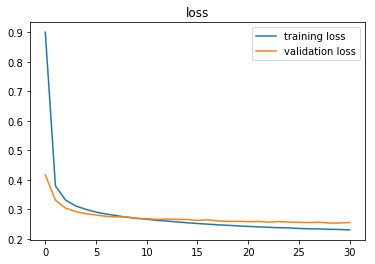

Plotting metrics...


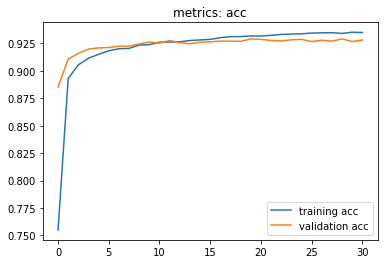

train {'acc': 0.93585455}
test {'acc': 0.9272}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16536366739284235082
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 9377923960791659099
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3024743 , acc = 0.12 
t_cost <class 'dict'> 
train_op : 0.027049999999690044
loss_train : 0.011277999999947497
metric batch : 0.005001999999876716
whole : 0.0436970000000656
display_whole : 0.016563000000132888
Epoch 1 , step 100 , loss= 2.2949288 , acc = 0.31 
t_cost <class 'dict'> 
train_op : 0.0036520000003292807
loss_train : 0.0018480000007912167
metric batch : 0.0009159999999610591
whole : 0.006894000000102096
display_whole : 0.003139000000373926
Epoch 1 , step

Epoch 5 , step 300 , loss= 2.2321796 , acc = 0.81 
t_cost <class 'dict'> 
train_op : 0.003561000000445347
loss_train : 0.0026709999992817757
metric batch : 0.0012419999993653619
whole : 0.007827000000361295
display_whole : 0.0041430000001128064
Epoch 5 , step 400 , loss= 2.2136781 , acc = 0.83 
t_cost <class 'dict'> 
train_op : 0.0032320000000254367
loss_train : 0.00268199999936769
metric batch : 0.001043000000208849
whole : 0.007477999999537133
display_whole : 0.004083999999238586
Epoch 5 , step 500 , loss= 2.2241802 , acc = 0.82 
t_cost <class 'dict'> 
train_op : 0.003621999999268155
loss_train : 0.0073350000002392335
metric batch : 0.0010889999994105892
whole : 0.012555000000247674
display_whole : 0.008763000000726606
Epoch 5 , step 549 , loss= 2.2161083 val_loss= 2.213026 , acc = 0.82 val acc = 0.8344 
Epoch 5 finished, loss= 2.2184234 val loss= 2.213026 ,  acc = 0.82245463 val acc = 0.8344
*
t_cost <class 'dict'> 
train_op : 0.003770000000258733
loss_train : 0.003137000000606349
m

Epoch 10 , step 50 , loss= 2.2157357 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0033390000007784693
loss_train : 0.004492000000027474
metric batch : 0.0010249999995721737
whole : 0.00927400000000489
display_whole : 0.005851000000802742
Epoch 10 , step 150 , loss= 2.2071679 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.004467000000659027
loss_train : 0.005711999999221007
metric batch : 0.0010440000005473848
whole : 0.011694000000716187
display_whole : 0.007063999999445514
Epoch 10 , step 250 , loss= 2.203311 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0033229999999093707
loss_train : 0.002379999999902793
metric batch : 0.0009049999998751446
whole : 0.006982999999308959
display_whole : 0.003574000000298838
Epoch 10 , step 350 , loss= 2.2148151 , acc = 0.82 
t_cost <class 'dict'> 
train_op : 0.004581000000143831
loss_train : 0.00659799999993993
metric batch : 0.0010790000005727052
whole : 0.012660999999752676
display_whole : 0.007995999999366177
Epoch 10 , step 450 , loss

Epoch 14 , step 549 , loss= 2.204594 val_loss= 2.209629 , acc = 0.82 val acc = 0.855 
Epoch 14 finished, loss= 2.21443 val loss= 2.209629 ,  acc = 0.84720004 val acc = 0.855
*
t_cost <class 'dict'> 
train_op : 0.0034769999992931844
loss_train : 0.010573999999905936
metric batch : 0.0009099999997488339
loss_val : 0.024002000000109547
metric_val : 0.021098000000165484
whole : 0.06147099999998318
display_whole : 0.05786199999965902
Epoch 15 , step 0 , loss= 2.2126167 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.005995999999868218
loss_train : 0.003576999999495456
metric batch : 0.0012040000001434237
whole : 0.01187500000014552
display_whole : 0.005102000000078988
Epoch 15 , step 100 , loss= 2.2219899 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.0034500000001571607
loss_train : 0.0024690000000191503
metric batch : 0.001150999999481428
whole : 0.007595000000037544
display_whole : 0.0039859999997133855
Epoch 15 , step 200 , loss= 2.2221835 , acc = 0.88 
t_cost <class 'dict'> 
train

Epoch 19 , step 300 , loss= 2.2150817 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0038270000004558824
loss_train : 0.0025340000001961016
metric batch : 0.0010790000005727052
whole : 0.007751000000098429
display_whole : 0.0038480000002891757
Epoch 19 , step 400 , loss= 2.2079265 , acc = 0.85 
t_cost <class 'dict'> 
train_op : 0.003434999999626598
loss_train : 0.004061999999976251
metric batch : 0.001216999999996915
whole : 0.00904400000035821
display_whole : 0.0055409999995390535
Epoch 19 , step 500 , loss= 2.204089 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0035850000003847526
loss_train : 0.005106000000523636
metric batch : 0.0009960000006685732
whole : 0.010256999999910477
display_whole : 0.006487999999990279
Epoch 19 , step 549 , loss= 2.2155466 val_loss= 2.209015 , acc = 0.85 val acc = 0.8552 
Epoch 19 finished, loss= 2.2137012 val loss= 2.209015 ,  acc = 0.84694546 val acc = 0.8552

t_cost <class 'dict'> 
train_op : 0.0034009999999398133
loss_train : 0.002502999999705

Epoch 24 , step 50 , loss= 2.2194767 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.00993300000027375
loss_train : 0.012593999999808148
metric batch : 0.0019509999992806115
whole : 0.025402999999641906
display_whole : 0.015241000000060012
Epoch 24 , step 150 , loss= 2.2021446 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.006890999999995984
loss_train : 0.005422999999609601
metric batch : 0.001983000000109314
whole : 0.015294000000722008
display_whole : 0.008100999999442138
Epoch 24 , step 250 , loss= 2.2246535 , acc = 0.84 
t_cost <class 'dict'> 
train_op : 0.007045000000289292
loss_train : 0.0038480000002891757
metric batch : 0.0020489999997153063
whole : 0.013724999999794818
display_whole : 0.00634500000069238
Epoch 24 , step 350 , loss= 2.2040648 , acc = 0.86 
t_cost <class 'dict'> 
train_op : 0.006986000000324566
loss_train : 0.003985000000284344
metric batch : 0.002013000000260945
whole : 0.014095000000452274
display_whole : 0.006797000000005937
Epoch 24 , step 450 , loss= 

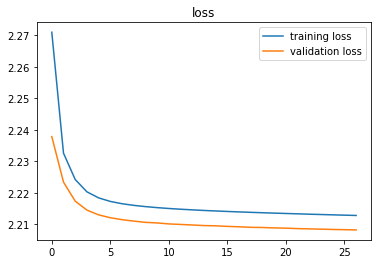

Plotting metrics...


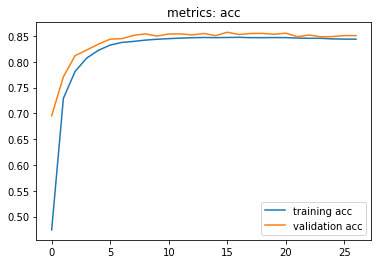

train {'acc': 0.8463455}
test {'acc': 0.8484}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5265442211254539063
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 5604719049651643965
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2986445 , acc = 0.15 
t_cost <class 'dict'> 
train_op : 0.031138000000282773
loss_train : 0.013713999999708903
metric batch : 0.004951000000801287
whole : 0.05014599999958591
display_whole : 0.01890000000003056
Epoch 1 , step 100 , loss= 2.0410287 , acc = 0.73 
t_cost <class 'dict'> 
train_op : 0.003636000000369677
loss_train : 0.0020459999996091938
metric batch : 0.0012489999999161228
whole : 0.007392000000436383
display_whole : 0.003590000000258442
Epoch 1 , step 

Epoch 5 , step 300 , loss= 1.8798885 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.002860000000509899
loss_train : 0.004507999999987078
metric batch : 0.000962999999501335
whole : 0.00884200000018609
display_whole : 0.005817999999635504
Epoch 5 , step 400 , loss= 1.7882231 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0033489999996163533
loss_train : 0.0018640000007508206
metric batch : 0.0009920000002239249
whole : 0.0065300000005663605
display_whole : 0.0030820000001767767
Epoch 5 , step 500 , loss= 1.8682423 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0034079999995810795
loss_train : 0.0032110000001921435
metric batch : 0.001097999999728927
whole : 0.008187999999790918
display_whole : 0.004592000000229746
Epoch 5 , step 549 , loss= 1.7748686 val_loss= 1.7780099 , acc = 0.9 val acc = 0.92 
Epoch 5 finished, loss= 1.7807099 val loss= 1.7780099 ,  acc = 0.9150363 val acc = 0.92
*
t_cost <class 'dict'> 
train_op : 0.003079999999499705
loss_train : 0.0017320000006293412
met

Epoch 10 , step 50 , loss= 1.7697923 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003748999999515945
loss_train : 0.0019410000004427275
metric batch : 0.0010969999993903912
whole : 0.0072909999998955755
display_whole : 0.0033660000008239876
Epoch 10 , step 150 , loss= 1.7845565 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004202000000077533
loss_train : 0.005452000000332191
metric batch : 0.0009220000001732842
whole : 0.011045999999623746
display_whole : 0.006691999999929976
Epoch 10 , step 250 , loss= 1.7602808 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003529000000526139
loss_train : 0.001936000000569038
metric batch : 0.0009660000005169422
whole : 0.006887999999889871
display_whole : 0.0032110000001921435
Epoch 10 , step 350 , loss= 1.7384546 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034139999997933046
loss_train : 0.001772000000528351
metric batch : 0.0009270000000469736
whole : 0.006520000000818982
display_whole : 0.00300500000048487
Epoch 10 , step 450 , 

Epoch 14 , step 549 , loss= 1.7515602 val_loss= 1.7699075 , acc = 0.95 val acc = 0.925 
Epoch 14 finished, loss= 1.7677879 val loss= 1.7699075 ,  acc = 0.9266364 val acc = 0.925

t_cost <class 'dict'> 
train_op : 0.0032959999998638523
loss_train : 0.001787000000149419
metric batch : 0.0009570000001986045
loss_val : 0.02363800000057381
metric_val : 0.020007999999506865
whole : 0.050745000000461005
display_whole : 0.04733899999973801
Epoch 15 , step 0 , loss= 1.7438484 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.007355999999163032
loss_train : 0.004657000000406697
metric batch : 0.0010689999999158317
whole : 0.013756999999714026
display_whole : 0.006031000000803033
Epoch 15 , step 100 , loss= 1.7686895 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0037449999999807915
loss_train : 0.0021440000000438886
metric batch : 0.001186999999845284
whole : 0.007560000000012224
display_whole : 0.0036239999999452266
Epoch 15 , step 200 , loss= 1.7690297 , acc = 0.93 
t_cost <class 'dict'> 
t

Epoch 19 , step 300 , loss= 1.7257837 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0032719999999244465
loss_train : 0.0016699999996490078
metric batch : 0.0008939999997892301
whole : 0.006314000000202213
display_whole : 0.0028670000001511653
Epoch 19 , step 400 , loss= 1.7511723 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003313000000161992
loss_train : 0.0024519999997210107
metric batch : 0.001044999999976426
whole : 0.007212000000436092
display_whole : 0.003802000000177941
Epoch 19 , step 500 , loss= 1.8022462 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.003823000000011234
loss_train : 0.005156999999599066
metric batch : 0.0011960000001636217
whole : 0.010707000000365952
display_whole : 0.006676999999399413
Epoch 19 , step 549 , loss= 1.7571142 val_loss= 1.7681074 , acc = 0.93 val acc = 0.9252 
Epoch 19 finished, loss= 1.7645215 val loss= 1.7681074 ,  acc = 0.92914546 val acc = 0.9252

t_cost <class 'dict'> 
train_op : 0.004215999999360065
loss_train : 0.0051049999992

Epoch 24 , step 50 , loss= 1.7456696 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0031120000003284076
loss_train : 0.0033149999999295687
metric batch : 0.0008199999992939411
whole : 0.00787300000047253
display_whole : 0.004686000000219792
Epoch 24 , step 150 , loss= 1.8000652 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003004999999575375
loss_train : 0.006954999999834399
metric batch : 0.0010499999998501153
whole : 0.011472999999568856
display_whole : 0.008315000000038708
Epoch 24 , step 250 , loss= 1.7587398 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.00320099999953527
loss_train : 0.0017769999994925456
metric batch : 0.0010540000002947636
whole : 0.0064869999996517436
display_whole : 0.0031389999994644313
Epoch 24 , step 350 , loss= 1.737439 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0036630000004151952
loss_train : 0.001856999999290565
metric batch : 0.0008740000002944726
whole : 0.0071470000002591405
display_whole : 0.0033109999994849204
Epoch 24 , step 450 

Epoch 28 , step 549 , loss= 1.7558955 val_loss= 1.7673212 , acc = 0.96 val acc = 0.9246 
Epoch 28 finished, loss= 1.7601705 val loss= 1.7673212 ,  acc = 0.9327636 val acc = 0.9246

t_cost <class 'dict'> 
train_op : 0.00346599999920727
loss_train : 0.0016630000000077416
metric batch : 0.0009210000007442432
loss_val : 0.02318199999990611
metric_val : 0.020833999999922526
whole : 0.05106900000009773
display_whole : 0.047515999999632186
Epoch 29 , step 0 , loss= 1.8089541 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.005066000000624626
loss_train : 0.0032049999999799184
metric batch : 0.0020029999996040715
whole : 0.010916000000179338
display_whole : 0.005463000000418106
Epoch 29 , step 100 , loss= 1.7124493 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.0037520000005315524
loss_train : 0.002043999999841617
metric batch : 0.0011489999997138511
whole : 0.0074789999998756684
display_whole : 0.0035739999993893434
Epoch 29 , step 200 , loss= 1.7546142 , acc = 0.92 
t_cost <class 'dict'>

Epoch 33 , step 300 , loss= 1.7114451 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0031829999998080893
loss_train : 0.001863999999841326
metric batch : 0.0010300000003553578
whole : 0.0065380000005461625
display_whole : 0.003200000000106229
Epoch 33 , step 400 , loss= 1.7463602 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0031529999996564584
loss_train : 0.0017569999999977881
metric batch : 0.0009589999999661813
whole : 0.00633300000026793
display_whole : 0.0030150000002322486
Epoch 33 , step 500 , loss= 1.7797496 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0031229999995048274
loss_train : 0.002680999999938649
metric batch : 0.0011430000004111207
whole : 0.007368999999926018
display_whole : 0.004076999999597319
Epoch 33 , step 549 , loss= 1.7819839 val_loss= 1.767797 , acc = 0.91 val acc = 0.9252 
Epoch 33 finished, loss= 1.7583417 val loss= 1.767797 ,  acc = 0.9334546 val acc = 0.9252

t_cost <class 'dict'> 
train_op : 0.0035869999992428347
loss_train : 0.0039999999999

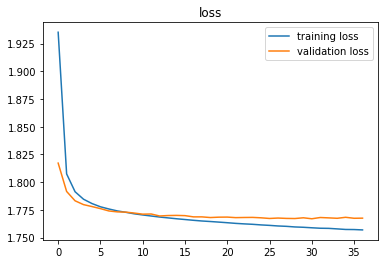

Plotting metrics...


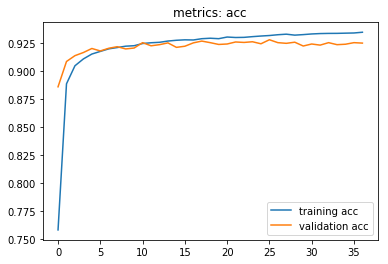

train {'acc': 0.9344364}
test {'acc': 0.9226}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3405600853585924720
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 17511816569778386826
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.31342 , acc = 0.09 
t_cost <class 'dict'> 
train_op : 0.02952099999947677
loss_train : 0.01583900000059657
metric batch : 0.005717000000004191
whole : 0.05148099999951228
display_whole : 0.021854999999959546
Epoch 1 , step 100 , loss= 1.9559364 , acc = 0.54 
t_cost <class 'dict'> 
train_op : 0.0033039999998436542
loss_train : 0.0017960000004677568
metric batch : 0.0009049999998751446
whole : 0.00657500000033906
display_whole : 0.0030980000001363805
Epoch 1 , step 200

Epoch 5 , step 300 , loss= 1.2178129 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0037229999998089625
loss_train : 0.009500000000116415
metric batch : 0.0015359999997599516
whole : 0.015257000000019616
display_whole : 0.011456000000180211
Epoch 5 , step 400 , loss= 1.376171 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.004444000000148662
loss_train : 0.007586000000628701
metric batch : 0.0011680000006890623
whole : 0.013601999999991676
display_whole : 0.009064000000762462
Epoch 5 , step 500 , loss= 1.3003331 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0033899999998538988
loss_train : 0.005097000000205298
metric batch : 0.0010900000006586197
whole : 0.01003599999967264
display_whole : 0.006564000000253145
Epoch 5 , step 549 , loss= 1.2782494 val_loss= 1.274129 , acc = 0.93 val acc = 0.9208 
Epoch 5 finished, loss= 1.2841364 val loss= 1.274129 ,  acc = 0.91807276 val acc = 0.9208

t_cost <class 'dict'> 
train_op : 0.0033469999998487765
loss_train : 0.0019029999994017999
me

Epoch 10 , step 50 , loss= 1.2900308 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.003117999999631138
loss_train : 0.005482000000483822
metric batch : 0.0009949999994205427
whole : 0.010110000000167929
display_whole : 0.006833000000369793
Epoch 10 , step 150 , loss= 1.2650089 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.00393400000029942
loss_train : 0.005027000000154658
metric batch : 0.0010839999995368998
whole : 0.010766999999759719
display_whole : 0.006733999999596563
Epoch 10 , step 250 , loss= 1.2234818 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003424000000450178
loss_train : 0.00195499999972526
metric batch : 0.0008569999999963329
whole : 0.006603000000723114
display_whole : 0.0031079999998837593
Epoch 10 , step 350 , loss= 1.2904323 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.00359299999945506
loss_train : 0.002523000000110187
metric batch : 0.0010769999998956337
whole : 0.007682000000386324
display_whole : 0.003929000000425731
Epoch 10 , step 450 , loss= 1.

Epoch 14 , step 549 , loss= 1.3313944 val_loss= 1.2604575 , acc = 0.93 val acc = 0.9322 
Epoch 14 finished, loss= 1.261387 val loss= 1.2604575 ,  acc = 0.9315636 val acc = 0.9322
*
t_cost <class 'dict'> 
train_op : 0.0033039999998436542
loss_train : 0.002785000000585569
metric batch : 0.0009360000003653113
loss_val : 0.026830999999219785
metric_val : 0.021032999999988533
whole : 0.05618999999933294
display_whole : 0.05270199999995384
Epoch 15 , step 0 , loss= 1.1949214 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.006601000000046042
loss_train : 0.005102999999508029
metric batch : 0.0009259999997084378
whole : 0.013534000000618107
display_whole : 0.006424999999580905
Epoch 15 , step 100 , loss= 1.3787413 , acc = 0.87 
t_cost <class 'dict'> 
train_op : 0.0032799999999042484
loss_train : 0.003764000000046508
metric batch : 0.0011610000001383014
whole : 0.008638000000246393
display_whole : 0.0052770000002055895
Epoch 15 , step 200 , loss= 1.269831 , acc = 0.94 
t_cost <class 'dict'> 


Epoch 19 , step 300 , loss= 1.2495345 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0036179999997330015
loss_train : 0.0070279999999911524
metric batch : 0.0010910000000876607
whole : 0.012159999999312276
display_whole : 0.008442000000286498
Epoch 19 , step 400 , loss= 1.3103253 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0037300000003597233
loss_train : 0.0022589999998672283
metric batch : 0.0010009999996327679
whole : 0.00739400000020396
display_whole : 0.003584000000046217
Epoch 19 , step 500 , loss= 1.3032081 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0033690000000206055
loss_train : 0.003404000000045926
metric batch : 0.0011029999996026163
whole : 0.008243999999649532
display_whole : 0.004777999999532767
Epoch 19 , step 549 , loss= 1.1992401 val_loss= 1.2596588 , acc = 0.95 val acc = 0.9322 
Epoch 19 finished, loss= 1.2556741 val loss= 1.2596588 ,  acc = 0.9334909 val acc = 0.9322

t_cost <class 'dict'> 
train_op : 0.00479300000006333
loss_train : 0.00185400000009

Epoch 24 , step 50 , loss= 1.1846207 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.003590999999687483
loss_train : 0.005143999999745574
metric batch : 0.0011290000002190936
whole : 0.01044599999931961
display_whole : 0.006671000000096683
Epoch 24 , step 150 , loss= 1.2130651 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003313000000161992
loss_train : 0.00183999999990192
metric batch : 0.0010049999991679215
whole : 0.006695000000036089
display_whole : 0.0032049999999799184
Epoch 24 , step 250 , loss= 1.2014333 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.003913999999895168
loss_train : 0.006303000000116299
metric batch : 0.0010490000004210742
whole : 0.011722999999619788
display_whole : 0.007671999999729451
Epoch 24 , step 350 , loss= 1.3035641 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003372000000126718
loss_train : 0.003652999999758322
metric batch : 0.0009519999994154205
whole : 0.008630000000266591
display_whole : 0.005054999999629217
Epoch 24 , step 450 , loss

Epoch 28 , step 549 , loss= 1.2521503 val_loss= 1.2585608 , acc = 0.92 val acc = 0.9324 
Epoch 28 finished, loss= 1.2487793 val loss= 1.2585608 ,  acc = 0.9367454 val acc = 0.9324

t_cost <class 'dict'> 
train_op : 0.0036690000006274204
loss_train : 0.0020339999991847435
metric batch : 0.0009229999996023253
loss_val : 0.02434499999981199
metric_val : 0.02081799999996292
whole : 0.052995000000009895
display_whole : 0.04913699999997334
Epoch 29 , step 0 , loss= 1.2789917 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.008137000000715489
loss_train : 0.007747999999992317
metric batch : 0.0010359999996580882
whole : 0.01752699999997276
display_whole : 0.009083999999347725
Epoch 29 , step 100 , loss= 1.2485744 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003592000000026019
loss_train : 0.005612999999357271
metric batch : 0.0011850000000777072
whole : 0.010842000000593544
display_whole : 0.007082000000082189
Epoch 29 , step 200 , loss= 1.2268748 , acc = 0.95 
t_cost <class 'dict'> 
tra

Epoch 33 , step 300 , loss= 1.2382654 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0033319999993182137
loss_train : 0.0031389999994644313
metric batch : 0.0011089999998148414
whole : 0.007978999999977532
display_whole : 0.004560999999739579
Epoch 33 , step 400 , loss= 1.2747082 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0034050000003844616
loss_train : 0.0021440000000438886
metric batch : 0.0009399999999004649
whole : 0.006975000000238651
display_whole : 0.003403000000616885
Epoch 33 , step 500 , loss= 1.2532313 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0035800000005110633
loss_train : 0.002133999999387015
metric batch : 0.0009570000001986045
whole : 0.007197000000815024
display_whole : 0.0035189999998692656
Epoch 33 , step 549 , loss= 1.2516034 val_loss= 1.256093 , acc = 0.95 val acc = 0.9334 
Epoch 33 finished, loss= 1.2458216 val loss= 1.256093 ,  acc = 0.939709 val acc = 0.9334

t_cost <class 'dict'> 
train_op : 0.003642000000581902
loss_train : 0.00185599999986

Epoch 38 , step 50 , loss= 1.2378383 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004730999999992491
loss_train : 0.00706499999978405
metric batch : 0.0011610000001383014
whole : 0.013453999999910593
display_whole : 0.008545000000594882
Epoch 38 , step 150 , loss= 1.3003643 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0035369999995964463
loss_train : 0.009569999999257561
metric batch : 0.0010400000001027365
whole : 0.014616999999816471
display_whole : 0.01097699999991164
Epoch 38 , step 250 , loss= 1.2288352 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003381999999874097
loss_train : 0.0017329999991488876
metric batch : 0.0010440000005473848
whole : 0.006658999999672233
display_whole : 0.003105999999206688
Epoch 38 , step 350 , loss= 1.2538359 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003816999999799009
loss_train : 0.00537499999973079
metric batch : 0.0012109999997846899
whole : 0.010752999999567692
display_whole : 0.006833000000369793
Epoch 38 , step 450 , loss

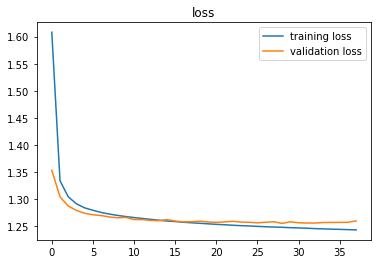

Plotting metrics...


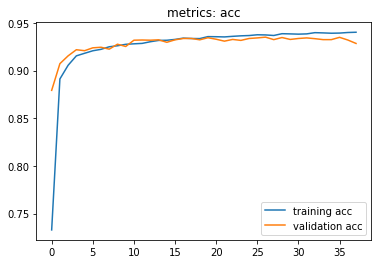

train {'acc': 0.939}
test {'acc': 0.9259}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9710446142138384942
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 9515203120883530643
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2858016 , acc = 0.14 
t_cost <class 'dict'> 
train_op : 0.030185999999957858
loss_train : 0.014415999999982887
metric batch : 0.005083000000013271
whole : 0.050024000000121305
display_whole : 0.0197440000001734
Epoch 1 , step 100 , loss= 1.629609 , acc = 0.64 
t_cost <class 'dict'> 
train_op : 0.0036540000000968575
loss_train : 0.0019630000006145565
metric batch : 0.001098999999157968
whole : 0.007175000000643195
display_whole : 0.0033820000007835915
Epoch 1 , step 200 

Epoch 5 , step 300 , loss= 0.8624971 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0033149999999295687
loss_train : 0.0019120000006296323
metric batch : 0.0010579999998299172
whole : 0.006784000000152446
display_whole : 0.003303000000414613
Epoch 5 , step 400 , loss= 0.7420791 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0036089999994146638
loss_train : 0.0027249999993728125
metric batch : 0.0011329999997542473
whole : 0.007958000000144239
display_whole : 0.004179999999905704
Epoch 5 , step 500 , loss= 0.74612045 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.004078999999364896
loss_train : 0.004425000000082946
metric batch : 0.0009589999999661813
whole : 0.009946999999556283
display_whole : 0.0057069999993473175
Epoch 5 , step 549 , loss= 0.8558862 val_loss= 0.7916919 , acc = 0.92 val acc = 0.9166 
Epoch 5 finished, loss= 0.8004412 val loss= 0.7916919 ,  acc = 0.91229093 val acc = 0.9166
*
t_cost <class 'dict'> 
train_op : 0.0031720000006316695
loss_train : 0.0016990000003

Epoch 10 , step 50 , loss= 0.7848221 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.0033750000002328306
loss_train : 0.001839000000472879
metric batch : 0.0009300000001530861
whole : 0.006513999999697262
display_whole : 0.00305700000080833
Epoch 10 , step 150 , loss= 0.78215384 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0038049999993745587
loss_train : 0.0017639999996390543
metric batch : 0.00087100000018836
whole : 0.006988000000092143
display_whole : 0.003049999999348074
Epoch 10 , step 250 , loss= 0.7351868 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.003000999999130727
loss_train : 0.0018500000005587935
metric batch : 0.001006999999844993
whole : 0.006333999999696971
display_whole : 0.0031740000003992463
Epoch 10 , step 350 , loss= 0.6760597 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003184999999575666
loss_train : 0.0021980000001349254
metric batch : 0.001006000000415952
whole : 0.006849999999758438
display_whole : 0.003523999999742955
Epoch 10 , step 450 , l

Epoch 14 , step 549 , loss= 0.753106 val_loss= 0.7786013 , acc = 0.9 val acc = 0.9228 
Epoch 14 finished, loss= 0.7669923 val loss= 0.7786013 ,  acc = 0.92483634 val acc = 0.9228

t_cost <class 'dict'> 
train_op : 0.003342999999404128
loss_train : 0.001981000000341737
metric batch : 0.001036999999996624
loss_val : 0.02265200000056211
metric_val : 0.019742999999834865
whole : 0.04984799999965617
display_whole : 0.046314000000165834
Epoch 15 , step 0 , loss= 0.7136928 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.009093000000575557
loss_train : 0.007466000000022177
metric batch : 0.0010579999998299172
whole : 0.01870599999983824
display_whole : 0.009095999999772175
Epoch 15 , step 100 , loss= 0.7508626 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003539999999702559
loss_train : 0.003701999999975669
metric batch : 0.0010699999993448728
whole : 0.008703999999852385
display_whole : 0.005064999999376596
Epoch 15 , step 200 , loss= 0.72060686 , acc = 0.94 
t_cost <class 'dict'> 
trai

Epoch 19 , step 300 , loss= 0.741814 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.003786000000218337
loss_train : 0.010479000000486849
metric batch : 0.001306000000113272
whole : 0.016481999999996333
display_whole : 0.012512999999671592
Epoch 19 , step 400 , loss= 0.68118256 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.004515000000537839
loss_train : 0.004366999999547261
metric batch : 0.0016569999997955165
whole : 0.010992000000442204
display_whole : 0.00639099999989412
Epoch 19 , step 500 , loss= 0.87252843 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.004364000000350643
loss_train : 0.003529000000526139
metric batch : 0.0012219999998706044
whole : 0.009467999999287713
display_whole : 0.005001999999876716
Epoch 19 , step 549 , loss= 0.6542219 val_loss= 0.7746664 , acc = 0.98 val acc = 0.9258 
Epoch 19 finished, loss= 0.75743866 val loss= 0.7746664 ,  acc = 0.92787266 val acc = 0.9258

t_cost <class 'dict'> 
train_op : 0.004495999999562628
loss_train : 0.0028309999997873

Epoch 24 , step 50 , loss= 0.78073925 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.005019999999603897
loss_train : 0.005384000000049127
metric batch : 0.0016030000006139744
whole : 0.012483999999858497
display_whole : 0.007331999999223626
Epoch 24 , step 150 , loss= 0.83604187 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004789999999957217
loss_train : 0.013874000000214437
metric batch : 0.001036000000567583
whole : 0.020207999999911408
display_whole : 0.015226000000438944
Epoch 24 , step 250 , loss= 0.7888197 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.003837999999632302
loss_train : 0.010672000000340631
metric batch : 0.0013109999999869615
whole : 0.016504000000168162
display_whole : 0.012493000000176835
Epoch 24 , step 350 , loss= 0.89600676 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004794000000401866
loss_train : 0.004866000000220083
metric batch : 0.0013550000003306195
whole : 0.011441000000559143
display_whole : 0.006475000000136788
Epoch 24 , step 450 , l

Epoch 28 , step 549 , loss= 0.68409073 val_loss= 0.77052754 , acc = 0.94 val acc = 0.9264 
Epoch 28 finished, loss= 0.74555504 val loss= 0.77052754 ,  acc = 0.9328545 val acc = 0.9264

t_cost <class 'dict'> 
train_op : 0.0043140000007042545
loss_train : 0.0028119999997215928
metric batch : 0.0012850000002799788
loss_val : 0.02773299999989831
metric_val : 0.02169800000046962
whole : 0.05885200000011537
display_whole : 0.0544369999997798
Epoch 29 , step 0 , loss= 0.73575664 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.007829000000128872
loss_train : 0.01061299999946641
metric batch : 0.001712000000225089
whole : 0.022401000000172644
display_whole : 0.012663999999858788
Epoch 29 , step 100 , loss= 0.80670214 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004195000000436266
loss_train : 0.01972699999987526
metric batch : 0.0014160000000629225
whole : 0.025916999999935797
display_whole : 0.021534000000428932
Epoch 29 , step 200 , loss= 0.72846186 , acc = 0.94 
t_cost <class 'dict'> 

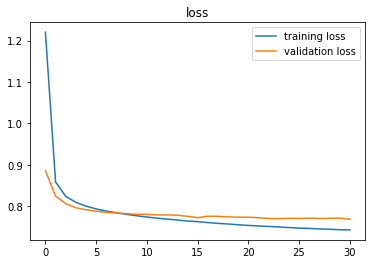

Plotting metrics...


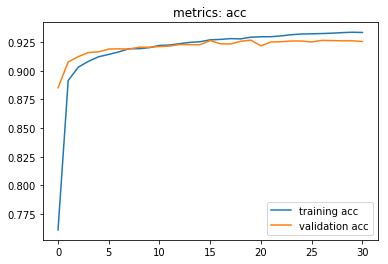

train {'acc': 0.9335091}
test {'acc': 0.9234}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4446129196594776344
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 837551513388208120
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3131359 , acc = 0.07 
t_cost <class 'dict'> 
train_op : 0.033994999999777065
loss_train : 0.02474199999960547
metric batch : 0.00607899999977235
whole : 0.06518700000015087
display_whole : 0.031081999999514665
Epoch 1 , step 100 , loss= 1.4236093 , acc = 0.62 
t_cost <class 'dict'> 
train_op : 0.004560999999739579
loss_train : 0.01746999999977561
metric batch : 0.001817999999730091
whole : 0.024253999999928055
display_whole : 0.01960400000007212
Epoch 1 , step 200 , lo

Epoch 5 , step 300 , loss= 0.25545055 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0051110000003973255
loss_train : 0.0026090000001204317
metric batch : 0.0011439999998401618
whole : 0.00941899999997986
display_whole : 0.004208999999718799
Epoch 5 , step 400 , loss= 0.36759558 , acc = 0.88 
t_cost <class 'dict'> 
train_op : 0.0037529999999605934
loss_train : 0.002620000000206346
metric batch : 0.001170000000456639
whole : 0.007999000000381784
display_whole : 0.004167999999481253
Epoch 5 , step 500 , loss= 0.17281179 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0034820000000763685
loss_train : 0.0021319999996194383
metric batch : 0.0012139999998908024
whole : 0.007262999999511521
display_whole : 0.0037000000002080924
Epoch 5 , step 549 , loss= 0.2967771 val_loss= 0.27749988 , acc = 0.91 val acc = 0.9212 
Epoch 5 finished, loss= 0.29855317 val loss= 0.27749988 ,  acc = 0.91609085 val acc = 0.9212
*
t_cost <class 'dict'> 
train_op : 0.003975999999966007
loss_train : 0.0027300000

Epoch 10 , step 50 , loss= 0.26383388 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003689000000122178
loss_train : 0.0020779999995284015
metric batch : 0.001126000000112981
whole : 0.007359000000178639
display_whole : 0.0035879999995813705
Epoch 10 , step 150 , loss= 0.38404015 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.007214000000203669
loss_train : 0.008811000000605418
metric batch : 0.0024759999996604165
whole : 0.018959999999424326
display_whole : 0.011618999999882362
Epoch 10 , step 250 , loss= 0.23193346 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.00669599999946513
loss_train : 0.009634999999434513
metric batch : 0.001825999999709893
whole : 0.018562999999630847
display_whole : 0.011786000000029162
Epoch 10 , step 350 , loss= 0.19133972 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0055230000007213675
loss_train : 0.008746000000428467
metric batch : 0.0027709999994840473
whole : 0.017518999999992957
display_whole : 0.011841000000458735
Epoch 10 , step 450 ,

Epoch 14 , step 549 , loss= 0.23992759 val_loss= 0.24560302 , acc = 0.93 val acc = 0.93 
Epoch 14 finished, loss= 0.24639629 val loss= 0.24560302 ,  acc = 0.9311455 val acc = 0.93
*
t_cost <class 'dict'> 
train_op : 0.004034999999930733
loss_train : 0.0066660000002229935
metric batch : 0.0011009999998350395
loss_val : 0.026603000000250177
metric_val : 0.021075999999993655
whole : 0.06070499999987078
display_whole : 0.05650500000047032
Epoch 15 , step 0 , loss= 0.22190559 , acc = 0.9 
t_cost <class 'dict'> 
train_op : 0.008798000000751927
loss_train : 0.004155999999966298
metric batch : 0.0012889999998151325
whole : 0.014866000000438362
display_whole : 0.005675000000337604
Epoch 15 , step 100 , loss= 0.30767748 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.004327999999986787
loss_train : 0.002357000000301923
metric batch : 0.0013399999998000567
whole : 0.008480000000417931
display_whole : 0.003979000000072119
Epoch 15 , step 200 , loss= 0.34911168 , acc = 0.93 
t_cost <class 'dict'>

Epoch 19 , step 300 , loss= 0.22570227 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0033160000002681045
loss_train : 0.0020440000007511117
metric batch : 0.0010160000001633307
whole : 0.006859999999505817
display_whole : 0.003356000000167114
Epoch 19 , step 400 , loss= 0.15572327 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.004479000000173983
loss_train : 0.002591999999822292
metric batch : 0.0011130000002594898
whole : 0.009114999999837892
display_whole : 0.004429999999956635
Epoch 19 , step 500 , loss= 0.1820106 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.004318999999668449
loss_train : 0.002741000000241911
metric batch : 0.0012480000004870817
whole : 0.008671999999933178
display_whole : 0.004217000000608095
Epoch 19 , step 549 , loss= 0.39498588 val_loss= 0.24536939 , acc = 0.93 val acc = 0.9284 
Epoch 19 finished, loss= 0.23447949 val loss= 0.24536939 ,  acc = 0.9339636 val acc = 0.9284

t_cost <class 'dict'> 
train_op : 0.0037299999994502286
loss_train : 0.00243399

Epoch 24 , step 50 , loss= 0.31372136 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003756000000066706
loss_train : 0.0020930000000589644
metric batch : 0.0011710000007951749
whole : 0.007512999999562453
display_whole : 0.003574000000298838
Epoch 24 , step 150 , loss= 0.13410167 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0038640000002487795
loss_train : 0.0027219999992667
metric batch : 0.0012049999995724647
whole : 0.008154000000104134
display_whole : 0.004168999999819789
Epoch 24 , step 250 , loss= 0.3153345 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.0032540000001972658
loss_train : 0.002290999999786436
metric batch : 0.0010170000005018665
whole : 0.007126999999854888
display_whole : 0.003704999999172287
Epoch 24 , step 350 , loss= 0.34624854 , acc = 0.89 
t_cost <class 'dict'> 
train_op : 0.0032659999997122213
loss_train : 0.0051589999993666424
metric batch : 0.001344000000244705
whole : 0.01020799999969313
display_whole : 0.006841999999778636
Epoch 24 , step 450 ,

Epoch 28 , step 549 , loss= 0.16588144 val_loss= 0.23537359 , acc = 0.95 val acc = 0.9346 
Epoch 28 finished, loss= 0.22099954 val loss= 0.23537359 ,  acc = 0.93730915 val acc = 0.9346
*
t_cost <class 'dict'> 
train_op : 0.003664000000753731
loss_train : 0.0021709999991799123
metric batch : 0.0009650000001784065
loss_val : 0.030504000000291853
metric_val : 0.019817999999759195
whole : 0.05829799999992247
display_whole : 0.054550999999264604
Epoch 29 , step 0 , loss= 0.29643556 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.005580000000009022
loss_train : 0.008437000000412809
metric batch : 0.001059000000168453
whole : 0.015846000000237837
display_whole : 0.009882000000288826
Epoch 29 , step 100 , loss= 0.19139652 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003296000000773347
loss_train : 0.0020000000004074536
metric batch : 0.0009939999999915017
whole : 0.006776000000172644
display_whole : 0.003355000000738073
Epoch 29 , step 200 , loss= 0.18818465 , acc = 0.93 
t_cost <class 

Epoch 33 , step 300 , loss= 0.13677071 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003998999999566877
loss_train : 0.015298000000257161
metric batch : 0.0017219999999724678
whole : 0.02141200000005483
display_whole : 0.01729299999988143
Epoch 33 , step 400 , loss= 0.26720083 , acc = 0.91 
t_cost <class 'dict'> 
train_op : 0.003876999999192776
loss_train : 0.005038999999669613
metric batch : 0.0009509999999863794
whole : 0.010569000000032247
display_whole : 0.006514999999126303
Epoch 33 , step 500 , loss= 0.3297851 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.0036250000002837623
loss_train : 0.0019860000002154266
metric batch : 0.0011249999997744453
whole : 0.007189999999354768
display_whole : 0.0034740000000965665
Epoch 33 , step 549 , loss= 0.13987738 val_loss= 0.23631272 , acc = 0.97 val acc = 0.9352 
Epoch 33 finished, loss= 0.21590787 val loss= 0.23631272 ,  acc = 0.93930906 val acc = 0.9352
*
t_cost <class 'dict'> 
train_op : 0.003589000000829401
loss_train : 0.00178099

Epoch 38 , step 50 , loss= 0.17196314 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.0035859999998137937
loss_train : 0.005841000000145868
metric batch : 0.0012450000003809691
whole : 0.011243000000831671
display_whole : 0.0075539999997999985
Epoch 38 , step 150 , loss= 0.13339742 , acc = 0.97 
t_cost <class 'dict'> 
train_op : 0.003568999999515654
loss_train : 0.009769000000233063
metric batch : 0.0016509999995832914
whole : 0.015631999999641266
display_whole : 0.011881000000357744
Epoch 38 , step 250 , loss= 0.21158218 , acc = 0.93 
t_cost <class 'dict'> 
train_op : 0.004039999999804422
loss_train : 0.009611999999833643
metric batch : 0.0020779999995284015
whole : 0.01615700000002107
display_whole : 0.012031999999635445
Epoch 38 , step 350 , loss= 0.13591465 , acc = 0.95 
t_cost <class 'dict'> 
train_op : 0.005713000000469037
loss_train : 0.00429699999949662
metric batch : 0.0014400000000023283
whole : 0.01202000000012049
display_whole : 0.006120000000009895
Epoch 38 , step 450 , 

Epoch 42 , step 549 , loss= 0.2866819 val_loss= 0.23796497 , acc = 0.92 val acc = 0.9348 
Epoch 42 finished, loss= 0.20871852 val loss= 0.23796497 ,  acc = 0.940291 val acc = 0.9348

t_cost <class 'dict'> 
train_op : 0.003253999999287771
loss_train : 0.001841999999669497
metric batch : 0.0010789999996632105
loss_val : 0.025843999999779044
metric_val : 0.020875999999589112
whole : 0.05425600000035047
display_whole : 0.05077900000014779
Epoch 43 , step 0 , loss= 0.22670977 , acc = 0.92 
t_cost <class 'dict'> 
train_op : 0.008033000000068569
loss_train : 0.006642000000283588
metric batch : 0.001059999999597494
whole : 0.016349000000445812
display_whole : 0.008072000000538537
Epoch 43 , step 100 , loss= 0.15300481 , acc = 0.98 
t_cost <class 'dict'> 
train_op : 0.0034970000006069313
loss_train : 0.0026319999997213017
metric batch : 0.001119999999900756
whole : 0.007674000000406522
display_whole : 0.004073000000062166
Epoch 43 , step 200 , loss= 0.2627114 , acc = 0.96 
t_cost <class 'dict'>

Epoch 47 , step 300 , loss= 0.12219305 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.0033750000002328306
loss_train : 0.01098199999978533
metric batch : 0.0014599999994970858
whole : 0.016233999999712978
display_whole : 0.012775000000146974
Epoch 47 , step 400 , loss= 0.14459357 , acc = 0.96 
t_cost <class 'dict'> 
train_op : 0.0040820000003805035
loss_train : 0.005520000000615255
metric batch : 0.001495999999860942
whole : 0.011556000000382483
display_whole : 0.007360999999946216
Epoch 47 , step 500 , loss= 0.29457968 , acc = 0.94 
t_cost <class 'dict'> 
train_op : 0.003133000000161701
loss_train : 0.0019290000000182772
metric batch : 0.0009650000001784065
whole : 0.006541000000652275
display_whole : 0.0032170000004043686
Epoch 47 , step 549 , loss= 0.26552156 val_loss= 0.2398749 , acc = 0.91 val acc = 0.9338 
Epoch 47 finished, loss= 0.20496024 val loss= 0.2398749 ,  acc = 0.94219995 val acc = 0.9338

t_cost <class 'dict'> 
train_op : 0.00356999999985419
loss_train : 0.0092569999

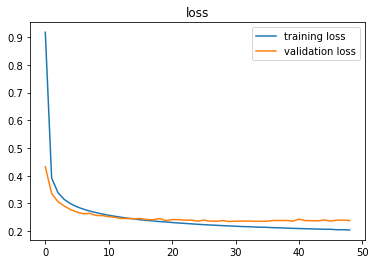

Plotting metrics...


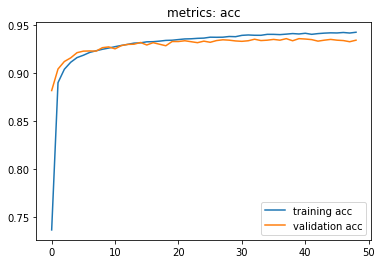

train {'acc': 0.9424545}
test {'acc': 0.9308}

{2: [{'acc': 0.9253}, {'acc': 0.9302}, {'acc': 0.9281}, {'acc': 0.9294}, {'acc': 0.9304}], 4: [{'acc': 0.9294}, {'acc': 0.9253}, {'acc': 0.9249}, {'acc': 0.9272}, {'acc': 0.931}], 8: [{'acc': 0.9178}, {'acc': 0.9221}, {'acc': 0.9264}, {'acc': 0.9249}, {'acc': 0.9319}], 16: [{'acc': 0.8977}, {'acc': 0.9178}, {'acc': 0.9192}, {'acc': 0.9233}, {'acc': 0.9288}], 32: [{'acc': 0.8704}, {'acc': 0.9168}, {'acc': 0.9224}, {'acc': 0.92}, {'acc': 0.9272}], 64: [{'acc': 0.8484}, {'acc': 0.9226}, {'acc': 0.9259}, {'acc': 0.9234}, {'acc': 0.9308}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9253   
1            0.25           0.75            2                   1    0.9302   
2            0.50           0.50            2                   1    0.9281   
3            0.75           0.25            2                   1    0.9294   
4            1.00

In [13]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        # show result
        print('Student performance with temperature =',temperature,
             ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)
print(test_metrics)
print(df_exp)

In [14]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9253}, {'acc': 0.9302}, {'acc': 0.9281}, {'acc': 0.9294}, {'acc': 0.9304}], 4: [{'acc': 0.9294}, {'acc': 0.9253}, {'acc': 0.9249}, {'acc': 0.9272}, {'acc': 0.931}], 8: [{'acc': 0.9178}, {'acc': 0.9221}, {'acc': 0.9264}, {'acc': 0.9249}, {'acc': 0.9319}], 16: [{'acc': 0.8977}, {'acc': 0.9178}, {'acc': 0.9192}, {'acc': 0.9233}, {'acc': 0.9288}], 32: [{'acc': 0.8704}, {'acc': 0.9168}, {'acc': 0.9224}, {'acc': 0.92}, {'acc': 0.9272}], 64: [{'acc': 0.8484}, {'acc': 0.9226}, {'acc': 0.9259}, {'acc': 0.9234}, {'acc': 0.9308}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9253   
1            0.25           0.75            2                   1    0.9302   
2            0.50           0.50            2                   1    0.9281   
3            0.75           0.25            2                   1    0.9294   
4            1.00           0.00            2                   

In [ ]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp2 = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100
            ,earlystop_params={'monitor':'val_acc', 'patience':10}
        )
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14045339040267606514
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105975296
locality {
  bus_id: 1
}
incarnation: 4182028158168792219
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9.248357 , acc = 0.05 
t_cost <class 'dict'> 
train_op : 0.028229999999894062
loss_train : 0.013054999999440042
metric batch : 0.004952000000230328
whole : 0.046673000000737375
display_whole : 0.018317000000024564
Epoch 1 , step 100 , loss= 7.362557 , acc = 0.46 
t_cost <class 'dict'> 
train_op : 0.003176999999595864
loss_train : 0.0019029999994017999
metric batch : 0.0009020000006785267
whole : 0.006595999999262858
display_whole : 0.0032320000000254367


In [ ]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

In [ ]:
print('teacher')
print(len(teacher.his_loss_train))
print(len(teacher.his_loss_train_epoch))
print('small')
print(len(small.his_loss_train))
print(len(small.his_loss_train_epoch))
print('student')
print(len(student.his_loss_train))
print(len(student.his_loss_train_epoch))

In [ ]:

# close_session(session)